## **1. Importing packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split

## **2. Importing data**

In [2]:
loans_backup = pd.read_csv("Loan_status_2007-2020Q3.gzip")

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\626459721.py:1: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  loans_backup = pd.read_csv("Loan_status_2007-2020Q3.gzip")


In [3]:
loans = loans_backup.copy()

## **3. Data preprocessing**

### 3.1 First look at the data

In [4]:
pd.options.display.max_rows = None

In [5]:
pd.options.display.max_columns = None

In [6]:
inn_size = loans.size
inn_size

415420006

In [7]:
loans.head()

Unnamed: 0       id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0           0  1077501     5000.0       5000.0           4975.0   36 months   
1           1  1077430     2500.0       2500.0           2500.0   60 months   
2           2  1077175     2400.0       2400.0           2400.0   36 months   
3           3  1076863    10000.0      10000.0          10000.0   36 months   
4           4  1075358     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status   issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-2011   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-2011  Charged Off   
2           RENT     12252.0        Not Verified  Dec-2011   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-2011   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-2011   Fully Paid   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   
3           other              personel    917xx         CA  20.00   
4           other              Personal    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0          0.0         Jan-1985           735.0            739.0   
1          0.0         Apr-1999           740.0            744.0   
2          0.0         Nov-2001           735.0            739.0   
3          0.0         Feb-1996           690.0            694.0   
4          0.0         Jan-1996           695.0            699.0   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0             1.0                     NaN                     NaN       3.0   
1             5.0                     NaN                     NaN       3.0   
2             2.0                     NaN                     NaN       2.0   
3             1.0                    35.0                     NaN      10.0   
4             0.0                    38.0                     NaN      15.0   

   pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0      0.0    13648.0      83.7%        9.0                   f        0.0   
1      0.0     1687.0       9.4%        4.0                   f        0.0   
2      0.0     2956.0      98.5%       10.0                   f        0.0   
3      0.0     5598.0        21%       37.0                   f        0.0   
4      0.0    27783.0      53.9%       38.0                   f        0.0   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0   5863.155187          5833.84          5000.00   
1            0.0   1014.530000          1014.53           456.46   
2            0.0   3005.666844          3005.67          2400.00   
3            0.0  12231.890000         12231.89         10000.00   
4            0.0   4066.908161          4066.91          3000.00   

   total_r

In [8]:
loans.tail()

Unnamed: 0         id  loan_amnt  funded_amnt  funded_amnt_inv  \
2925488      105446  102556443    24000.0      24000.0          24000.0   
2925489      105447  102653304    10000.0      10000.0          10000.0   
2925490      105448  102628603    10050.0      10050.0          10050.0   
2925491      105449  102196576     6000.0       6000.0           6000.0   
2925492      105450   99799684    30000.0      30000.0          30000.0   

               term int_rate  installment grade sub_grade  \
2925488   60 months   23.99%       690.30     E        E2   
2925489   36 months    7.99%       313.32     A        A5   
2925490   36 months   16.99%       358.26     D        D1   
2925491   36 months   11.44%       197.69     B        B4   
2925492   60 months   25.49%       889.18     E        E4   

                     emp_title emp_length home_ownership  annual_inc  \
2925488  Senior Escrow Officer   < 1 year           RENT    107000.0   
2925489                     Rn  10+ years       MORTGAGE     65000.0   
2925490        Sales Associate    8 years           RENT     37000.0   
2925491          Contact input    5 years           RENT     41000.0   
2925492      Assistant Manager    4 years       MORTGAGE    105700.0   

        verification_status   issue_d  loan_status pymnt_plan  \
2925488     Source Verified  Apr-2017  Charged Off          n   
2925489     Source Verified  Apr-2017   Fully Paid          n   
2925490        Not Verified  Apr-2017  Charged Off          n   
2925491     Source Verified  Apr-2017   Fully Paid          n   
2925492            Verified  Apr-2017  Charged Off          n   

                                                       url  \
2925488  https://lendingclub.com/browse/loanDetail.acti...   
2925489  https://lendingclub.com/browse/loanDetail.acti...   
2925490  https://lendingclub.com/browse/loanDetail.acti...   
2925491  https://lendingclub.com/browse/loanDetail.acti...   
2925492  https://lendingclub.com/browse/loanDetail.acti...   

                    purpose                    title zip_code addr_state  \
2925488               other                    Other    801xx         CO   
2925489  debt_consolidation       Debt consolidation    187xx         PA   
2925490  debt_consolidation       Debt consolidation    220xx         VA   
2925491         credit_card  Credit card refinancing    105xx         NY   
2925492  debt_consolidation       Debt consolidation    797xx         TX   

           dti  delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
2925488  11.65          3.0         Apr-1995           670.0            674.0   
2925489  19.55          1.0         Sep-1993           725.0            729.0   
2925490  20.56          0.0         May-1993           705.0            709.0   
2925491  19.99          1.0         May-1990           670.0            674.0   
2925492  27.26          1.0         Nov-1997           695.0            699.0   

         inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
2925488             1.0                     4.0                    73.0   
2925489             0.0                    12.0                     NaN   
2925490             1.0                    65.0                     NaN   
2925491             0.0                     0.0                     NaN   
2925492             0.0                     6.0                     NaN   

         open_acc  pub_rec  revol_bal revol_util  total_acc  \
2925488      13.0      2.0     9688.0      24.9%       24.0   
2925489      15.0      0.0     9751.0      15.7%       27.0   
2925490      15.0      0.0    14300.0        47%       21.0   
2925491       9.0      0.0     1356.0      10.1%       18.0   
2925492      12.0      0.0    15252.0      72.6%       23.0   

        initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
2925488                   f        0.0            0.0   7749.830000   
2925489                   w        0.0            0.0  11233.834658   
2925490

In [9]:
loans.drop(columns="Unnamed: 0", inplace=True)
loans.set_index("id", inplace=True)

In [10]:
len(loans.columns.values)

140

In [11]:
loans.isnull().sum()

loan_amnt                                           1
funded_amnt                                         1
funded_amnt_inv                                     1
term                                                1
int_rate                                            1
installment                                         1
grade                                               1
sub_grade                                           1
emp_title                                      264087
emp_length                                     205221
home_ownership                                      1
annual_inc                                          5
verification_status                                 1
issue_d                                             1
loan_status                                         1
pymnt_plan                                          1
url                                                 1
purpose                                             1
title                       

In [12]:
loans = loans[~np.isnan(loans["loan_amnt"])].copy()

### 3.3 Dropping column having > 50% values missing

In [13]:
columns = pd.DataFrame(
    round((loans.isna().sum() / (loans.count() + loans.isna().sum()) * 100), 2),
    columns=["perc_miss_val"]
)

In [14]:
columns = columns.reset_index().rename(columns={"index": "column"})

In [15]:
columns

column  perc_miss_val
0                                     loan_amnt           0.00
1                                   funded_amnt           0.00
2                               funded_amnt_inv           0.00
3                                          term           0.00
4                                      int_rate           0.00
5                                   installment           0.00
6                                         grade           0.00
7                                     sub_grade           0.00
8                                     emp_title           9.03
9                                    emp_length           7.01
10                               home_ownership           0.00
11                                   annual_inc           0.00
12                          verification_status           0.00
13                                      issue_d           0.00
14                                  loan_status           0.00
15                                   pymnt_plan           0.00
16                                          url           0.00
17                                      purpose           0.00
18                                        title           0.80
19                                     zip_code           0.00
20                                   addr_state           0.00
21                                          dti           0.11
22                                  delinq_2yrs           0.00
23                             earliest_cr_line           0.00
24                               fico_range_low           0.00
25                              fico_range_high           0.00
26                               inq_last_6mths           0.00
27                       mths_since_last_delinq          52.52
28                       mths_since_last_record          85.39
29                                     open_acc           0.00
30                                      pub_rec           0.00
31                                    revol_bal           0.00
32                                   revol_util           0.09
33                                    total_acc           0.00
34                          initial_list_status           0.00
35                                    out_prncp           0.00
36                                out_prncp_inv           0.00
37                                  total_pymnt           0.00
38                              total_pymnt_inv           0.00
39                              total_rec_prncp           0.00
40                                total_rec_int           0.00
41                           total_rec_late_fee           0.00
42                                   recoveries           0.00
43                      collection_recovery_fee           0.00
44                                 last_pymnt_d           0.17
45                              last_pymnt_amnt           0.00
46                                 next_pymnt_d          63.59
47                           last_credit_pull_d           0.00
48                         last_fico_range_high           0.00
49                          last_fico_range_low           0.00
50                   collections_12_mths_ex_med           0.00
51                  mths_since_last_major_derog          75.29
52                                  policy_code           0.00
53                             application_type           0.00
54                             annual_inc_joint          92.80
55                                    dti_joint          92.80
56                    verification_status_joint          93.34
57                               acc_now_delinq           0.00
58                                 tot_coll_amt           2.40
59                                  tot_cur_bal           2.40
60                                  open_acc_6m          29.61
61                                  open_act_il          29.61
62                                  open_il_12m          29.61
63       

In [16]:
loans.drop(columns=columns[columns["perc_miss_val"] >= 50]["column"].to_list(), inplace=True)

In [17]:
len(loans.columns.values)

105

### **3.4 Data cleaning and transforming related to datatypes**

#### **3.4.1 Defaulted and not defaulted**

To see how variables impact defaulting `loan_status` column needs to be updated and correctly indicate weather client defaulted or not. 

In [18]:
loans["loan_status"].value_counts(normalize=True)

loan_status
Fully Paid                                             0.511976
Current                                                0.352425
Charged Off                                            0.123927
Late (31-120 days)                                     0.005522
In Grace Period                                        0.003428
Late (16-30 days)                                      0.000929
Issued                                                 0.000705
Does not meet the credit policy. Status:Fully Paid     0.000680
Does not meet the credit policy. Status:Charged Off    0.000260
Default                                                0.000148
Name: proportion, dtype: float64

In [19]:
loans["loan_status"] = np.where(
    loans["loan_status"].isin([
        "Charged Off",
        "Late (31-120 days)",
        "Does not meet the credit policy. Status:Charged Off",
        "Default"
    ]),
    0,
    1
)    

In [20]:
loans["loan_status"].value_counts(normalize=True)

loan_status
1    0.870143
0    0.129857
Name: proportion, dtype: float64

In [21]:
loans.rename(columns={"loan_status": "good_bad"}, inplace=True)

#### **3.4.2 Transforming variables and correcting datatypes**

In [22]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925492 entries, 1077501 to 99799684
Columns: 105 entries, loan_amnt to debt_settlement_flag
dtypes: float64(81), int32(1), object(23)
memory usage: 2.3+ GB


In [23]:
loans.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
id                                                                      
1077501     5000.0       5000.0           4975.0   36 months   10.65%   
1077430     2500.0       2500.0           2500.0   60 months   15.27%   
1077175     2400.0       2400.0           2400.0   36 months   15.96%   
1076863    10000.0      10000.0          10000.0   36 months   13.49%   
1075358     3000.0       3000.0           3000.0   60 months   12.69%   

         installment grade sub_grade                 emp_title emp_length  \
id                                                                          
1077501       162.87     B        B2                       NaN  10+ years   
1077430        59.83     C        C4                     Ryder   < 1 year   
1077175        84.33     C        C5                       NaN  10+ years   
1076863       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
1075358        67.79     B        B5  University Medical Group     1 year   

        home_ownership  annual_inc verification_status   issue_d  good_bad  \
id                                                                           
1077501           RENT     24000.0            Verified  Dec-2011         1   
1077430           RENT     30000.0     Source Verified  Dec-2011         0   
1077175           RENT     12252.0        Not Verified  Dec-2011         1   
1076863           RENT     49200.0     Source Verified  Dec-2011         1   
1075358           RENT     80000.0     Source Verified  Dec-2011         1   

        pymnt_plan                                                url  \
id                                                                      
1077501          n  https://lendingclub.com/browse/loanDetail.acti...   
1077430          n  https://lendingclub.com/browse/loanDetail.acti...   
1077175          n  https://lendingclub.com/browse/loanDetail.acti...   
1076863          n  https://lendingclub.com/browse/loanDetail.acti...   
1075358          n  https://lendingclub.com/browse/loanDetail.acti...   

                purpose                 title zip_code addr_state    dti  \
id                                                                         
1077501     credit_card              Computer    860xx         AZ  27.65   
1077430             car                  bike    309xx         GA   1.00   
1077175  small_business  real estate business    606xx         IL   8.72   
1076863           other              personel    917xx         CA  20.00   
1075358           other              Personal    972xx         OR  17.94   

         delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
id                                                                       
1077501          0.0         Jan-1985           735.0            739.0   
1077430          0.0         Apr-1999           740.0            744.0   
1077175          0.0         Nov-2001           735.0            739.0   
1076863          0.0         Feb-1996           690.0            694.0   
1075358          0.0         Jan-1996           695.0            699.0   

         inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  total_acc  \
id                                                                            
1077501             1.0       3.0      0.0    13648.0      83.7%        9.0   
1077430             5.0       3.0      0.0     1687.0       9.4%        4.0   
1077175             2.0       2.0      0.0     2956.0      98.5%       10.0   
1076863             1.0      10.0      0.0     5598.0        21%       37.0   
1075358             0.0      15.0      0.0    27783.0      53.9%       38.0   

        initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
id                                                                    
1077501                   f        0.0            0.0   5863.155187   
1077430                   f        0.0            0.0   1014.530000   
1077175 

#### **Date variables**

Following columns have date values and need to be transformed to "months since" variable:

* `earliest_cr_line`
* `last_pymnt_d`
* `last_credit_pull_d`
* `issue_d`

There are 29 missing values in this column, however, this column is not needed for model. This column is only important for calculating number of months since last credit card, and number of months will be continuous variable, thus it will be easier to fill missing values there

In [24]:
loans["earliest_cr_line"].dtypes

dtype('O')

In [25]:
date_cols = ["earliest_cr_line", "last_pymnt_d", "last_credit_pull_d", "issue_d"]

In [26]:
for col in date_cols:
    loans[col] = pd.to_datetime(loans[col], format="%b-%Y")

In [27]:
loans["earliest_cr_line"].max()

Timestamp('2017-07-01 00:00:00')

Max timestamp of the data is at 2020-12-01, so let's say that we analyze the data in 2020-12-02 and this will be our benchmark.

In [28]:
date_bench = pd.to_datetime("2020-12-02")

In [29]:
(date_bench - loans["earliest_cr_line"]).head()

id
1077501   13119 days
1077430    7916 days
1077175    6971 days
1076863    9071 days
1075358    9102 days
Name: earliest_cr_line, dtype: timedelta64[ns]

In [30]:
for col in date_cols:

    loans["mnths_since_" + col] = ((date_bench - loans[col]).dt.days) / 30

In [31]:
loans.drop(columns=date_cols, inplace=True)

In [32]:
loans[["mnths_since_earliest_cr_line", "mnths_since_last_pymnt_d", "mnths_since_last_credit_pull_d", "mnths_since_issue_d"]].describe()

mnths_since_earliest_cr_line  mnths_since_last_pymnt_d  \
count                  2.925463e+06              2.920571e+06   
mean                   2.458225e+02              2.626303e+01   
std                    9.726803e+01              2.222935e+01   
min                    4.166667e+01              3.333333e-02   
25%                    1.806000e+02              7.166667e+00   
50%                    2.303333e+02              1.936667e+01   
75%                    2.973333e+02              4.063333e+01   
max                    1.068433e+03              1.583333e+02   

       mnths_since_last_credit_pull_d  mnths_since_issue_d  
count                    2.925417e+06         2.925492e+06  
mean                     1.531520e+01         4.670369e+01  
std                      1.451867e+01         2.566869e+01  
min                      2.066667e+00         3.066667e+00  
25%                      7.166667e+00         2.540000e+01  
50%                      7.166667e+00         4.370000e+01  
75%                      1.833333e+01         6.396667e+01  
max                      1.654667e+02         1.644333e+02

#### **Text variables**

Following variables have text values and need to be transformed:

* `int_rate` -> remove "%" sign and change to float
* `term` -> remove "months" and change to int
* `emp_length` -> remove "years" and additional signs and change to int
* `revol_util` -> remove "%" sign and change to float

Following redundant variables will be dropped:

* `url` (it's just link to loan data on the internet)
* `zip_code` (there is `addr_state` column, which will be better for analysis)
* `application_type` (only Individual application has been left)

Following variables will be transformed to lower and will have following and trailing spaces removed:

* `purpose`
* `title`
* `addr_state`
* `emp_title`
* `home_ownership`
* `verification_status`
* `pymnt_plan`
* `initial_list_status`
* `hardship_flag`
* `debt_settlement_flag`

Dropping columns

In [33]:
loans.drop(columns=["url", "zip_code"], inplace=True)

**Removing % signs and changing 2 variables:**

In [34]:
for col in ["int_rate", "revol_util"]:
    loans[col] = loans[col].str.rstrip("%").astype(float)

Removing "months" from `term` and changing to int:

In [35]:
loans["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [36]:
loans["term"] = (loans["term"]
                 .str.lstrip()
                 .str.replace(" months", "")
                 .astype(int)
                )

In [37]:
loans["term"].unique()

array([36, 60])

**Removing "years" and additional signs from `emp_length` and changing to int:**

In [38]:
loans["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

For this convertion to be correct, missing values need to be replaced

<Axes: xlabel='Count', ylabel='emp_length'>

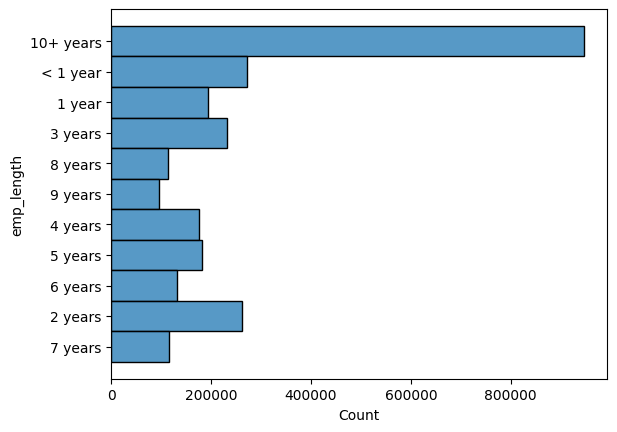

In [39]:
sns.histplot(data=loans, y="emp_length")

In [40]:
loans.groupby("emp_length")["good_bad"].mean()

emp_length
1 year       0.866786
10+ years    0.877640
2 years      0.870481
3 years      0.868775
4 years      0.869656
5 years      0.871497
6 years      0.871355
7 years      0.867159
8 years      0.860467
9 years      0.862227
< 1 year     0.876241
Name: good_bad, dtype: float64

In [41]:
loans["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [42]:
loans["emp_length"] = loans["emp_length"].str.replace("na", "10+ years")

In [43]:
loans.groupby("emp_length")["good_bad"].mean()

emp_length
1 year       0.866786
10+ years    0.877640
2 years      0.870481
3 years      0.868775
4 years      0.869656
5 years      0.871497
6 years      0.871355
7 years      0.867159
8 years      0.860467
9 years      0.862227
< 1 year     0.876241
Name: good_bad, dtype: float64

There are a lot of empty values in this column, and there is no clear way to handle missing values (10+ years is clearly the most common value, but there is approximately the same number of obsrvations in all other columns, and on the other hand, there is too many missing values to just delete those observations). However, this variable could be very important for the model, thus all of missing values will be replaced with "10 + years" value

In [44]:
#loans["emp_length"] = (loans["emp_length"]
#                           .str.replace("+ years", "")
#                           .str.replace(" years", "")
#                           .str.replace("< 1 year", "0")
#                           .str.replace(" year", "")
#                           .str.strip()
#                           .astype(int)
#                          )

In [45]:
loans["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

Notice that the percentage of non defaulted clients for "10+ years" dropped from about 87,48% to approximately 86,81%

**Transforming and investigating other text columns:**

In [46]:
text_cols = [
    "purpose",
    "title",
    "addr_state",
    "emp_title",
    "home_ownership",
    "verification_status",
    "pymnt_plan",
    "initial_list_status",
    "application_type",
    "hardship_flag",
    "debt_settlement_flag"
]

In [47]:
for col in text_cols:
    print(f"{col} \n")
    loans[col] = loans[col].str.lower().str.strip()
    print(f"unique values: {loans[col].nunique()}\n")
    print(loans[col].unique())
    print("\n\n")

purpose 

unique values: 14

['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']



title 

unique values: 51791

['computer' 'bike' 'real estate business' ... 'new kitchen for momma!'
 'new baby and new house (cc consolidate)' 'credit card/auto repair']



addr_state 

unique values: 51

['az' 'ga' 'il' 'ca' 'or' 'nc' 'tx' 'va' 'mo' 'ct' 'ut' 'fl' 'ny' 'pa'
 'mn' 'nj' 'ky' 'oh' 'sc' 'ri' 'la' 'ma' 'wa' 'wi' 'al' 'co' 'ks' 'nv'
 'ak' 'md' 'wv' 'vt' 'mi' 'dc' 'sd' 'nh' 'ar' 'nm' 'mt' 'hi' 'wy' 'ok'
 'de' 'ms' 'tn' 'ia' 'ne' 'id' 'in' 'me' 'nd']



emp_title 

unique values: 470081

[nan 'ryder' 'air resources board' ... 'track repair'
 'emr applications tech' 'contact input']



home_ownership 

unique values: 6

['rent' 'own' 'mortgage' 'other' 'none' 'any']



verification_status 

unique values: 3

['verified' 'source verified' 'not verified']



pymn

In [48]:
loans["title"].value_counts().head(20)

title
debt consolidation           1535986
credit card refinancing       648801
home improvement              182729
other                         165855
major purchase                 57393
medical expenses               33310
car financing                  26343
business                       26209
vacation                       19323
home buying                    18193
moving and relocation          17590
consolidation                   8142
debt consolidation loan         4824
credit card consolidation       3661
personal loan                   3418
consolidation loan              2691
credit card payoff              2574
credit card refinance           2539
consolidate                     2190
personal                        2154
Name: count, dtype: int64

In [49]:
loans["emp_title"].value_counts().head(20)

emp_title
teacher               62223
manager               58549
owner                 37704
registered nurse      30632
driver                29020
supervisor            28454
sales                 23137
rn                    21477
office manager        18863
project manager       18036
general manager       17622
truck driver          17323
director              13347
president             11553
engineer              11087
sales manager         11002
operations manager    10902
police officer         9940
technician             9580
vice president         9579
Name: count, dtype: int64

All columns seems good, but:
* `pymnt_plan` can be dropped, beacause it has only one value
* `title` can be dropped, because the same information can be found in `purpose` column, which is cleaned

In [50]:
loans.drop(columns=["pymnt_plan", "title"], inplace=True)

#### **Numeric variables**

Numeric values could be changed to int to save some memory, but it requires dealing with missing value beforehand

#### **3.4.3 Dealing with missing values**

In [51]:
loans.isnull().sum()

loan_amnt                               0
funded_amnt                             0
funded_amnt_inv                         0
term                                    0
int_rate                                0
installment                             0
grade                                   0
sub_grade                               0
emp_title                          264086
emp_length                         205220
home_ownership                          0
annual_inc                              4
verification_status                     0
good_bad                                0
purpose                                 0
addr_state                              0
dti                                  3108
delinq_2yrs                            29
fico_range_low                          0
fico_range_high                         0
inq_last_6mths                         30
open_acc                               29
pub_rec                                29
revol_bal                         

In [52]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925492 entries, 1077501 to 99799684
Columns: 101 entries, loan_amnt to mnths_since_issue_d
dtypes: float64(87), int32(2), object(12)
memory usage: 2.3+ GB


#### **Numeric variables**

In [53]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [54]:
loans_corr = loans[loans.select_dtypes(numerics).columns.values].corr().round(2) * 100

In [55]:
loans_corr_85 = loans_corr >= 85

In [56]:
loans_corr_cols = pd.DataFrame(loans_corr_85.dot(loans_corr_85.columns + ';').str.rstrip(';'), columns=["columns with >=85 corr"])

In [57]:
loans_corr_cols["columns with >=85 corr"] = loans_corr_cols["columns with >=85 corr"].str.replace(";", ", ")

In [58]:
loans_corr_cols["columns with >=85 corr"] = loans_corr_cols["columns with >=85 corr"].str.replace(loans_corr_cols.index, "")

In [59]:
pd.options.display.max_columns = None

In [60]:
pd.set_option('display.max_colwidth', None)
loans_corr_cols

columns with >=85 corr
loan_amnt                                          NaN
funded_amnt                                        NaN
funded_amnt_inv                                    NaN
term                                               NaN
int_rate                                           NaN
installment                                        NaN
annual_inc                                         NaN
good_bad                                           NaN
dti                                                NaN
delinq_2yrs                                        NaN
fico_range_low                                     NaN
fico_range_high                                    NaN
inq_last_6mths                                     NaN
open_acc                                           NaN
pub_rec                                            NaN
revol_bal                                          NaN
revol_util                                         NaN
total_acc                                          NaN
out_prncp                                          NaN
out_prncp_inv                                      NaN
total_pymnt                                        NaN
total_pymnt_inv                                    NaN
total_rec_prncp                                    NaN
total_rec_int                                      NaN
total_rec_late_fee                                 NaN
recoveries                                         NaN
collection_recovery_fee                            NaN
last_pymnt_amnt                                    NaN
last_fico_range_high                               NaN
last_fico_range_low                                NaN
collections_12_mths_ex_med                         NaN
policy_code                                        NaN
acc_now_delinq                                     NaN
tot_coll_amt                                       NaN
tot_cur_bal                                        NaN
open_acc_6m                                        NaN
open_act_il                                        NaN
open_il_12m                                        NaN
open_il_24m                                        NaN
mths_since_rcnt_il                                 NaN
total_bal_il                                       NaN
il_util                                            NaN
open_rv_12m                                        NaN
open_rv_24m                                        NaN
max_bal_bc                                         NaN
all_util                                           NaN
total_rev_hi_lim                                   NaN
inq_fi                                             NaN
total_cu_tl                                        NaN
inq_last_12m                                       NaN
acc_open_past_24mths                               NaN
avg_cur_bal                                        NaN
bc_open_to_buy                                     NaN
bc_util                                            NaN
chargeoff_within_12_mths                           NaN
delinq_amnt                                        NaN
mo_sin_old_il_acct                                 NaN
mo_sin_old_rev_tl_op                               NaN
mo_sin_rcnt_rev_tl_op                              NaN
mo_sin_rcnt_tl                                     NaN
mort_acc                                           NaN
mths_since_recent_bc                               NaN
mths_since_recent_inq                              NaN
num_accts_ever_120_pd                              NaN
num_actv_bc_tl                                     NaN
num_actv_rev_tl                                    NaN
num_bc_sats                                        NaN
num_bc_tl                                          NaN
num_il_tl                                          NaN
num_op_rev_tl                                      NaN
num_rev_accts                                      NaN
num_rev_tl_bal_gt_0                                NaN
num_sats         

Columns that will be dropped:

* `funded_amnt`
* `funded_amnt_inv`
* `installment`
* `fico_range_high`
* `bc_util`
* `out_prncp_inv`
* `total_pymnt_inv`
* `total_rec_prncp`
* `collection_recovery_fee`
* `last_fico_range_high`
* `tot_cur_bal`
* `total_bal_ex_mort`
* `total_il_high_credit_limit`
* `bc_open_to_buy`
* `percent_bc_gt_75`
* `mo_sin_old_rev_tl_op`
* `open_acc`
* `mnths_since_issue_d`

In [61]:
loans.drop(columns=[
    "funded_amnt",
    "funded_amnt_inv",
    "installment",
    "fico_range_high",
    "bc_util",
    "out_prncp_inv",
    "total_pymnt_inv",
    "collection_recovery_fee",
    "last_fico_range_high",
    "tot_cur_bal",
    "total_bal_ex_mort",
    "total_il_high_credit_limit",
    "bc_open_to_buy",
    "percent_bc_gt_75",
    "mo_sin_old_rev_tl_op",
    "open_acc",
    "mnths_since_issue_d"
], inplace=True)

In [62]:
loans_corr.loc["good_bad", :]

loan_amnt                          -2.0
funded_amnt                        -2.0
funded_amnt_inv                    -2.0
term                               -9.0
int_rate                          -21.0
installment                        -3.0
annual_inc                          3.0
good_bad                          100.0
dti                                -2.0
delinq_2yrs                        -2.0
fico_range_low                     12.0
fico_range_high                    12.0
inq_last_6mths                     -8.0
open_acc                           -1.0
pub_rec                            -4.0
revol_bal                           3.0
revol_util                         -6.0
total_acc                          -0.0
out_prncp                          18.0
out_prncp_inv                      18.0
total_pymnt                        14.0
total_pymnt_inv                    14.0
total_rec_prncp                    23.0
total_rec_int                      -5.0
total_rec_late_fee                -11.0


loan_amnt 

unique values: 1572

null values: 0

count    2.925492e+06
mean     1.535878e+04
std      9.478383e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.300000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64


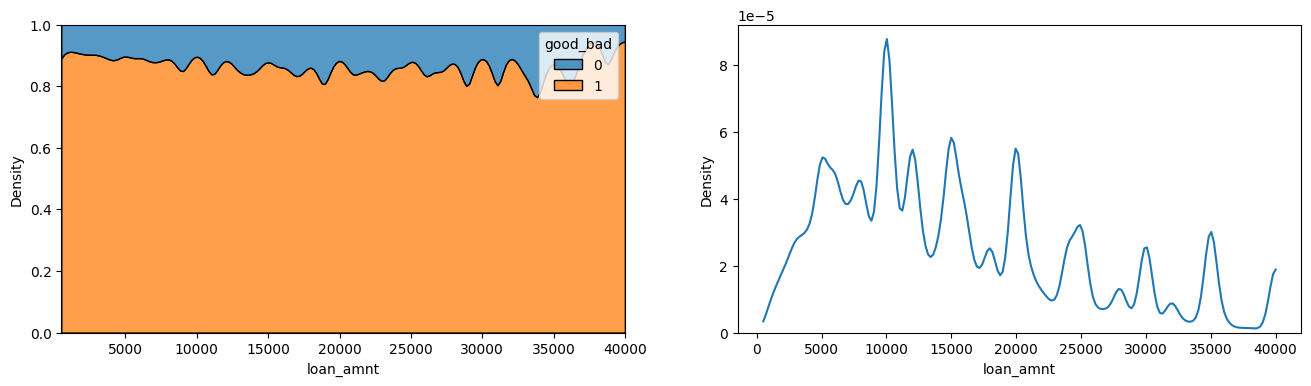




term 

unique values: 2

null values: 0

count    2.925492e+06
mean     4.309965e+01
std      1.095384e+01
min      3.600000e+01
25%      3.600000e+01
50%      3.600000e+01
75%      6.000000e+01
max      6.000000e+01
Name: term, dtype: float64


   term  good_bad
0    36  0.889262
1    60  0.824631



int_rate 

unique values: 704

null values: 0

count    2.925492e+06
mean     1.304545e+01
std      4.860815e+00
min      5.310000e+00
25%      9.170000e+00
50%      1.249000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64


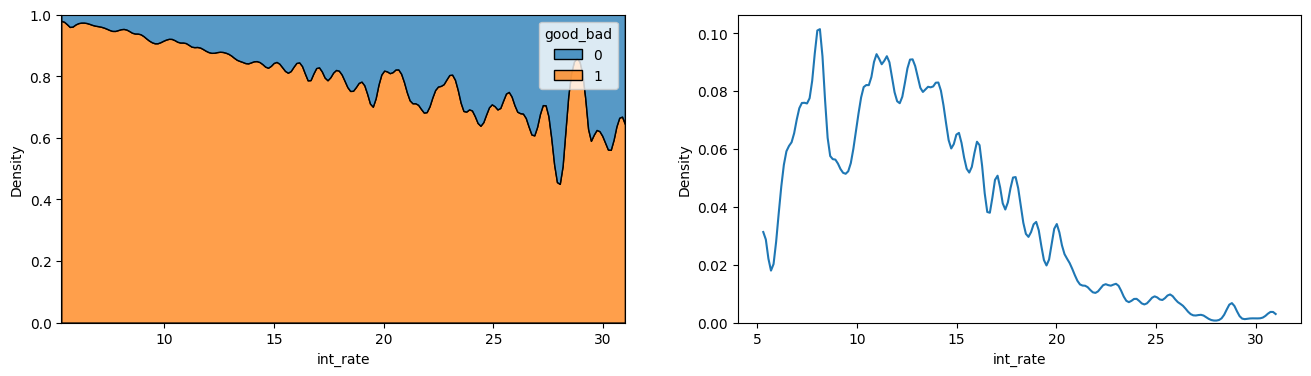




annual_inc 

unique values: 104484

null values: 4

count    2.925488e+06
mean     7.993727e+04
std      1.117476e+05
min      0.000000e+00
25%      4.700000e+04
50%      6.600000e+04
75%      9.500000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64


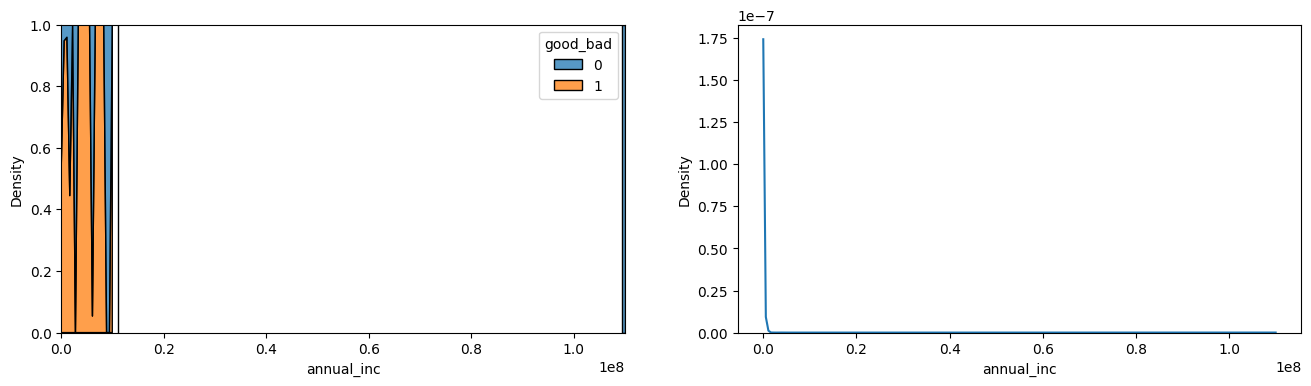




dti 

unique values: 13221

null values: 3108

count    2.922384e+06
mean     1.929648e+01
std      1.571977e+01
min     -1.000000e+00
25%      1.208000e+01
50%      1.810000e+01
75%      2.488000e+01
max      9.990000e+02
Name: dti, dtype: float64


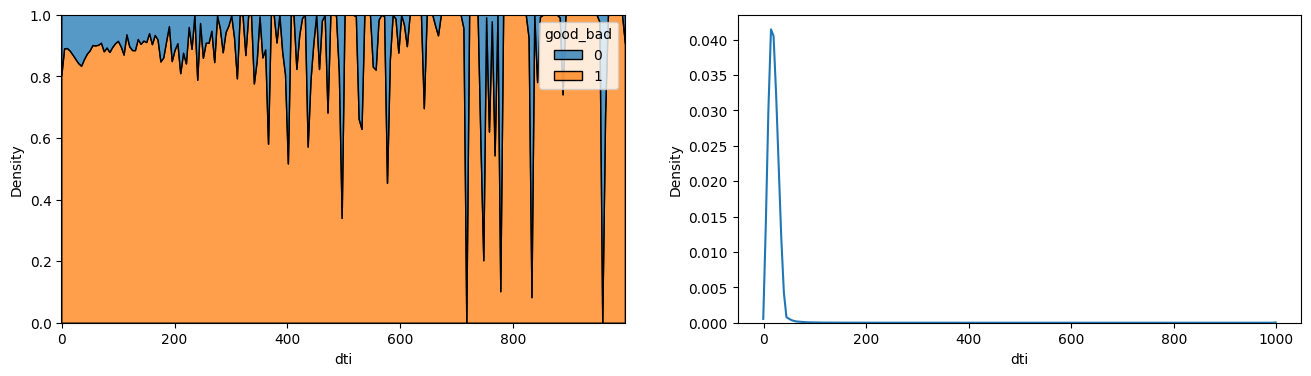




delinq_2yrs 

unique values: 37

null values: 29

count    2.925463e+06
mean     2.897012e-01
std      8.436819e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.800000e+01
Name: delinq_2yrs, dtype: float64


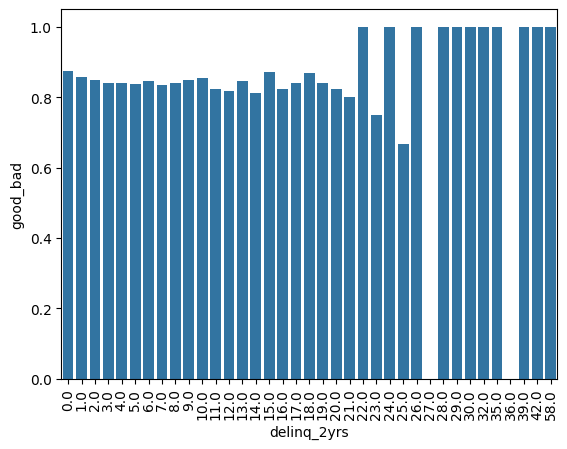




fico_range_low 

unique values: 48

null values: 0

count    2.925492e+06
mean     7.005110e+02
std      3.376565e+01
min      6.100000e+02
25%      6.750000e+02
50%      6.950000e+02
75%      7.200000e+02
max      8.450000e+02
Name: fico_range_low, dtype: float64


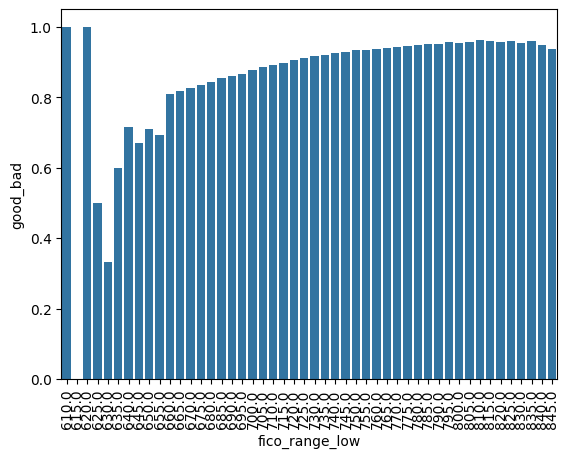




inq_last_6mths 

unique values: 28

null values: 30

count    2.925462e+06
mean     5.542130e-01
std      8.599755e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      3.300000e+01
Name: inq_last_6mths, dtype: float64


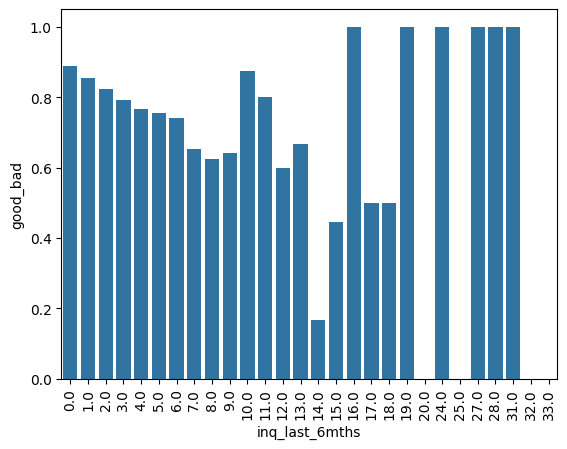




pub_rec 

unique values: 43

null values: 29

count    2.925463e+06
mean     1.762846e-01
std      5.243762e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.600000e+01
Name: pub_rec, dtype: float64


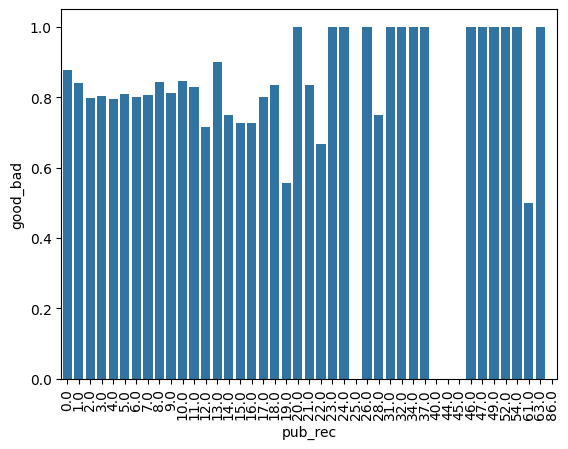




revol_bal 

unique values: 113334

null values: 0

count    2.925492e+06
mean     1.696484e+04
std      2.299621e+04
min      0.000000e+00
25%      5.993000e+03
50%      1.149300e+04
75%      2.064400e+04
max      2.904836e+06
Name: revol_bal, dtype: float64


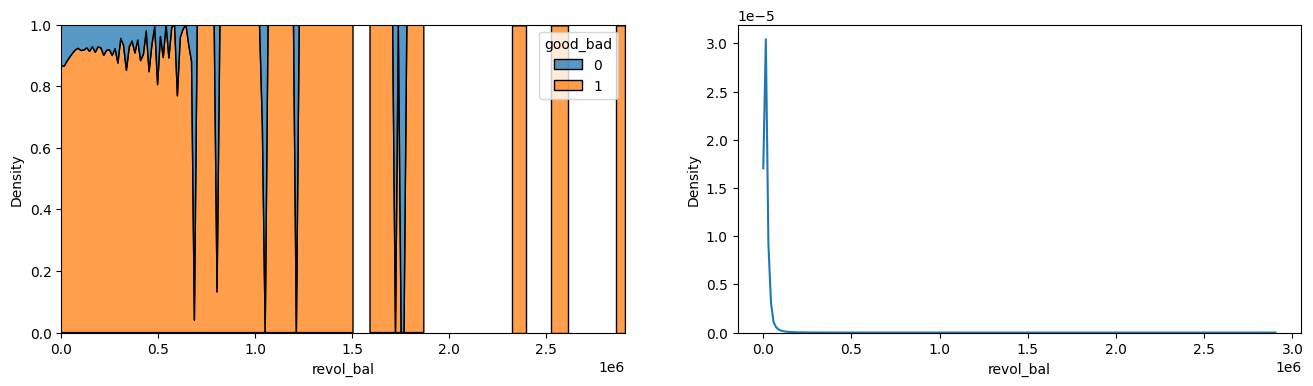




revol_util 

unique values: 1443

null values: 2660

count    2.922832e+06
mean     4.898644e+01
std      2.490121e+01
min      0.000000e+00
25%      2.980000e+01
50%      4.860000e+01
75%      6.810000e+01
max      8.923000e+02
Name: revol_util, dtype: float64


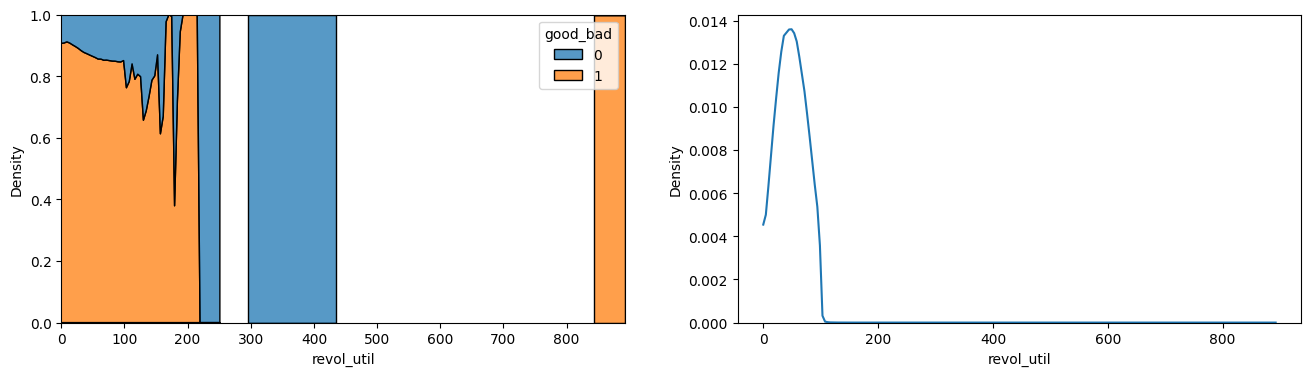




total_acc 

unique values: 157

null values: 29

count    2.925463e+06
mean     2.401835e+01
std      1.207625e+01
min      1.000000e+00
25%      1.500000e+01
50%      2.200000e+01
75%      3.100000e+01
max      1.760000e+02
Name: total_acc, dtype: float64


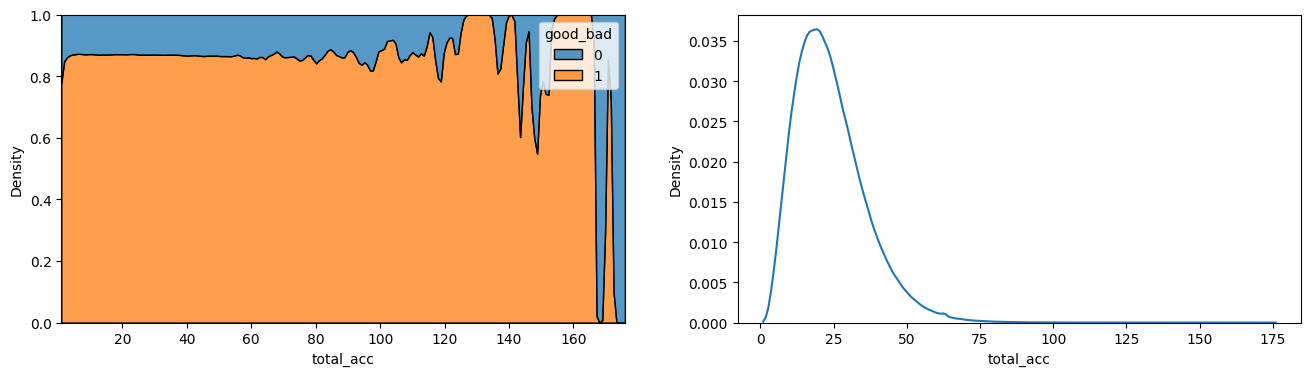




out_prncp 

unique values: 532596

null values: 0

count    2.925492e+06
mean     4.038697e+03
std      7.485058e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.339520e+03
max      4.000000e+04
Name: out_prncp, dtype: float64


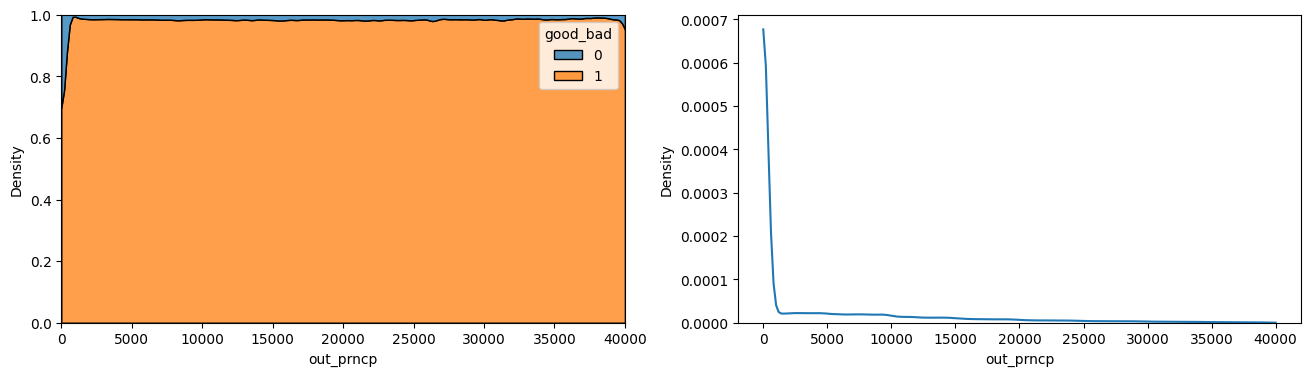




total_pymnt 

unique values: 2067940

null values: 0

count    2.925492e+06
mean     1.257455e+04
std      1.032239e+04
min      0.000000e+00
25%      4.760818e+03
50%      9.788272e+03
75%      1.760199e+04
max      6.717438e+04
Name: total_pymnt, dtype: float64


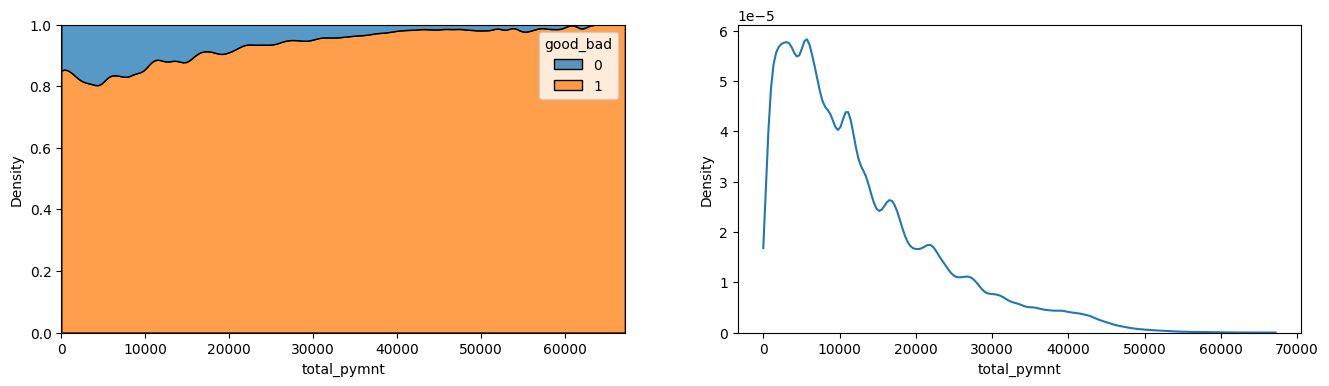




total_rec_prncp 

unique values: 632395

null values: 0

count    2.925492e+06
mean     9.917802e+03
std      8.655840e+03
min      0.000000e+00
25%      3.151637e+03
50%      7.417350e+03
75%      1.453301e+04
max      4.000000e+04
Name: total_rec_prncp, dtype: float64


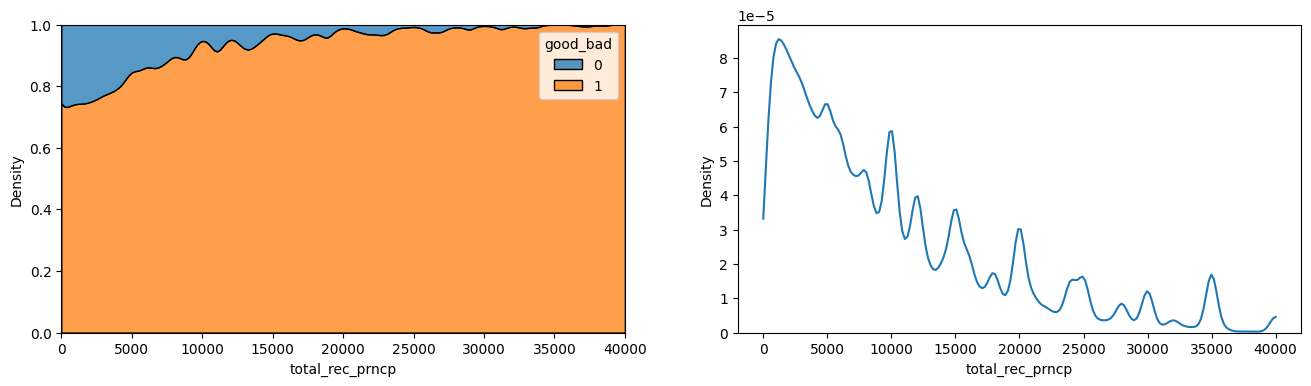




total_rec_int 

unique values: 727968

null values: 0

count    2.925492e+06
mean     2.484797e+03
std      2.761686e+03
min      0.000000e+00
25%      7.278700e+02
50%      1.548860e+03
75%      3.188780e+03
max      3.258980e+04
Name: total_rec_int, dtype: float64


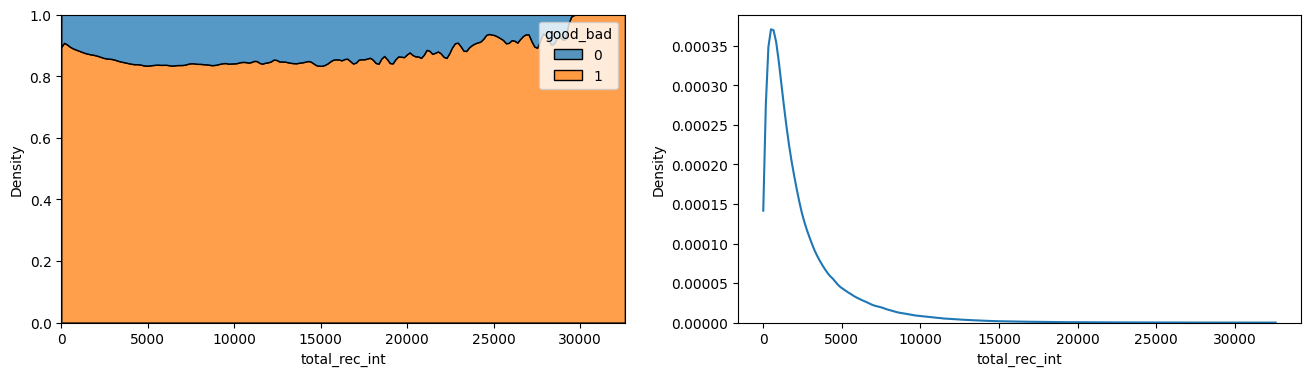




total_rec_late_fee 

unique values: 22976

null values: 0

count    2.925492e+06
mean     1.764549e+00
std      1.386052e+01
min     -5.100000e-09
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.598520e+03
Name: total_rec_late_fee, dtype: float64


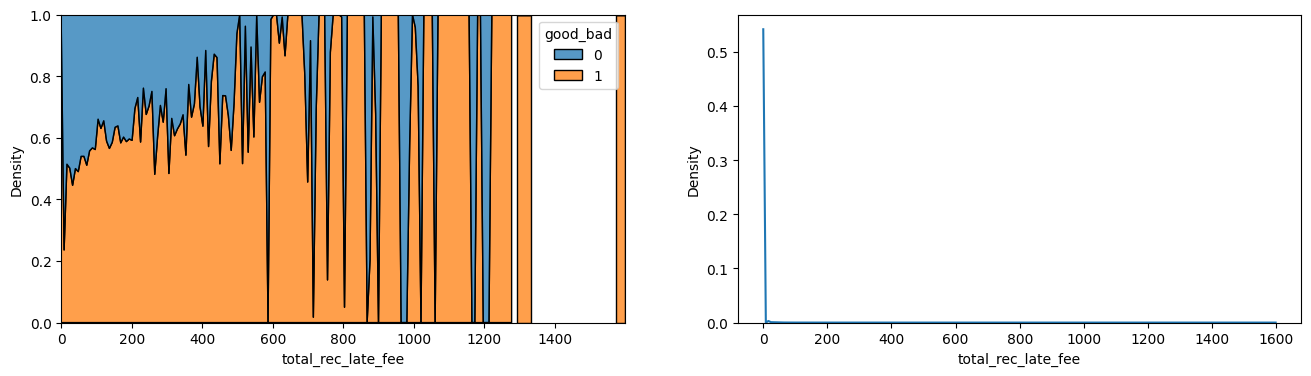




recoveries 

unique values: 175479

null values: 0

count    2.925492e+06
mean     1.701868e+02
std      8.459107e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.180325e+04
Name: recoveries, dtype: float64


C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\175654176.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=loans, hue="good_bad", x=col, multiple="fill", ax=ax[0], cut=0)


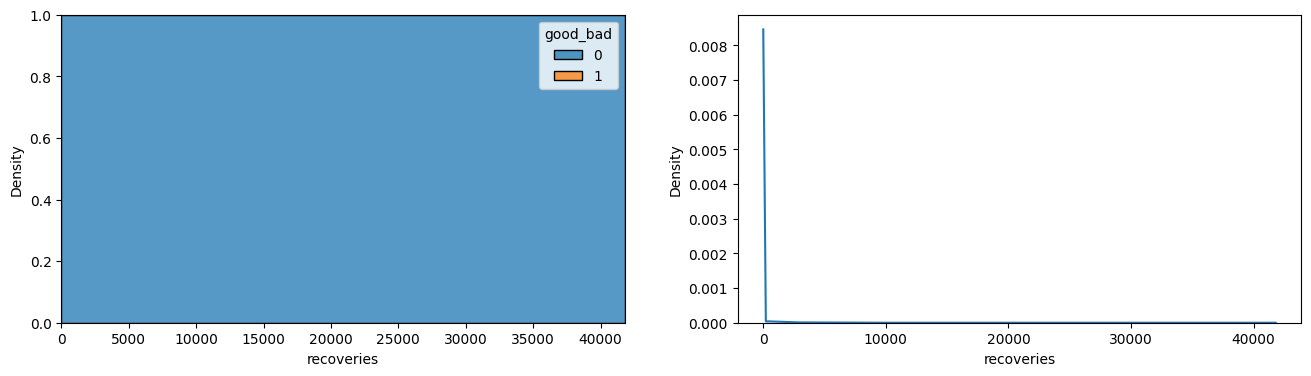




last_pymnt_amnt 

unique values: 861597

null values: 0

count    2.925492e+06
mean     3.479507e+03
std      6.133999e+03
min     -2.103340e+04
25%      2.642600e+02
50%      5.837900e+02
75%      3.914903e+03
max      4.219205e+04
Name: last_pymnt_amnt, dtype: float64


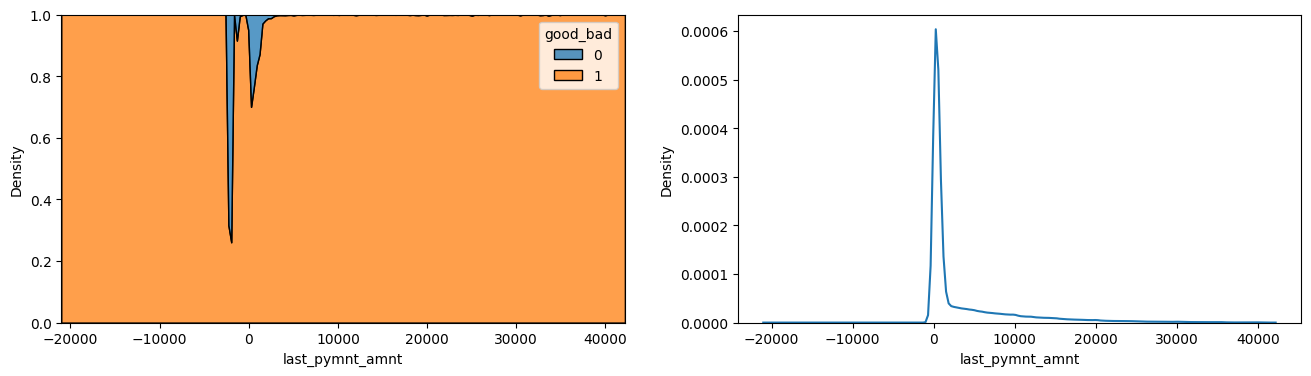




last_fico_range_low 

unique values: 71

null values: 0

count    2.925492e+06
mean     6.778456e+02
std      1.140367e+02
min      0.000000e+00
25%      6.500000e+02
50%      6.950000e+02
75%      7.350000e+02
max      8.450000e+02
Name: last_fico_range_low, dtype: float64


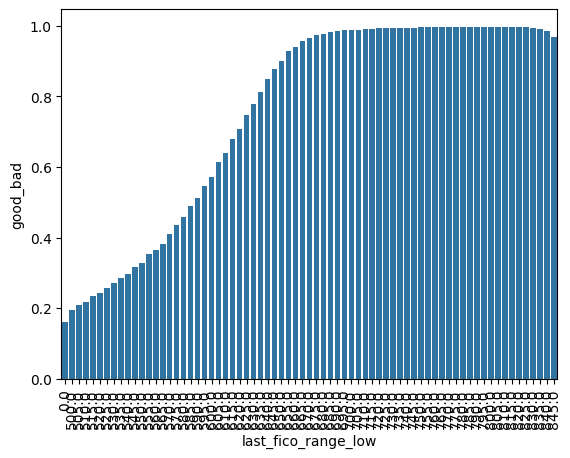




collections_12_mths_ex_med 

unique values: 16

null values: 145

count    2.925347e+06
mean     1.768166e-02
std      1.477638e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.000000e+01
Name: collections_12_mths_ex_med, dtype: float64


    collections_12_mths_ex_med  good_bad
0                          0.0  0.870685
1                          1.0  0.838443
2                          2.0  0.822502
3                          3.0  0.826748
4                          4.0  0.820755
5                          5.0  0.883721
6                          6.0  0.750000
7                          7.0  1.000000
8                          8.0  1.000000
9                          9.0  0.750000
10                        10.0  1.000000
11                        11.0  1.000000
12                        12.0  1.000000
13                        14.0  1.000000
14                        16.0  1.000000
15                        20.0  1.000000



poli

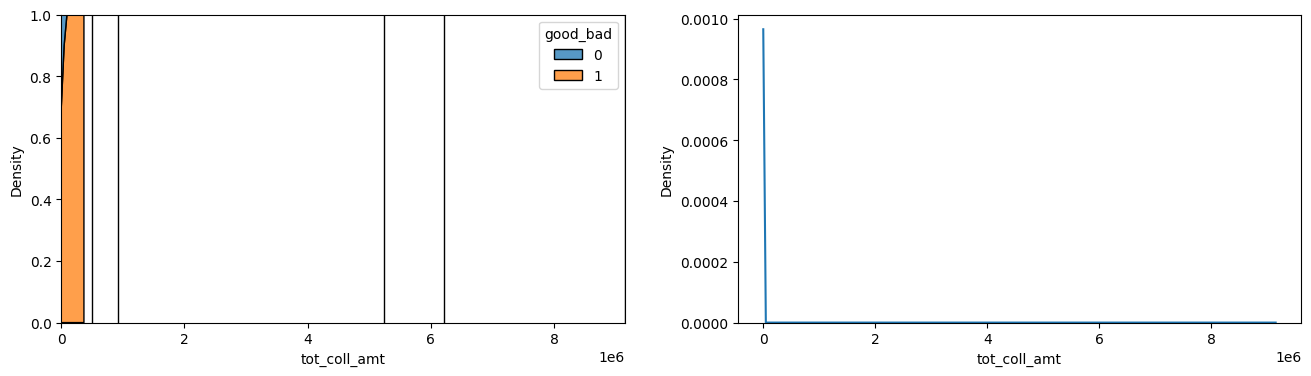




open_acc_6m 

unique values: 19

null values: 866130

count    2.059362e+06
mean     9.312399e-01
std      1.139136e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.800000e+01
Name: open_acc_6m, dtype: float64


    open_acc_6m  good_bad
0           0.0  0.906430
1           1.0  0.888752
2           2.0  0.870836
3           3.0  0.854441
4           4.0  0.837285
5           5.0  0.827878
6           6.0  0.817234
7           7.0  0.819077
8           8.0  0.784091
9           9.0  0.797333
10         10.0  0.825301
11         11.0  0.691176
12         12.0  0.705882
13         13.0  0.727273
14         14.0  0.700000
15         15.0  1.000000
16         16.0  0.500000
17         17.0  0.000000
18         18.0  0.500000



open_act_il 

unique values: 60

null values: 866129

count    2.059363e+06
mean     2.826787e+00
std      2.999156e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00


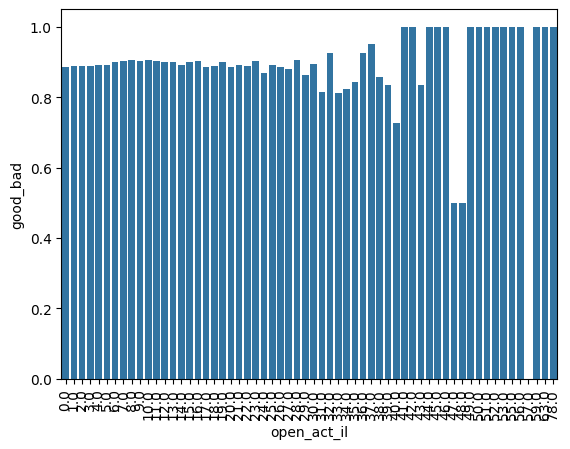




open_il_12m 

unique values: 19

null values: 866129

count    2.059363e+06
mean     6.988807e-01
std      9.373782e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      2.500000e+01
Name: open_il_12m, dtype: float64


    open_il_12m  good_bad
0           0.0  0.899579
1           1.0  0.886730
2           2.0  0.870342
3           3.0  0.857832
4           4.0  0.853303
5           5.0  0.850873
6           6.0  0.845357
7           7.0  0.762295
8           8.0  0.714286
9           9.0  0.750000
10         10.0  0.733333
11         11.0  0.647059
12         12.0  0.833333
13         13.0  0.714286
14         14.0  1.000000
15         15.0  1.000000
16         20.0  0.500000
17         21.0  0.000000
18         25.0  0.000000



open_il_24m 

unique values: 32

null values: 866129

count    2.059363e+06
mean     1.603937e+00
std      1.584572e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00


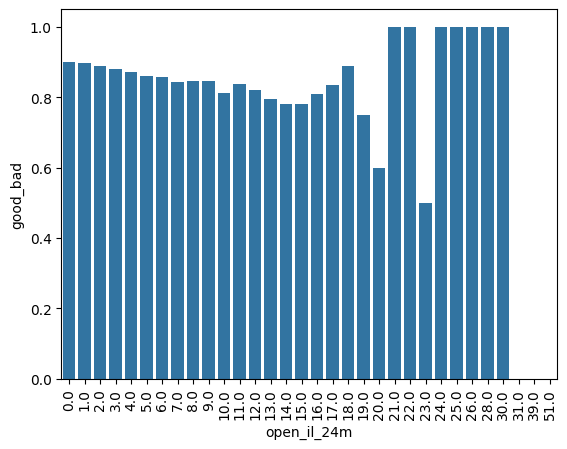




mths_since_rcnt_il 

unique values: 426

null values: 926529

count    1.998963e+06
mean     2.040308e+01
std      2.502035e+01
min      0.000000e+00
25%      7.000000e+00
50%      1.300000e+01
75%      2.300000e+01
max      5.110000e+02
Name: mths_since_rcnt_il, dtype: float64


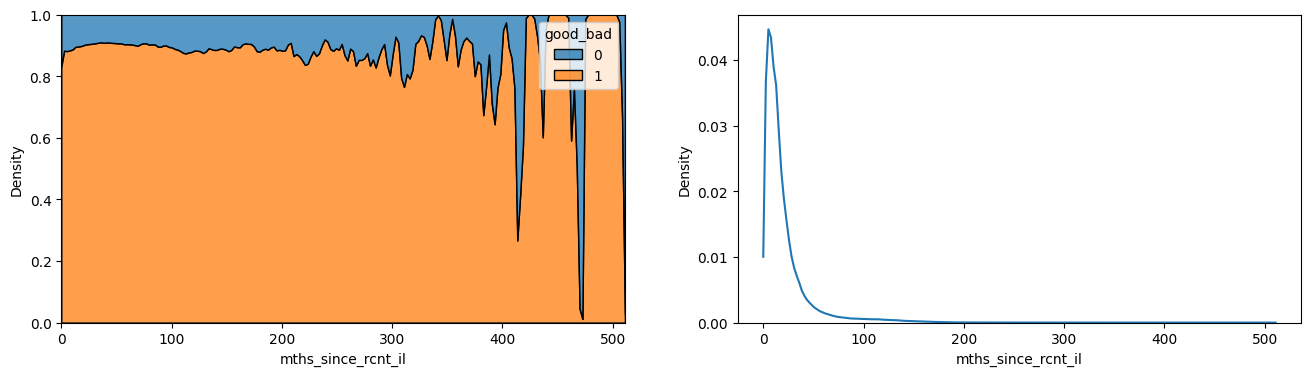




total_bal_il 

unique values: 187179

null values: 866129

count    2.059363e+06
mean     3.683537e+04
std      4.588611e+04
min      0.000000e+00
25%      9.141000e+03
50%      2.394300e+04
75%      4.765600e+04
max      1.990176e+06
Name: total_bal_il, dtype: float64


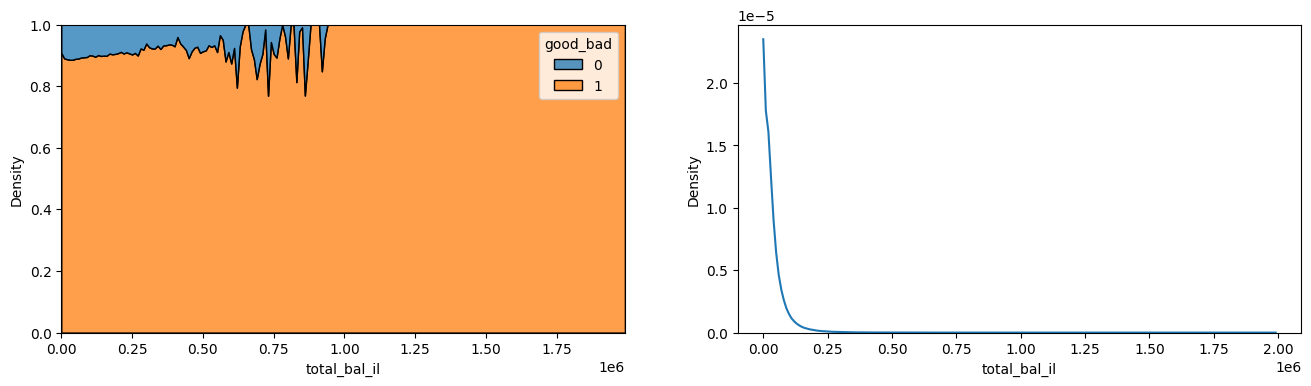




il_util 

unique values: 311

null values: 1157148

count    1.768344e+06
mean     6.896371e+01
std      2.359473e+01
min      0.000000e+00
25%      5.500000e+01
50%      7.200000e+01
75%      8.500000e+01
max      1.000000e+03
Name: il_util, dtype: float64


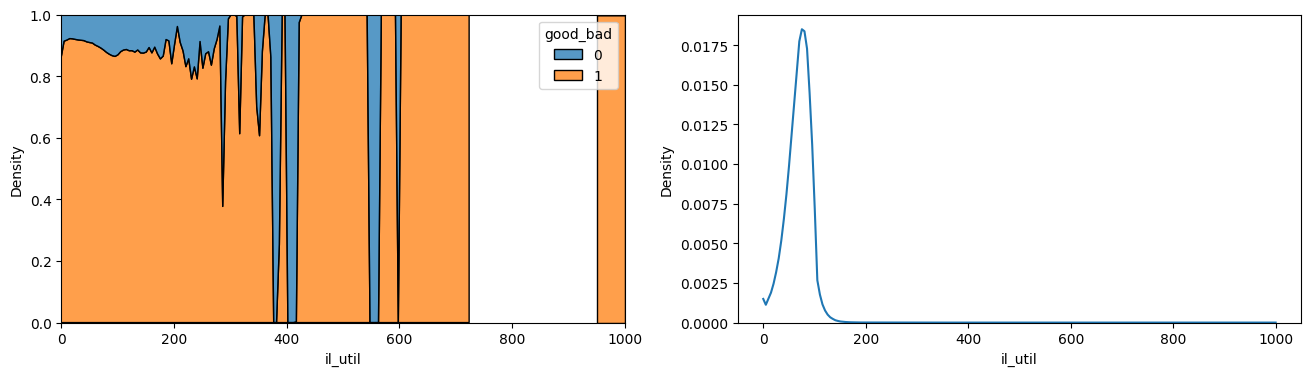




open_rv_12m 

unique values: 29

null values: 866129

count    2.059363e+06
mean     1.253812e+00
std      1.488005e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.800000e+01
Name: open_rv_12m, dtype: float64


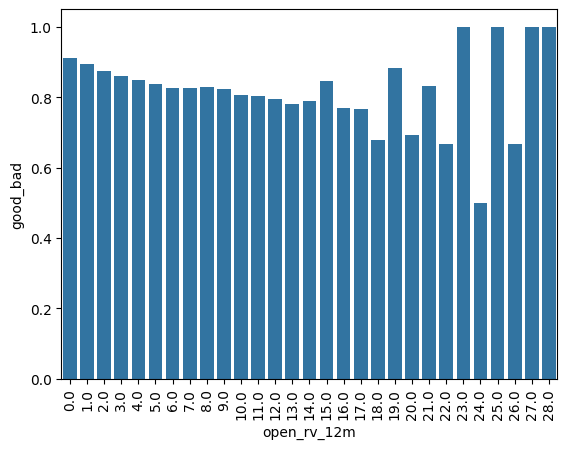




open_rv_24m 

unique values: 52

null values: 866129

count    2.059363e+06
mean     2.645740e+00
std      2.552130e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      6.000000e+01
Name: open_rv_24m, dtype: float64


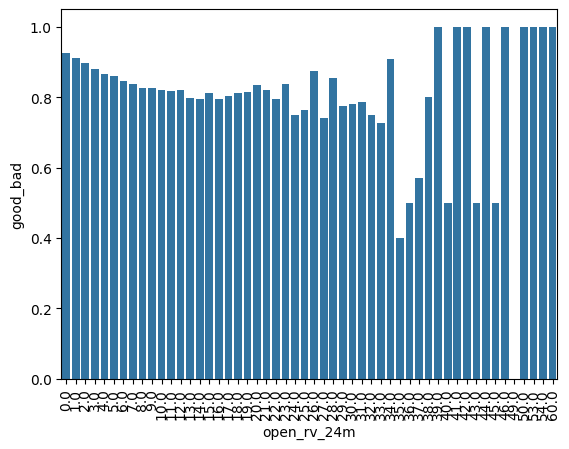




max_bal_bc 

unique values: 37181

null values: 866129

count    2.059363e+06
mean     6.018204e+03
std      5.890125e+03
min      0.000000e+00
25%      2.344000e+03
50%      4.567000e+03
75%      7.912000e+03
max      1.170668e+06
Name: max_bal_bc, dtype: float64


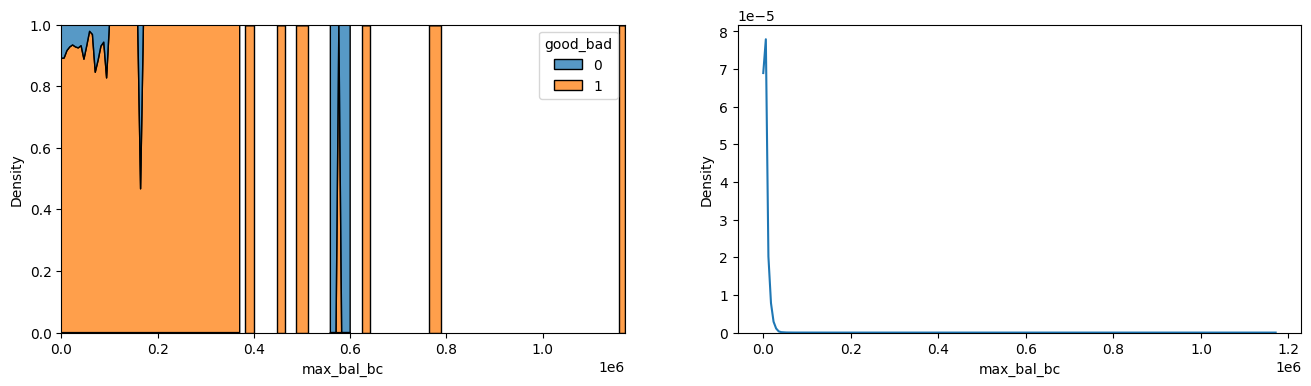




all_util 

unique values: 195

null values: 866485

count    2.059007e+06
mean     5.627866e+01
std      2.075949e+01
min      0.000000e+00
25%      4.200000e+01
50%      5.700000e+01
75%      7.100000e+01
max      2.390000e+02
Name: all_util, dtype: float64


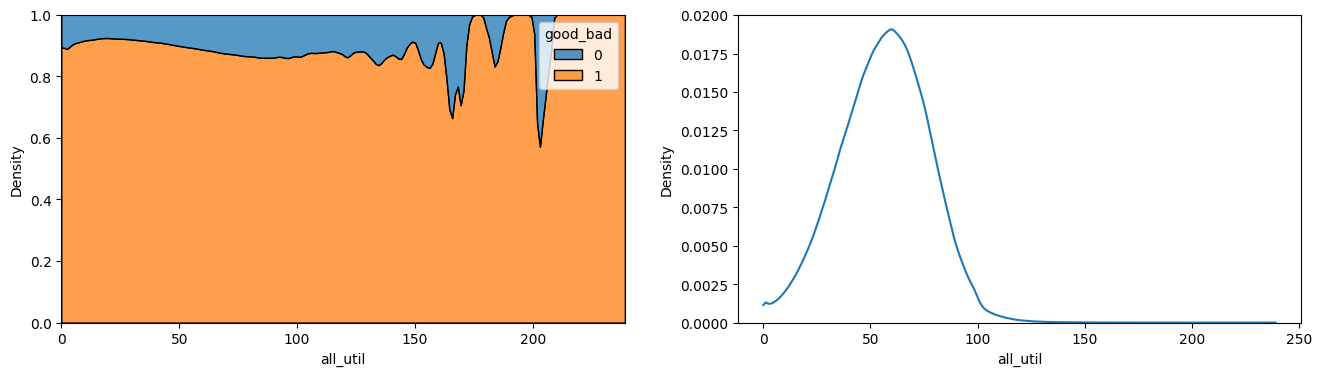




total_rev_hi_lim 

unique values: 35811

null values: 70276

count    2.855216e+06
mean     3.633864e+04
std      3.730990e+04
min      0.000000e+00
25%      1.540000e+04
50%      2.680000e+04
75%      4.560000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64


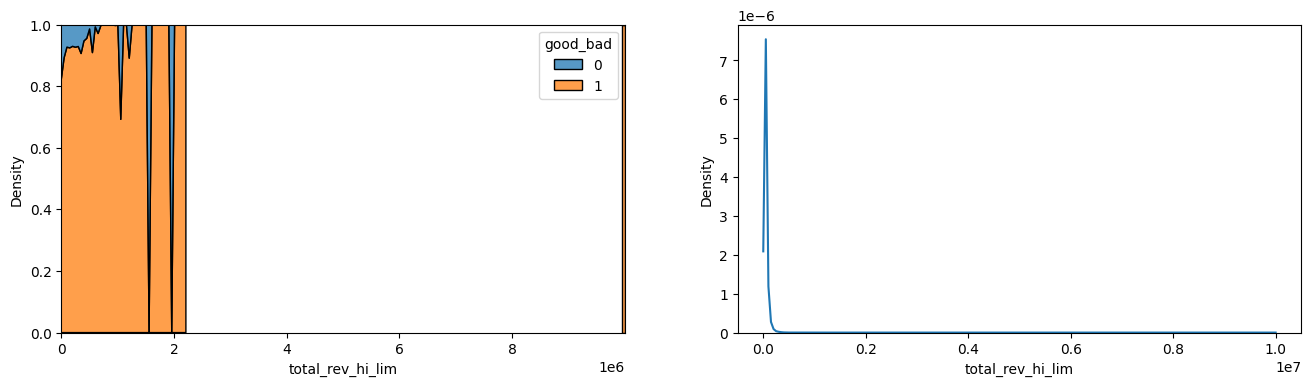




inq_fi 

unique values: 36

null values: 866129

count    2.059363e+06
mean     1.071141e+00
std      1.495848e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      4.800000e+01
Name: inq_fi, dtype: float64


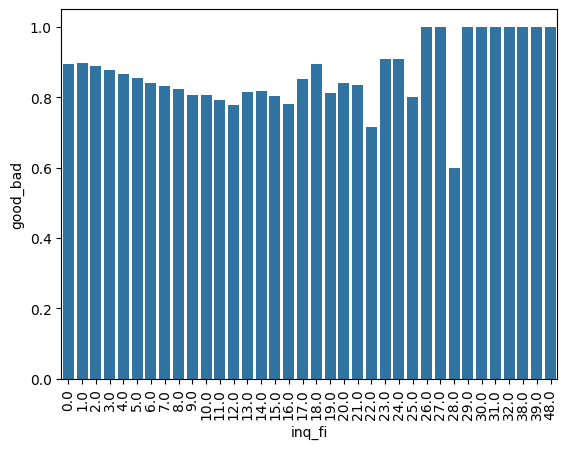




total_cu_tl 

unique values: 65

null values: 866130

count    2.059362e+06
mean     1.517789e+00
std      2.714793e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      1.110000e+02
Name: total_cu_tl, dtype: float64


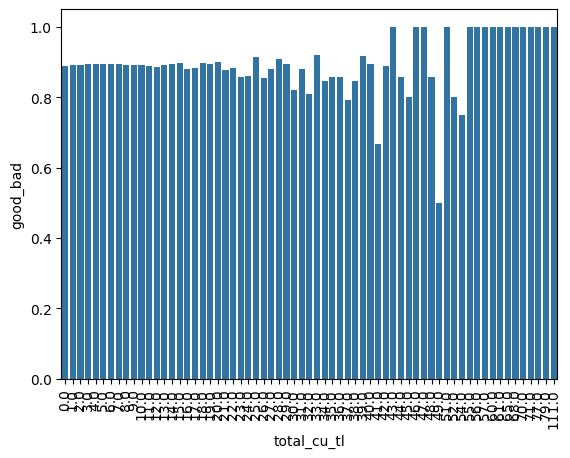




inq_last_12m 

unique values: 50

null values: 866130

count    2.059362e+06
mean     2.001608e+00
std      2.354562e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      6.700000e+01
Name: inq_last_12m, dtype: float64


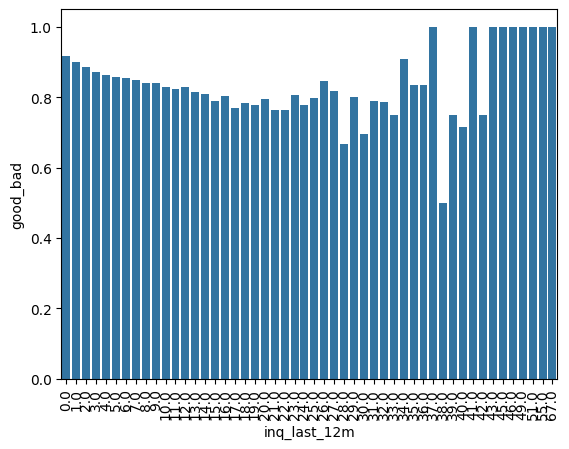




acc_open_past_24mths 

unique values: 57

null values: 50030

count    2.875462e+06
mean     4.490981e+00
std      3.167579e+00
min      0.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      6.400000e+01
Name: acc_open_past_24mths, dtype: float64


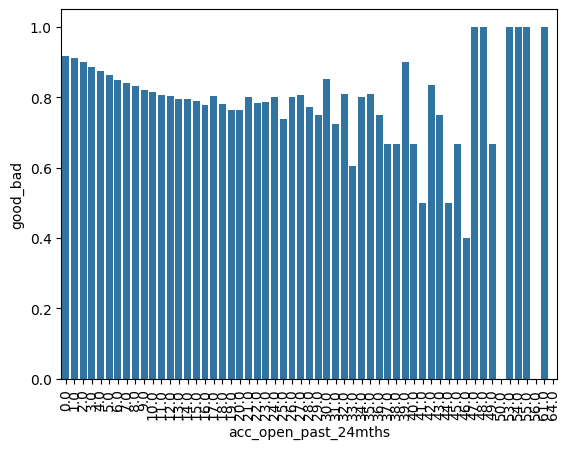




avg_cur_bal 

unique values: 95309

null values: 70388

count    2.855104e+06
mean     1.371221e+04
std      1.670636e+04
min      0.000000e+00
25%      3.113000e+03
50%      7.407000e+03
75%      1.899200e+04
max      9.580840e+05
Name: avg_cur_bal, dtype: float64


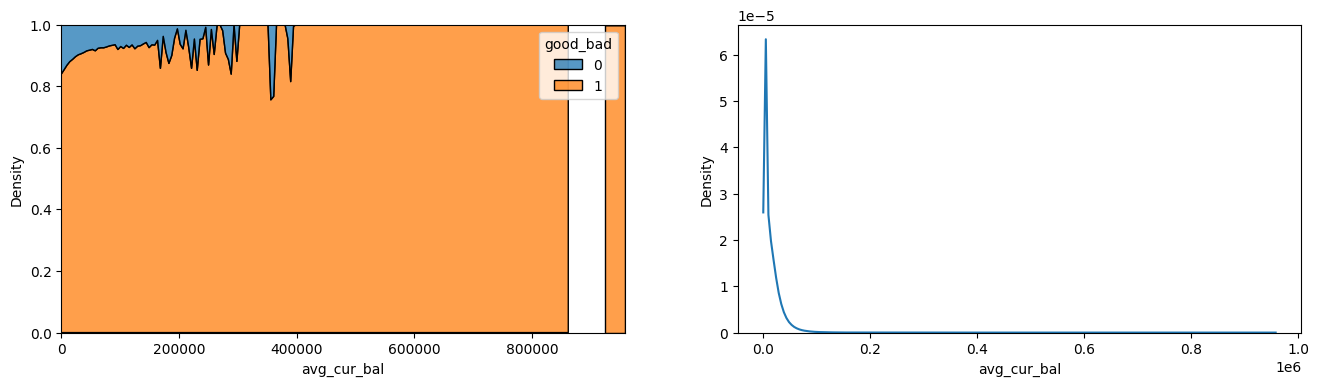




chargeoff_within_12_mths 

unique values: 11

null values: 145

count    2.925347e+06
mean     8.006913e-03
std      1.019131e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+01
Name: chargeoff_within_12_mths, dtype: float64


    chargeoff_within_12_mths  good_bad
0                        0.0  0.870340
1                        1.0  0.843461
2                        2.0  0.847662
3                        3.0  0.821429
4                        4.0  0.821429
5                        5.0  0.846154
6                        6.0  0.842105
7                        7.0  0.900000
8                        8.0  0.500000
9                        9.0  0.833333
10                      10.0  1.000000



delinq_amnt 

unique values: 2679

null values: 29

count    2.925463e+06
mean     9.907502e+00
std      6.480591e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.499250e+05
Name: del

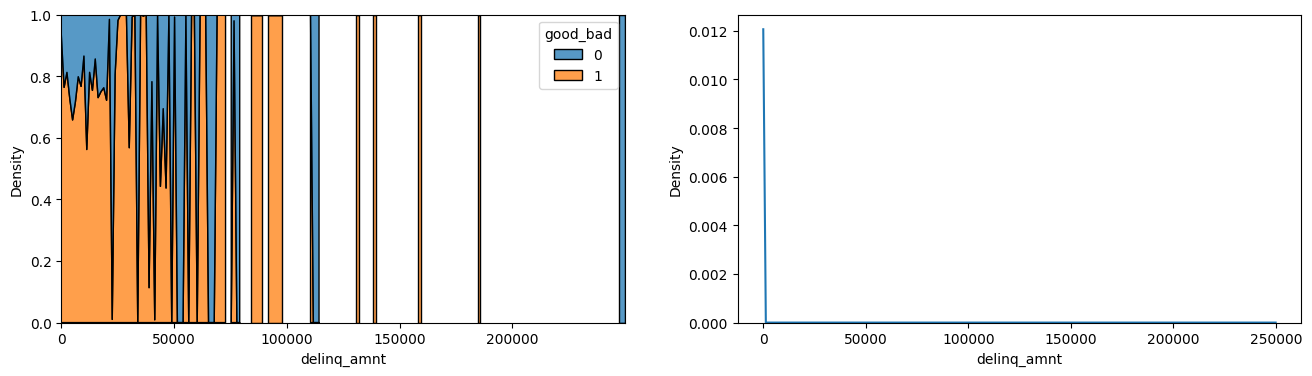




mo_sin_old_il_acct 

unique values: 597

null values: 155676

count    2.769816e+06
mean     1.259026e+02
std      5.441936e+01
min      0.000000e+00
25%      9.300000e+01
50%      1.300000e+02
75%      1.550000e+02
max      9.990000e+02
Name: mo_sin_old_il_acct, dtype: float64


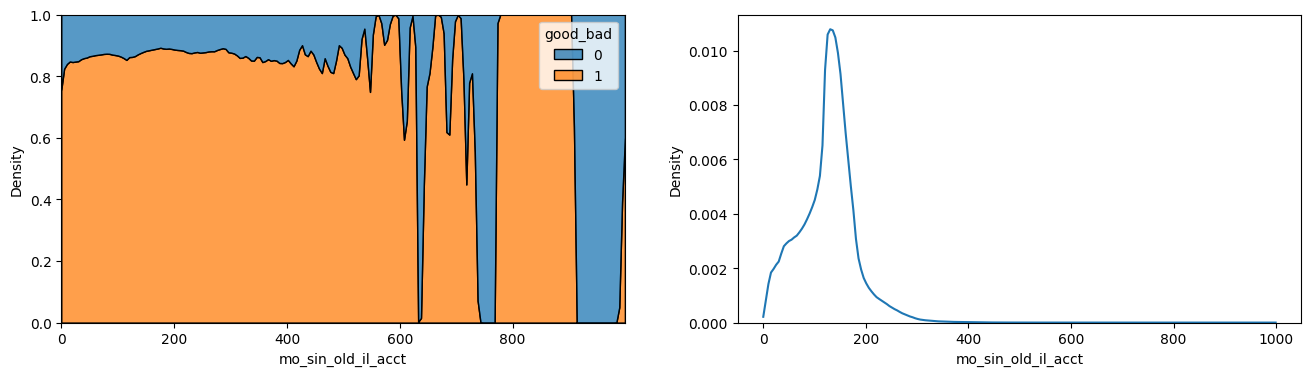




mo_sin_rcnt_rev_tl_op 

unique values: 354

null values: 70277

count    2.855215e+06
mean     1.446025e+01
std      1.801500e+01
min      0.000000e+00
25%      4.000000e+00
50%      9.000000e+00
75%      1.800000e+01
max      5.640000e+02
Name: mo_sin_rcnt_rev_tl_op, dtype: float64


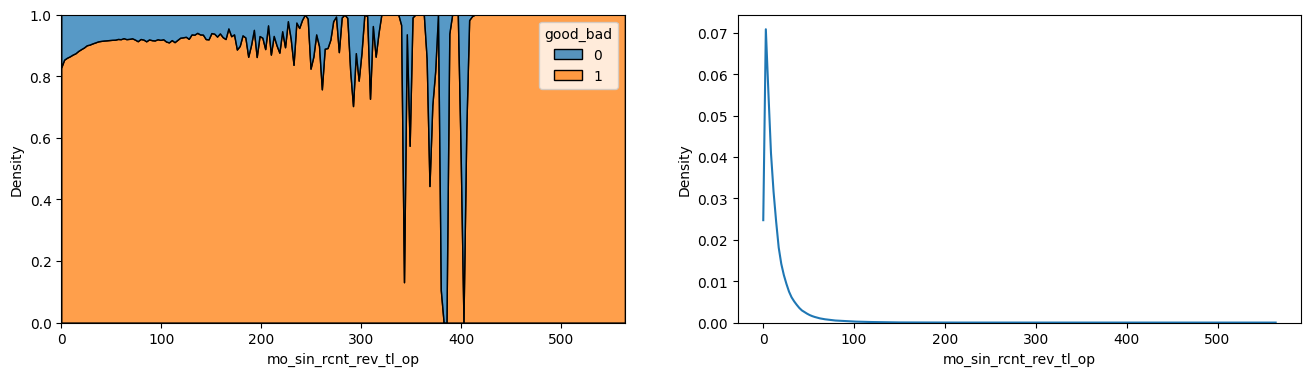




mo_sin_rcnt_tl 

unique values: 243

null values: 70276

count    2.855216e+06
mean     8.345006e+00
std      9.181665e+00
min      0.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      3.820000e+02
Name: mo_sin_rcnt_tl, dtype: float64


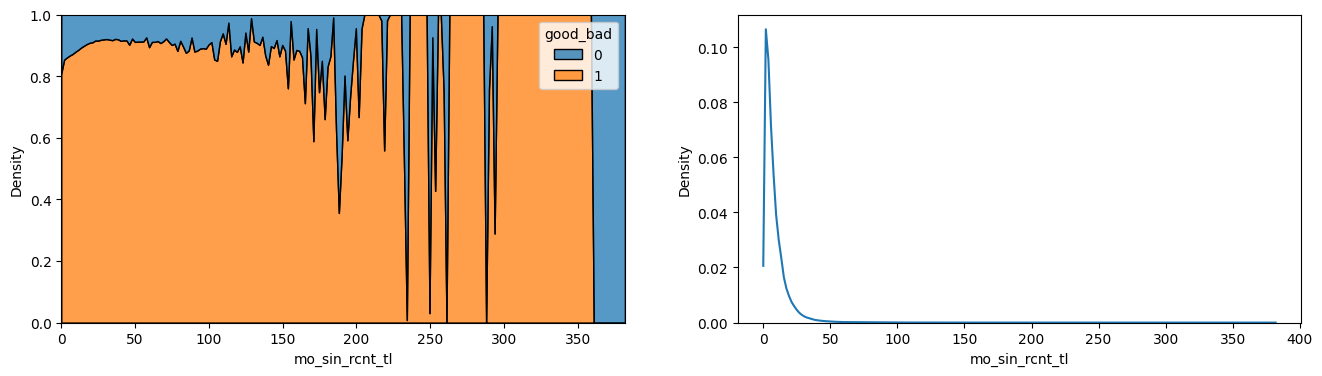




mort_acc 

unique values: 47

null values: 50030

count    2.875462e+06
mean     1.512336e+00
std      1.869776e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.400000e+01
Name: mort_acc, dtype: float64


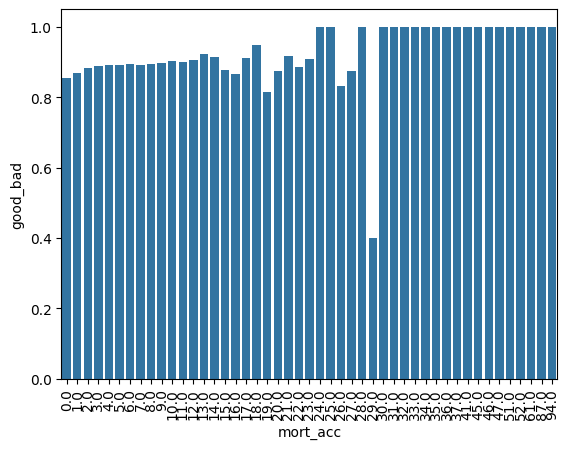




mths_since_recent_bc 

unique values: 570

null values: 80701

count    2.844791e+06
mean     2.506979e+01
std      3.262410e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.400000e+01
75%      3.000000e+01
max      6.750000e+02
Name: mths_since_recent_bc, dtype: float64


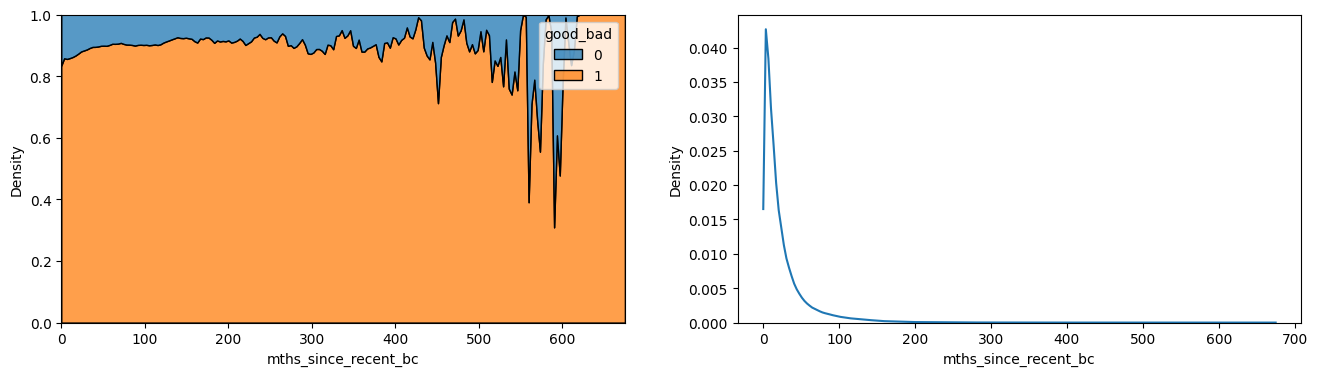




mths_since_recent_inq 

unique values: 26

null values: 371905

count    2.553587e+06
mean     7.108003e+00
std      5.982268e+00
min      0.000000e+00
25%      2.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      2.500000e+01
Name: mths_since_recent_inq, dtype: float64


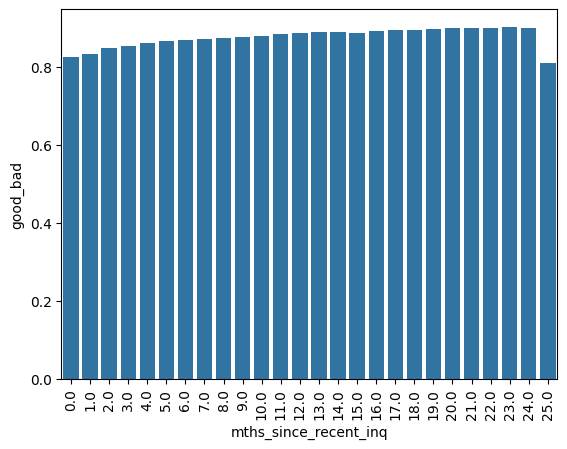




num_accts_ever_120_pd 

unique values: 48

null values: 70276

count    2.855216e+06
mean     4.880583e-01
std      1.356773e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.800000e+01
Name: num_accts_ever_120_pd, dtype: float64


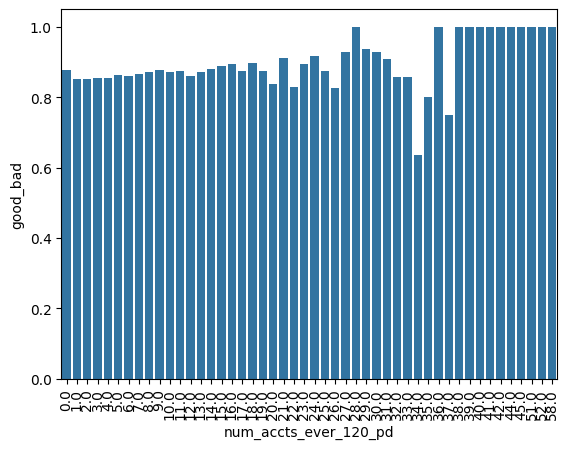




num_actv_bc_tl 

unique values: 43

null values: 70276

count    2.855216e+06
mean     3.706979e+00
std      2.372524e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      5.000000e+01
Name: num_actv_bc_tl, dtype: float64


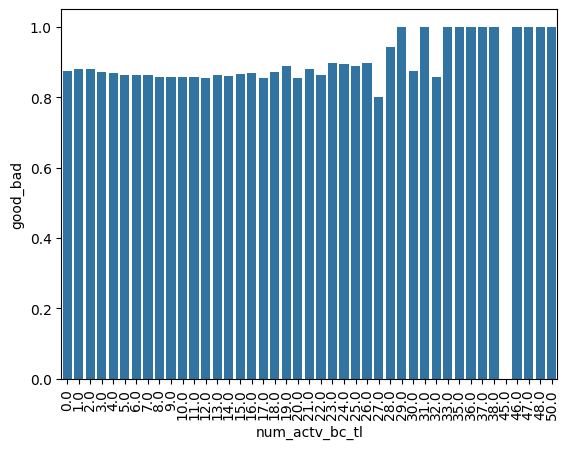




num_actv_rev_tl 

unique values: 60

null values: 70276

count    2.855216e+06
mean     5.607187e+00
std      3.408558e+00
min      0.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      7.000000e+00
max      7.200000e+01
Name: num_actv_rev_tl, dtype: float64


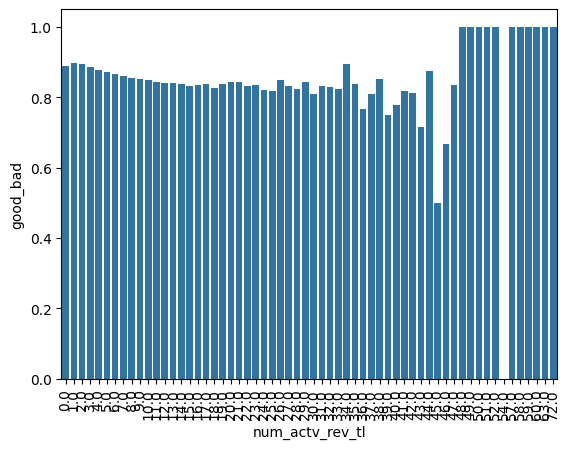




num_bc_sats 

unique values: 64

null values: 58590

count    2.866902e+06
mean     4.855647e+00
std      3.102196e+00
min      0.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      7.700000e+01
Name: num_bc_sats, dtype: float64


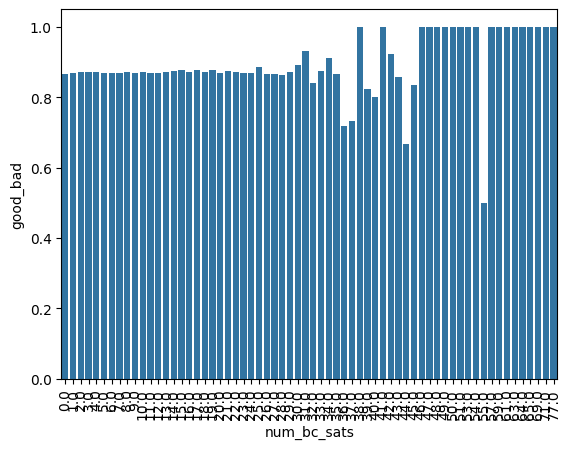




num_bc_tl 

unique values: 79

null values: 70276

count    2.855216e+06
mean     7.621204e+00
std      4.677292e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      8.900000e+01
Name: num_bc_tl, dtype: float64


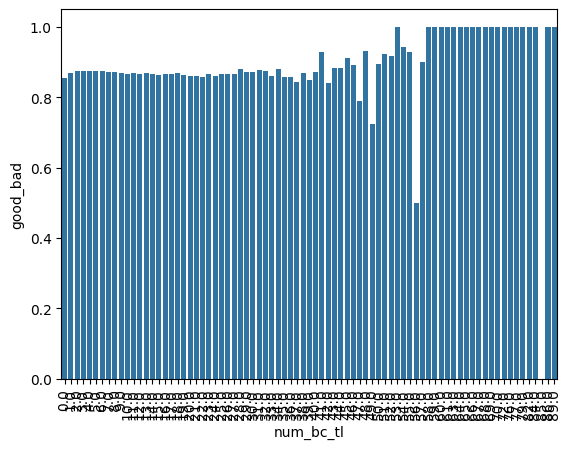




num_il_tl 

unique values: 124

null values: 70276

count    2.855216e+06
mean     8.531872e+00
std      7.417926e+00
min      0.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.100000e+01
max      1.590000e+02
Name: num_il_tl, dtype: float64


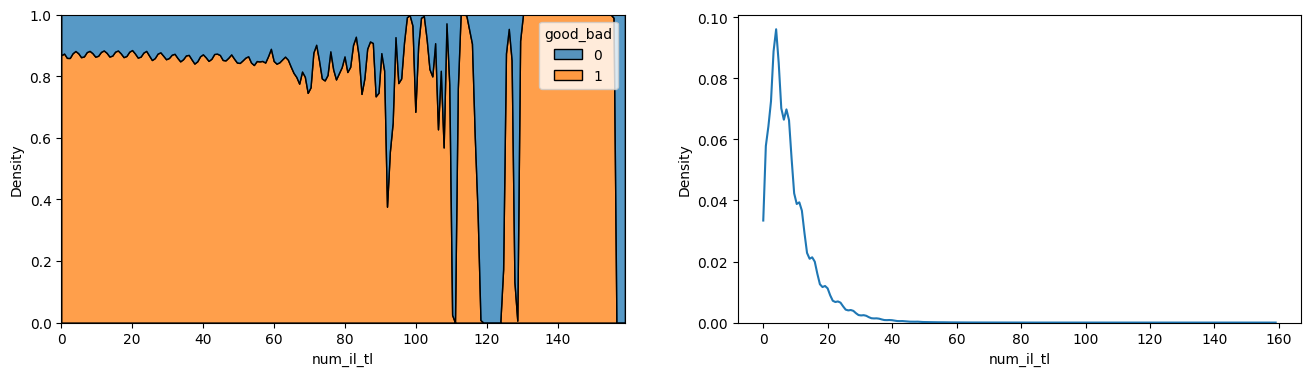




num_op_rev_tl 

unique values: 86

null values: 70276

count    2.855216e+06
mean     8.268738e+00
std      4.761260e+00
min      0.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      1.100000e+01
max      9.700000e+01
Name: num_op_rev_tl, dtype: float64


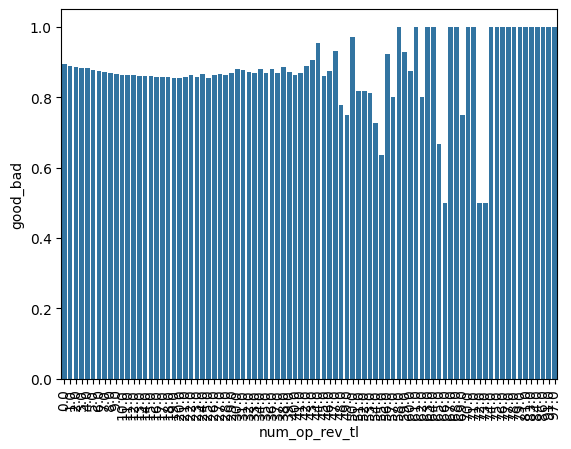




num_rev_accts 

unique values: 124

null values: 70277

count    2.855215e+06
mean     1.377991e+01
std      8.023411e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.200000e+01
75%      1.800000e+01
max      1.510000e+02
Name: num_rev_accts, dtype: float64


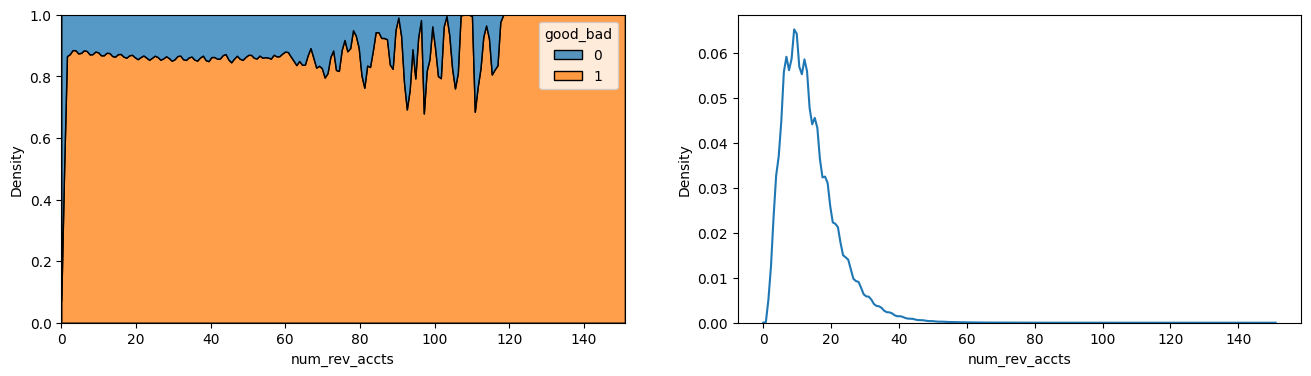




num_rev_tl_bal_gt_0 

unique values: 54

null values: 70276

count    2.855216e+06
mean     5.563515e+00
std      3.334873e+00
min      0.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      7.000000e+00
max      6.500000e+01
Name: num_rev_tl_bal_gt_0, dtype: float64


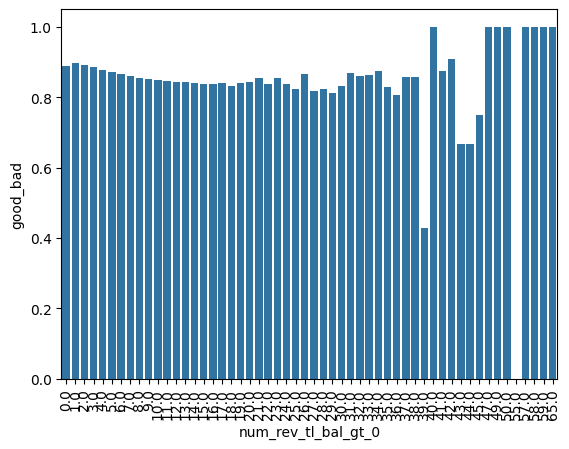




num_sats 

unique values: 92

null values: 58590

count    2.866902e+06
mean     1.168603e+01
std      5.736746e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.500000e+01
max      1.040000e+02
Name: num_sats, dtype: float64


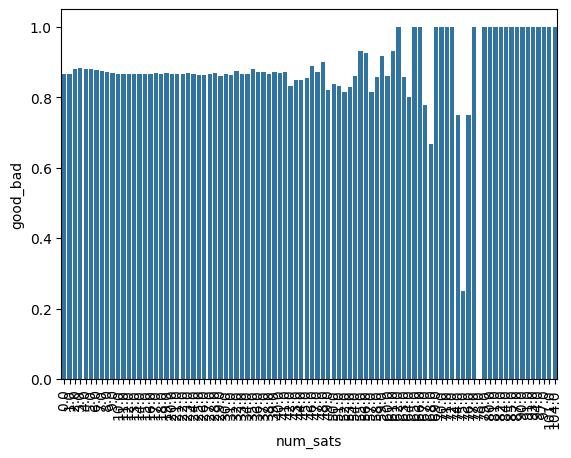




num_tl_120dpd_2m 

unique values: 7

null values: 161686

count    2.763806e+06
mean     4.902660e-04
std      2.376049e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.000000e+00
Name: num_tl_120dpd_2m, dtype: float64


   num_tl_120dpd_2m  good_bad
0               0.0  0.873572
1               1.0  0.816409
2               2.0  0.869565
3               3.0  0.600000
4               4.0  1.000000
5               6.0  0.000000
6               7.0  1.000000



num_tl_30dpd 

unique values: 5

null values: 70276

count    2.855216e+06
mean     2.172865e-03
std      4.935307e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.000000e+00
Name: num_tl_30dpd, dtype: float64


   num_tl_30dpd  good_bad
0           0.0  0.870936
1           1.0  0.818735
2           2.0  0.810277
3           3.0  0.758621
4           4.0  0.857143



num_tl_90g_dpd_24m 

unique values: 34

null values: 7

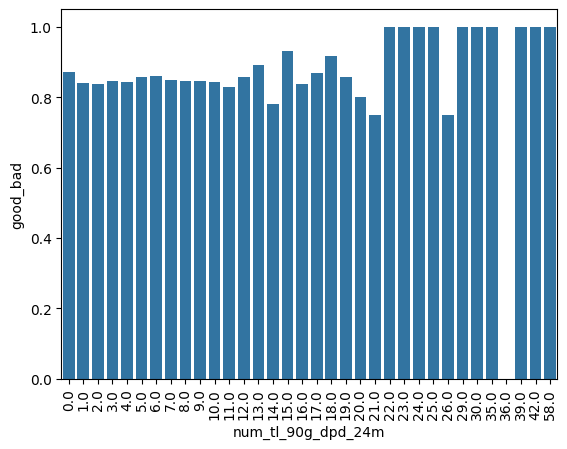




num_tl_op_past_12m 

unique values: 33

null values: 70276

count    2.855216e+06
mean     2.071412e+00
std      1.841830e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.200000e+01
Name: num_tl_op_past_12m, dtype: float64


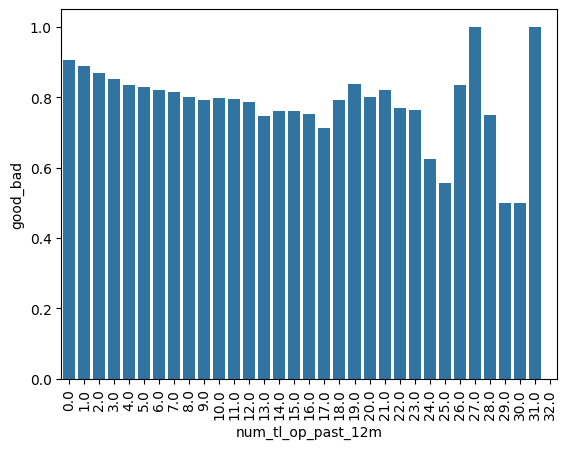




pct_tl_nvr_dlq 

unique values: 715

null values: 70431

count    2.855061e+06
mean     9.429818e+01
std      8.972040e+00
min      0.000000e+00
25%      9.170000e+01
50%      1.000000e+02
75%      1.000000e+02
max      1.000000e+02
Name: pct_tl_nvr_dlq, dtype: float64


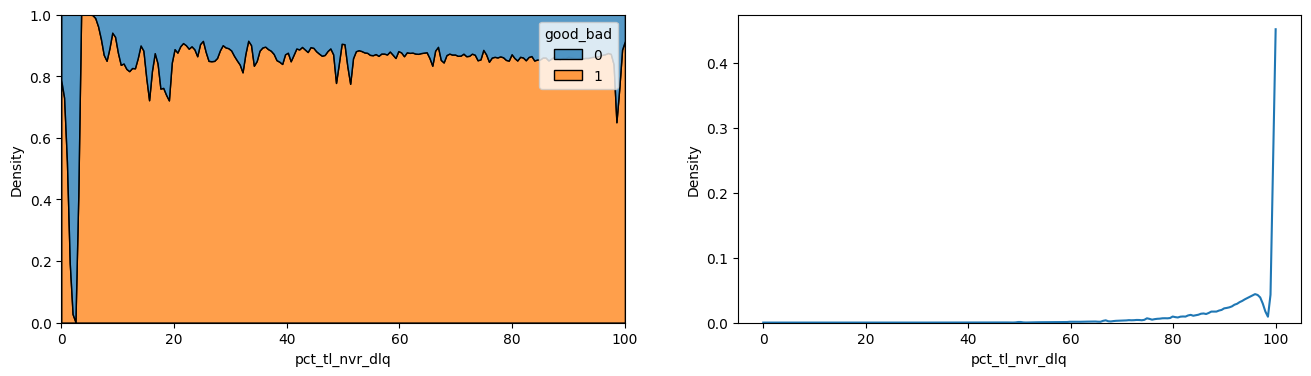




pub_rec_bankruptcies 

unique values: 12

null values: 1365

count    2.924127e+06
mean     1.226790e-01
std      3.531414e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.200000e+01
Name: pub_rec_bankruptcies, dtype: float64


    pub_rec_bankruptcies  good_bad
0                    0.0  0.874033
1                    1.0  0.843366
2                    2.0  0.788785
3                    3.0  0.800274
4                    4.0  0.748214
5                    5.0  0.776042
6                    6.0  0.704918
7                    7.0  0.680000
8                    8.0  0.600000
9                    9.0  0.666667
10                  11.0  0.000000
11                  12.0  1.000000



tax_liens 

unique values: 42

null values: 105

count    2.925387e+06
mean     3.614188e-02
std      3.324517e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.500000e+01
Name: tax_liens, dtype: float64


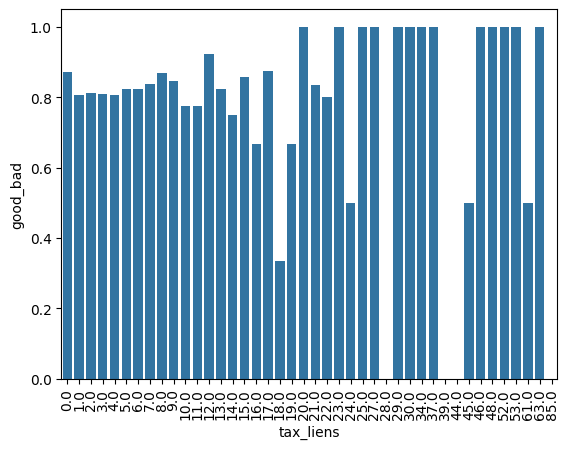




tot_hi_cred_lim 

unique values: 585991

null values: 70276

count    2.855216e+06
mean     1.832436e+05
std      1.852141e+05
min      0.000000e+00
25%      5.258600e+04
50%      1.181000e+05
75%      2.647752e+05
max      9.999999e+06
Name: tot_hi_cred_lim, dtype: float64


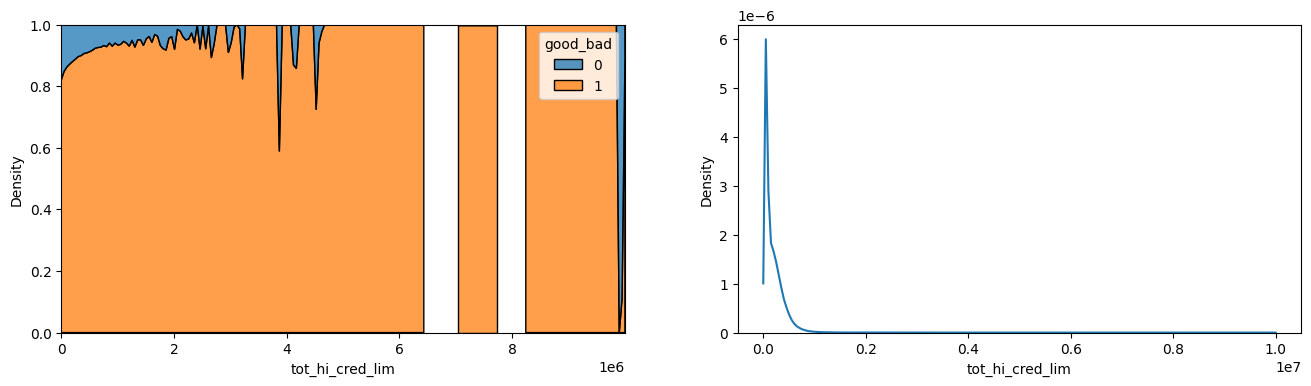




total_bc_limit 

unique values: 21009

null values: 50030

count    2.875462e+06
mean     2.476471e+04
std      2.436650e+04
min      0.000000e+00
25%      8.900000e+03
50%      1.750000e+04
75%      3.250000e+04
max      1.569000e+06
Name: total_bc_limit, dtype: float64


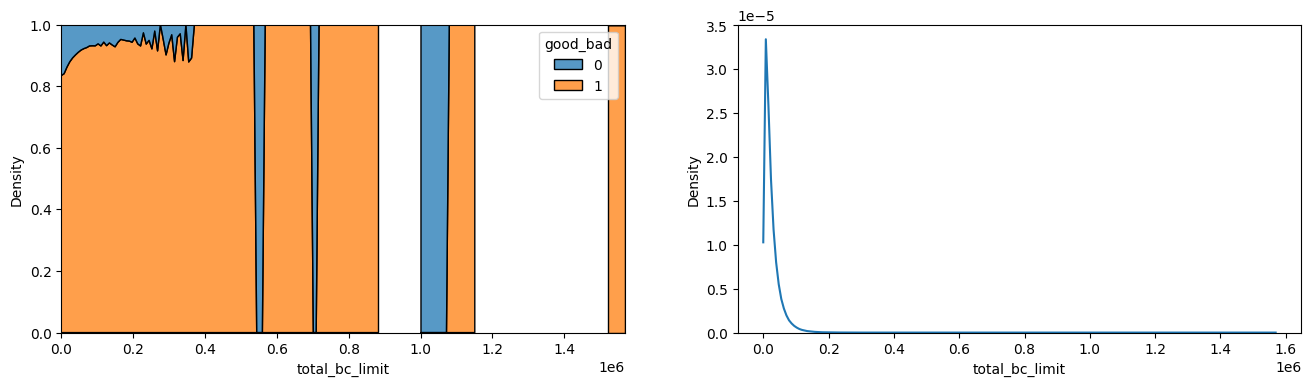




mnths_since_earliest_cr_line 

unique values: 777

null values: 29

count    2.925463e+06
mean     2.458225e+02
std      9.726803e+01
min      4.166667e+01
25%      1.806000e+02
50%      2.303333e+02
75%      2.973333e+02
max      1.068433e+03
Name: mnths_since_earliest_cr_line, dtype: float64


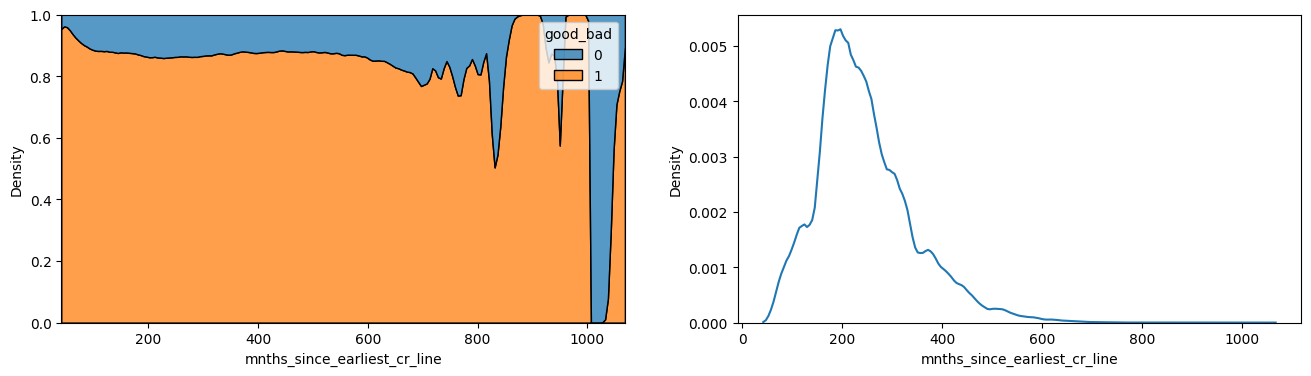




mnths_since_last_pymnt_d 

unique values: 157

null values: 4921

count    2.920571e+06
mean     2.626303e+01
std      2.222935e+01
min      3.333333e-02
25%      7.166667e+00
50%      1.936667e+01
75%      4.063333e+01
max      1.583333e+02
Name: mnths_since_last_pymnt_d, dtype: float64


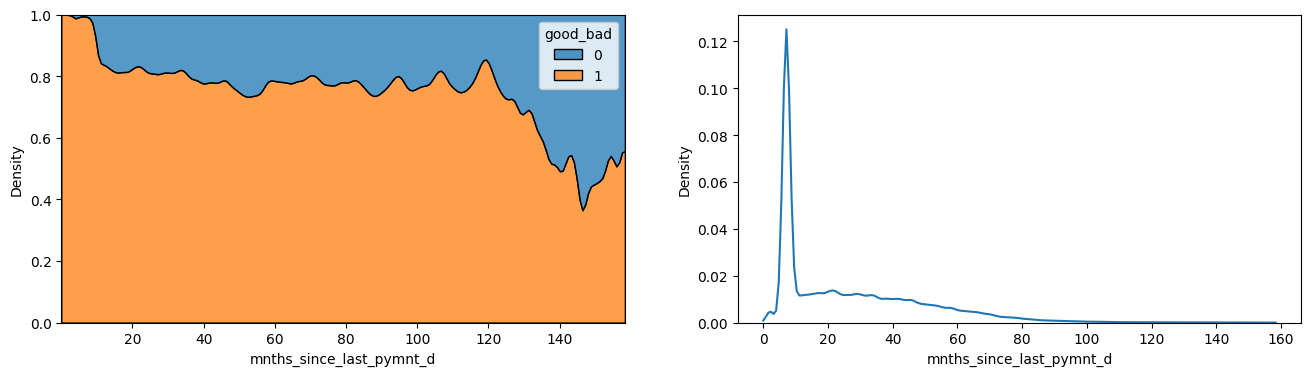




mnths_since_last_credit_pull_d 

unique values: 159

null values: 75

count    2.925417e+06
mean     1.531520e+01
std      1.451867e+01
min      2.066667e+00
25%      7.166667e+00
50%      7.166667e+00
75%      1.833333e+01
max      1.654667e+02
Name: mnths_since_last_credit_pull_d, dtype: float64


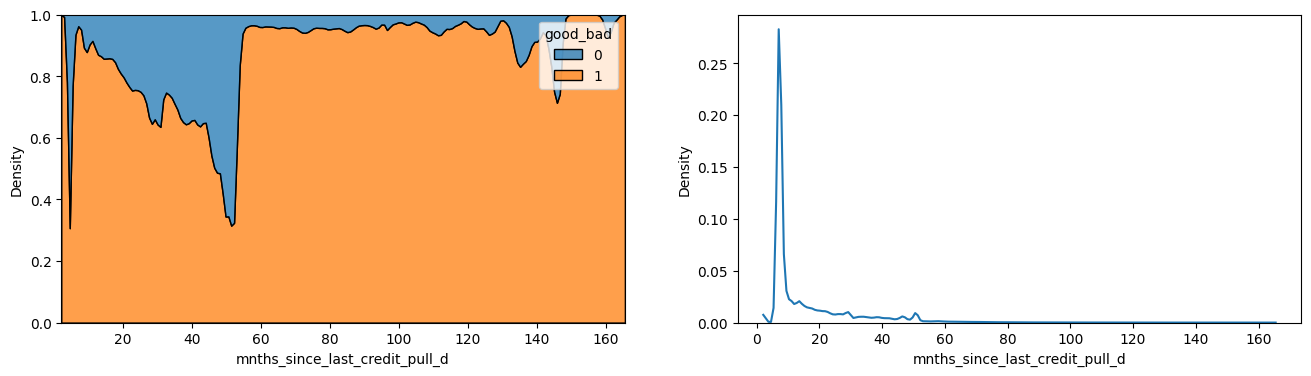

In [63]:
for col in loans.select_dtypes(numerics).columns.values:
    if col != "good_bad":
        print(f"{col} \n")
        print(f"unique values: {loans[col].nunique()}\n")
        print(f"null values: {loans[col].isnull().sum()}\n")
        print(loans[col].describe())
        if loans[col].nunique() <= 20 and col != "good_bad":
            print("\n")
            print(loans.groupby(col)["good_bad"].mean().reset_index())
        elif 20 < loans[col].nunique() <= 100:
            sns.barplot(data=loans.groupby(col)["good_bad"].mean().reset_index(), y="good_bad", x=col)
            plt.xticks(rotation=90)
        else:
            fig, ax = plt.subplots(1, 2, figsize=(16, 4))
            sns.kdeplot(data=loans, hue="good_bad", x=col, multiple="fill", ax=ax[0], cut=0)
            sns.kdeplot(data=loans, x=col, ax=ax[1], cut=0)
        plt.show()
        print("\n\n")

following columns needs to be further investigated with kdeplot and different range of values:

* `annual_inc` (less than 60 000)
* `revol_bal` (less than 30 000)
* `revol_util` (less than 200)
* `total_rec_late_fee` (less than 500)
* `last_pymnt_amnt` (0 - 600)
* `tot_coll_amt` (less than 300)
* `max_bal_bc` (less than 500)
* `total_rev_hi_lim` (less than 50 000)
* `delinq_amnt` (less than 50000)

In [64]:
kde_dict = {
    "annual_inc": 600000,
    "revol_bal": 300000,
    "revol_util": 2000,
    "total_rec_late_fee": 500,
    "tot_coll_amt": 30000,
    "total_rev_hi_lim": 600000,
    "delinq_amnt": 5000
}

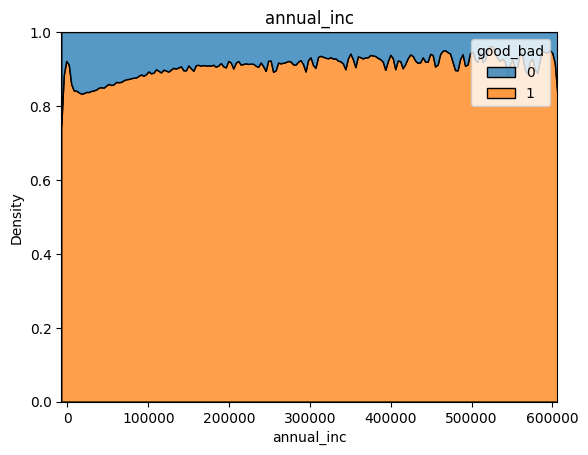

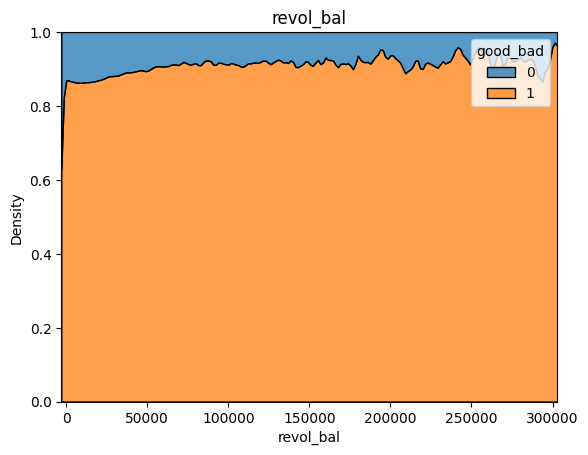

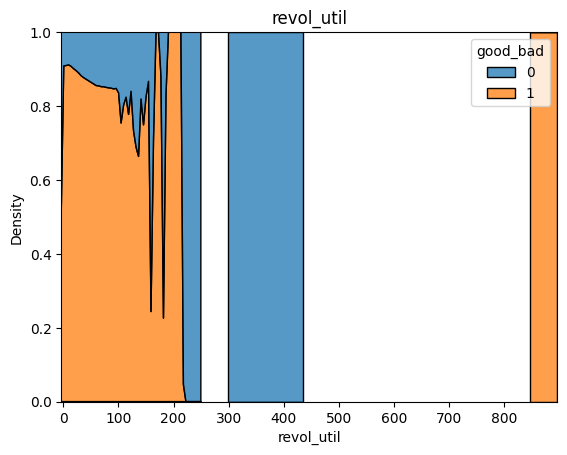

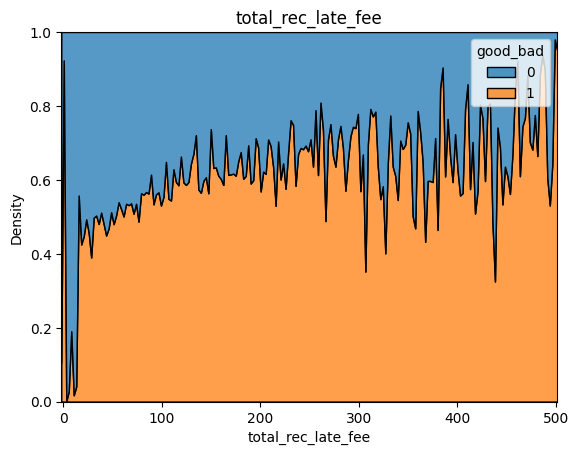

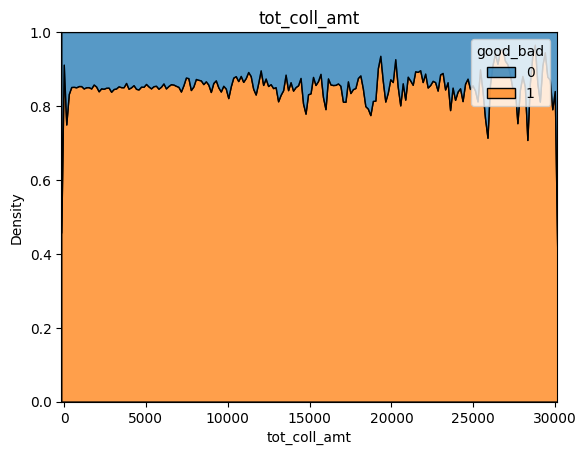

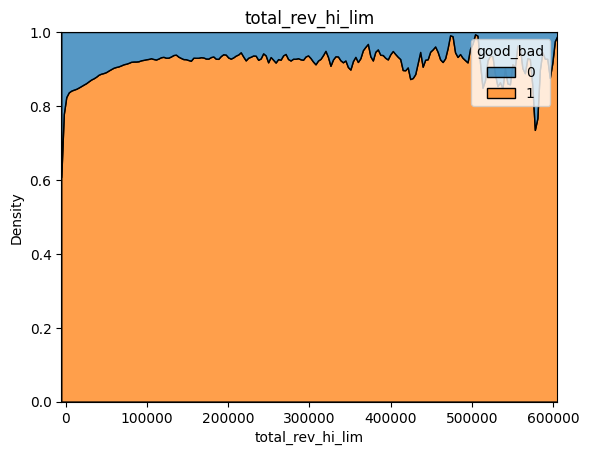

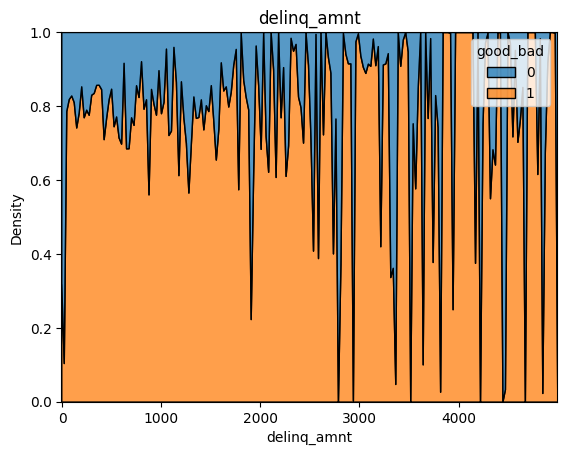

In [65]:
for cat in kde_dict.keys():
    sns.kdeplot(data=loans[loans[cat] < kde_dict[cat]], x=cat, hue="good_bad", multiple="fill")
    plt.title(cat)
    plt.show()

following columns will be dropped cause of lack of difference in distribution of good/bad borowers:

* `loan_amnt`
* `delinq_2yrs`
* `pub_rec`
* `total_acc`
* `open_act_il`
* `mths_since_rcnt_il`
* `total_cu_tl`
* `mo_sin_old_il_acct`
* `mo_sin_rcnt_tl`
* `mort_acc`
* `mths_since_recent_bc`
* `mths_since_recent_inq`
* `num_accts_ever_120_pd`
* `num_actv_bc_tl`
* `num_bc_sats`
* `num_actv_rev_tl`
* `num_bc_tl`
* `num_il_tl`
* `num_op_rev_tl`
* `num_rev_accts`
* `num_rev_tl_bal_gt_0`
* `num_sats`
* `num_tl_120dpd_2m`
* `num_tl_30dpd`
* `num_tl_90g_dpd_24m`
* `pct_tl_nvr_dlq`
* `tax_liens`
* `total_bc_limit`
* `mnths_since_earliest_cr_line`

following columns will be dropped from other reasons:

* `policy_code` (it consists of only 1 value)

following columns seems to have the same distribution, thus only one will be kept:

* `fico_range_low` and `fico_range_high` -> `fico_range_low`
* `out_prncp` and `out_prncp_inv` -> `out_prncp`
* `total_pymnt` and `total_pymnt_inv` -> `total_pymnt`
* `last_fico_range_high` and `last_fico_range_low` -> `last_fico_range_low`
* `open_il_12m` and `open_il_24m` -> `open_il_12m`
* `open_rv_12m` and `open_rv_24m` -> `open_rv_12m`

following columns can be significant in predicting probability of default:

* `int_rate`
* `dti`
* `fico_range_low`
* `inq_last_6mths`
* `out_prncp`
* `total_pymnt`
* `total_rec_prncp`
* `total_rec_int`
* `collections_12_mths_ex_med`
* `acc_now_delinq`
* `tot_cur_bal`
* `open_acc_6m`
* `open_il_12m`
* `total_bal_il`
* `il_util`
* `open_rv_12m`
* `all_util`
* `inq_fi`
* `inq_last_12m`
* `acc_open_past_24mths`
* `avg_cur_bal`
* `bc_open_to_buy`
* `bc_util`
* `chargeoff_within_12_mths`
* `num_tl_op_past_12m`
* `pub_rec_bankruptcies`
* `tot_hi_cred_lim`
* `total_bal_ex_mort`
* `total_il_high_credit_limit`
* `mnths_since_last_pymnt_d`
* `mnths_since_last_credit_pull_d`
* `mnths_since_issue_d`

following columns will have missing values filled with `amnt_funded` (those columns are associated with credit limits, thus we can assume that client's credit limit is at least equal to founded amount):

* `total_rev_hi_lim`
* `total_bc_limit`
* `tot_hi_cred_lim`
* `total_il_high_credit_limit`

following columns will be dropped:

* `policy_code` -> only one value
* `avg_cur_bal` -> `total_cur_bal` seems to be more important
* `mths_since_recent_inq`, `percent_bc_gt_75 `, `bc_util`, `mo_sin_old_il_acct`, `total_bal_ex_mort` -> a lot of missing values and/or distribution, based on which it is difficult to say what to replace the missing data with
* `acc_now_delinq`, `num_tl_120dpd_2m`, `num_tl_30dpd` -> only one value that is not underrepresented

and rest of the variables will have missing values replaced with median of the given column.

In [67]:
num_drop_cols = [
    "emp_length",
    "loan_amnt",
    "delinq_2yrs",
    "pub_rec",
    "total_acc",
    "open_act_il",
    "mths_since_rcnt_il",
    "total_cu_tl",
    "mo_sin_old_il_acct",
    "mo_sin_rcnt_tl",
    "mort_acc",
    "mort_acc",
    "mths_since_recent_bc",
    "mths_since_recent_inq",
    "num_accts_ever_120_pd",
    "num_actv_bc_tl",
    "num_bc_tl",
    "num_il_tl",
    "num_op_rev_tl",
    "num_rev_accts",
    "num_rev_tl_bal_gt_0",
    "num_sats",
    "num_tl_120dpd_2m",
    "num_tl_30dpd",
    "num_tl_90g_dpd_24m",
    "pct_tl_nvr_dlq",
    "tax_liens",
    "total_bc_limit",
    "mnths_since_earliest_cr_line",
    "il_util",
    "all_util",
    "num_actv_rev_tl",
    "num_bc_sats",
    "policy_code"
]

In [68]:
num_mean_cols = [
    "annual_inc",
    "dti",
    "revol_util",
    "tot_coll_amt",
    "total_bal_il",
    "max_bal_bc",
    "delinq_amnt",
    "mo_sin_rcnt_rev_tl_op",
    "mnths_since_last_pymnt_d"
]

In [69]:
num_fund_cols = [
    "tot_coll_amt",
    "total_bal_il",
    "max_bal_bc",
    "avg_cur_bal",
    "tot_hi_cred_lim",
    "total_rev_hi_lim"
]

In [70]:
num_med_cols = [
    "inq_last_6mths",
    "collections_12_mths_ex_med",
    "open_il_12m",
    "chargeoff_within_12_mths",
    "pub_rec_bankruptcies",
    "mnths_since_last_credit_pull_d"
]

In [71]:
num_miss_cat = [
    "acc_now_delinq",
    "open_acc_6m",
    "open_il_24m",
    "open_rv_12m",
    "open_rv_24m",
    "inq_fi",
    "inq_last_12m",
    "acc_open_past_24mths",
    "num_tl_op_past_12m"
]

In [72]:
for col in num_drop_cols:
    print(f"{col}:\n")
    print(f"data: {round(loans[~pd.isna(loans[col])]["good_bad"].mean(), 2)}")
    print(f"NaN: {round(loans[pd.isna(loans[col])]["good_bad"].mean(), 2)} \n")

emp_length:

data: 0.87
NaN: 0.84 

loan_amnt:

data: 0.87
NaN: nan 

delinq_2yrs:

data: 0.87
NaN: 0.9 

pub_rec:

data: 0.87
NaN: 0.9 

total_acc:

data: 0.87
NaN: 0.9 

open_act_il:

data: 0.89
NaN: 0.82 

mths_since_rcnt_il:

data: 0.89
NaN: 0.83 

total_cu_tl:

data: 0.89
NaN: 0.82 

mo_sin_old_il_acct:

data: 0.87
NaN: 0.85 

mo_sin_rcnt_tl:

data: 0.87
NaN: 0.84 

mort_acc:

data: 0.87
NaN: 0.85 

mort_acc:

data: 0.87
NaN: 0.85 

mths_since_recent_bc:

data: 0.87
NaN: 0.85 

mths_since_recent_inq:

data: 0.87
NaN: 0.9 

num_accts_ever_120_pd:

data: 0.87
NaN: 0.84 

num_actv_bc_tl:

data: 0.87
NaN: 0.84 

num_bc_tl:

data: 0.87
NaN: 0.84 

num_il_tl:

data: 0.87
NaN: 0.84 

num_op_rev_tl:

data: 0.87
NaN: 0.84 

num_rev_accts:

data: 0.87
NaN: 0.84 

num_rev_tl_bal_gt_0:

data: 0.87
NaN: 0.84 

num_sats:

data: 0.87
NaN: 0.85 

num_tl_120dpd_2m:

data: 0.87
NaN: 0.81 

num_tl_30dpd:

data: 0.87
NaN: 0.84 

num_tl_90g_dpd_24m:

data: 0.87
NaN: 0.84 

pct_tl_nvr_dlq:

data: 0.87


In [73]:
for col in num_mean_cols:
    loans[col].fillna(loans[col].mean(), inplace=True)

In [74]:
for col in num_med_cols:
    loans[col].fillna(loans[col].median(), inplace=True)

In [75]:
for col in num_fund_cols:
    loans[col].fillna(loans["loan_amnt"], inplace=True)

In [76]:
loans.drop(columns=num_drop_cols, inplace=True)

In [77]:
loans[loans.select_dtypes(numerics).columns.values].isnull().sum()

term                                   0
int_rate                               0
annual_inc                             0
good_bad                               0
dti                                    0
fico_range_low                         0
inq_last_6mths                         0
revol_bal                              0
revol_util                             0
out_prncp                              0
total_pymnt                            0
total_rec_prncp                        0
total_rec_int                          0
total_rec_late_fee                     0
recoveries                             0
last_pymnt_amnt                        0
last_fico_range_low                    0
collections_12_mths_ex_med             0
acc_now_delinq                        29
tot_coll_amt                           0
open_acc_6m                       866130
open_il_12m                            0
open_il_24m                       866129
total_bal_il                           0
open_rv_12m     

Graph `last_pymnt_amnt` had pretty strange distribution, because some of the values were negative. Let's investigate it

In [78]:
loans[loans["last_pymnt_amnt"] < 0]["last_pymnt_amnt"].count()

87

In [79]:
loans[loans["last_pymnt_amnt"] < 0]["last_pymnt_amnt"].head()

id
118213984    -815.85
117893090   -1189.96
116596845   -2042.98
113000245    -595.21
113090772   -1289.38
Name: last_pymnt_amnt, dtype: float64

I guess it's just a mistake, and those values should be positive. There is no information about weather those negative values could be, for example, bank refunding an overpayment

In [80]:
loans["last_pymnt_amnt"] = loans["last_pymnt_amnt"].abs()

In [81]:
loans[loans["last_pymnt_amnt"] < 0]["last_pymnt_amnt"].count()

0

#### **Object variables**

grade 

unique values: 7

null values: 0

count     2925492
unique          7
top             B
freq       857573
Name: grade, dtype: object


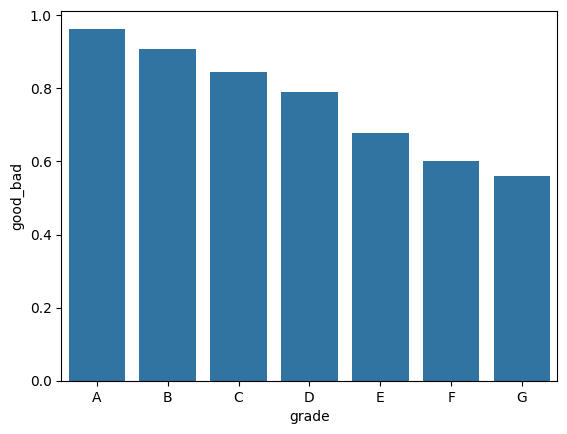




sub_grade 

unique values: 35

null values: 0

count     2925492
unique         35
top            B4
freq       185188
Name: sub_grade, dtype: object


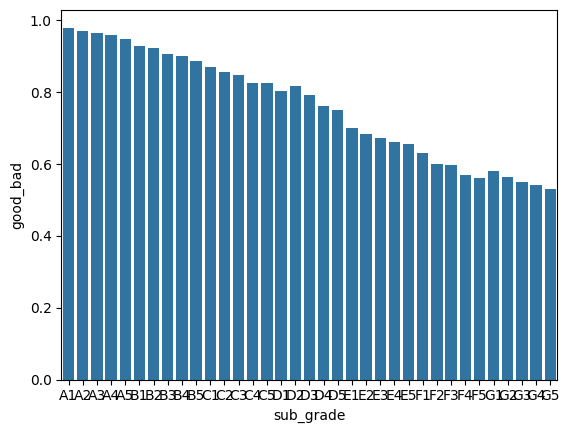




emp_title 

unique values: 470081

null values: 264086

count     2661406
unique     470081
top       teacher
freq        62223
Name: emp_title, dtype: object
                               emp_title  gb_prop
0                                             1.0
295630                          pantusos      1.0
295643                 papa john's pizza      1.0
295642   papa john's international, inc.      1.0
295641                       papa john's      1.0
295639                         papa gino      1.0
295638              papa architect  p.c.      1.0
295637                    pap specialist      1.0
295636                             paoms      1.0
295635  paoli and phoenixville hospitals      1.0



home_ownership 

unique values: 6

null values: 0

count      2925492
unique           6
top       mortgage
freq       1437859
Name: home_ownership, dtype: object


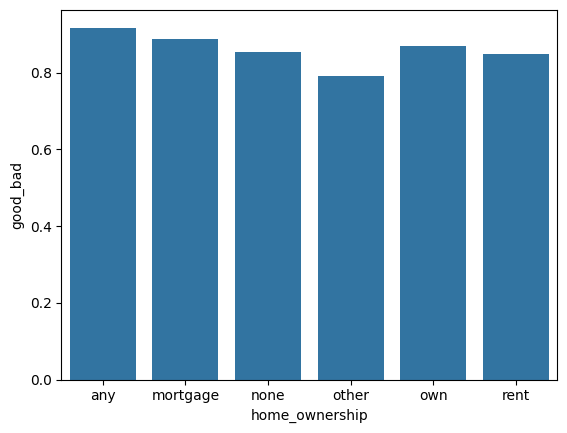




verification_status 

unique values: 3

null values: 0

count             2925492
unique                  3
top       source verified
freq              1143247
Name: verification_status, dtype: object


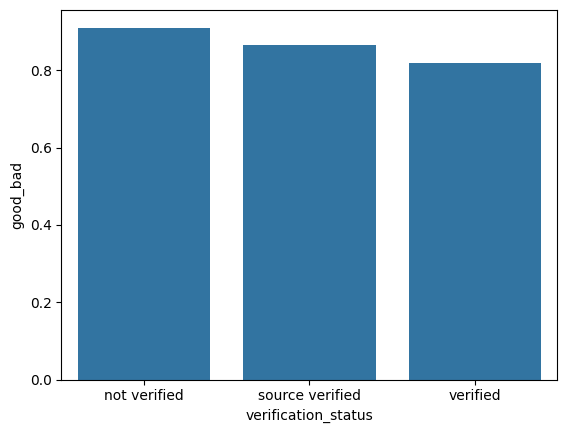




purpose 

unique values: 14

null values: 0

count                2925492
unique                    14
top       debt_consolidation
freq                 1638058
Name: purpose, dtype: object


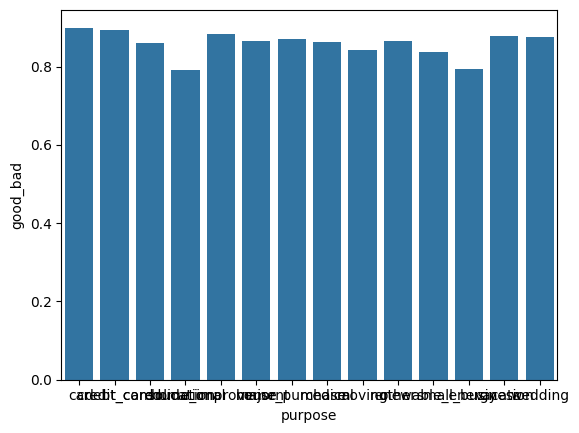




addr_state 

unique values: 51

null values: 0

count     2925492
unique         51
top            ca
freq       404686
Name: addr_state, dtype: object
   addr_state   gb_prop
21         me  0.930987
46         vt  0.916872
49         wv  0.916057
13         id  0.914625
37         or  0.905588
7          dc  0.904783
30         nh  0.901513
40         sc  0.898928
28         nd  0.895407
47         wa  0.894849



initial_list_status 

unique values: 2

null values: 0

count     2925492
unique          2
top             w
freq      2139434
Name: initial_list_status, dtype: object


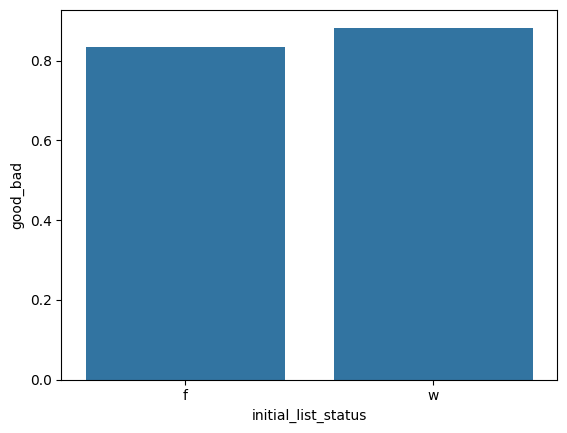




application_type 

unique values: 2

null values: 0

count        2925492
unique             2
top       individual
freq         2714979
Name: application_type, dtype: object


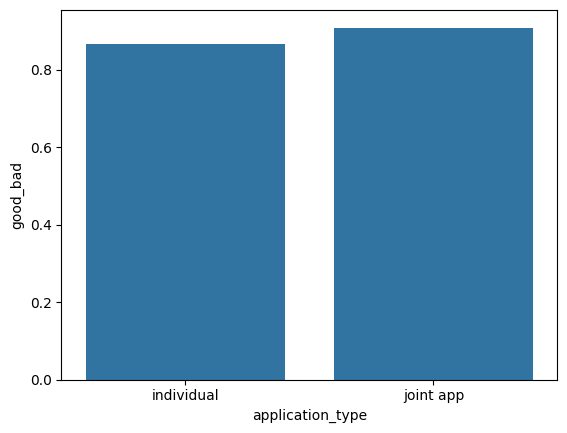




hardship_flag 

unique values: 2

null values: 38435

count     2887057
unique          2
top             n
freq      2765510
Name: hardship_flag, dtype: object


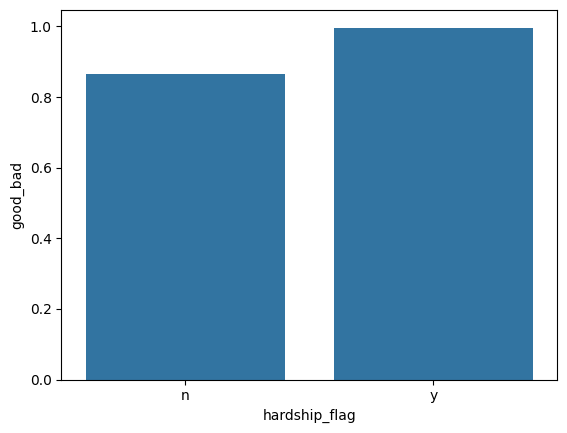




debt_settlement_flag 

unique values: 2

null values: 0

count     2925492
unique          2
top             n
freq      2874021
Name: debt_settlement_flag, dtype: object


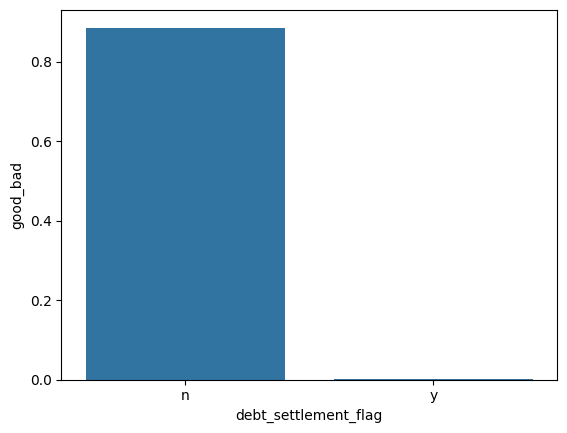

In [82]:
for col in loans.select_dtypes("object").columns.values:
    print(f"{col} \n")
    print(f"unique values: {loans[col].nunique()}\n")
    print(f"null values: {loans[col].isnull().sum()}\n")
    print(loans[col].describe())
    if loans[col].nunique() <= 50:
        sns.barplot(data=loans.groupby(col)["good_bad"].mean().reset_index(), x=col, y="good_bad")
    else:
        print(loans.groupby(col)["good_bad"].mean().reset_index(name="gb_prop").sort_values("gb_prop", ascending=False).head(10))
    plt.show()
    print("\n\n")

In [83]:
loans[pd.isna(loans["hardship_flag"])]["good_bad"].mean()

0.8095746064784701

In [84]:
loans["hardship_flag"].fillna("missing", inplace=True)

Only `hardship_flag` column has null values from object type columns and its missing values will be filled with "n":

The only column that wasn't visualized is `emp_title`, because it consists of huge number of different values

In [85]:
loans.drop(columns=["emp_title"], inplace=True)

In [86]:
loans.rename(columns={"fico_range_low": "fico_range"}, inplace=True)

In [87]:
loans.drop(columns="sub_grade", inplace=True)

In [88]:
loans.isnull().sum()

term                                   0
int_rate                               0
grade                                  0
home_ownership                         0
annual_inc                             0
verification_status                    0
good_bad                               0
purpose                                0
addr_state                             0
dti                                    0
fico_range                             0
inq_last_6mths                         0
revol_bal                              0
revol_util                             0
initial_list_status                    0
out_prncp                              0
total_pymnt                            0
total_rec_prncp                        0
total_rec_int                          0
total_rec_late_fee                     0
recoveries                             0
last_pymnt_amnt                        0
last_fico_range_low                    0
collections_12_mths_ex_med             0
application_type

In [89]:
for col in num_miss_cat:
    loans[col].fillna(loans[col].median(), inplace=True)

In [90]:
loans.isnull().sum()

term                              0
int_rate                          0
grade                             0
home_ownership                    0
annual_inc                        0
verification_status               0
good_bad                          0
purpose                           0
addr_state                        0
dti                               0
fico_range                        0
inq_last_6mths                    0
revol_bal                         0
revol_util                        0
initial_list_status               0
out_prncp                         0
total_pymnt                       0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
last_pymnt_amnt                   0
last_fico_range_low               0
collections_12_mths_ex_med        0
application_type                  0
acc_now_delinq                    0
tot_coll_amt                      0
open_acc_6m                 

## **4 Data preparation for modelling**

### **4.1 Splitting data to train and test data**

In [91]:
cat_cols = loans.select_dtypes("object").columns.values

In [92]:
cont_small_cols = [
    num_col for num_col in loans.select_dtypes(numerics).columns.values if (loans[num_col].nunique() <= 50) and (num_col != "good_bad")
]

In [93]:
cont_big_cols = [
    "int_rate", "revol_util", "total_pymnt", "total_rec_prncp", "mnths_since_last_pymnt_d", "annual_inc"
]

In [94]:
loans_dummies = [
    pd.get_dummies(loans[col], prefix=col, prefix_sep=":") for col in cat_cols
]

In [95]:
loans_dummies = pd.concat(loans_dummies, axis=1)

In [96]:
loans = pd.concat([loans, loans_dummies], axis=1)

In [97]:
loans.columns.values

array(['term', 'int_rate', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'good_bad', 'purpose', 'addr_state', 'dti',
       'fico_range', 'inq_last_6mths', 'revol_bal', 'revol_util',
       'initial_list_status', 'out_prncp', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'open_acc_6m', 'open_il_12m', 'open_il_24m',
       'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'total_rev_hi_lim', 'inq_fi', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mo_sin_rcnt_rev_tl_op', 'num_tl_op_past_12m',
       'pub_rec_bankruptcies', 'tot_hi_cred_lim', 'hardship_flag',
       'debt_settlement_flag', 'mnths_since_last_pymnt_d',
       'mnths_since_last_credit_pull_d', 'grade:A', 'grade:B', 'grade:C',


In [98]:
loans_inputs_train, loans_inputs_test, loans_targets_train, loans_targets_test = train_test_split(loans.drop("good_bad", axis=1), loans["good_bad"], test_size=0.2, random_state=12)

In [99]:
inputs_prep = loans_inputs_train
targets_prep = loans_targets_train

In [ ]:
#inputs_prep = loans_inputs_test
#targets_prep = loans_targets_test

### **4.2 Calculating weights of evidence and information value for each category**

In [100]:
dummies_list = []

In [101]:
def woe_discrete(inputs, discrete_variable_name, gb_col_name, gb_variable):
    df = pd.concat([inputs[discrete_variable_name], gb_variable], axis=1)
    df = (df.groupby(discrete_variable_name)[gb_col_name]
             .agg(["count", "mean"])
             .reset_index()
             .rename(columns={"count": "n_obs", "mean": "prop_good"})
    )
    df["prop_n_obs"] = df["n_obs"] / df["n_obs"].sum()
    df["n_good"] = df["prop_good"] * df["n_obs"]
    df["n_bad"] = (1 - df["prop_good"]) * df["n_obs"]
    df["prop_n_good"] = df["n_good"] / df["n_good"].sum()
    df["prop_n_bad"] = df["n_bad"] / df["n_bad"].sum()
    df["WoE"] = np.log(df["prop_n_good"] / df["prop_n_bad"])
    df["IV"] = (df["prop_n_good"] - df["prop_n_bad"]) * df["WoE"]
    df["IV"] = df["IV"].sum()
    df.sort_values("WoE", inplace=True)

    return df

In [102]:
def plot_by_woe(df_woe, woe_col_name, x_rot = 0):
    with sns.axes_style("darkgrid"):
        x = np.array(df_woe.iloc[:, 0].apply(str))
        y = df_woe[woe_col_name]
        plt.figure(figsize=(14, 6))
        plt.plot(x, y, linestyle="--", marker="o")
        plt.xlabel(df_woe.columns[0])
        plt.ylabel("Weight of Evidence")
        plt.title(f"Weight of Evidence by {df_woe.columns[0]}")
        plt.xticks(rotation = x_rot)
        plt.show()

  grade  prop_n_obs   WoE        IV
6     G       0.415 -1.65  0.521611
5     F       1.422 -1.51  0.521611
4     E       4.742 -1.16  0.521611
3     D      14.226 -0.57  0.521611
2     C      27.452 -0.20  0.521611
1     B      29.313  0.40  0.521611
0     A      22.429  1.36  0.521611


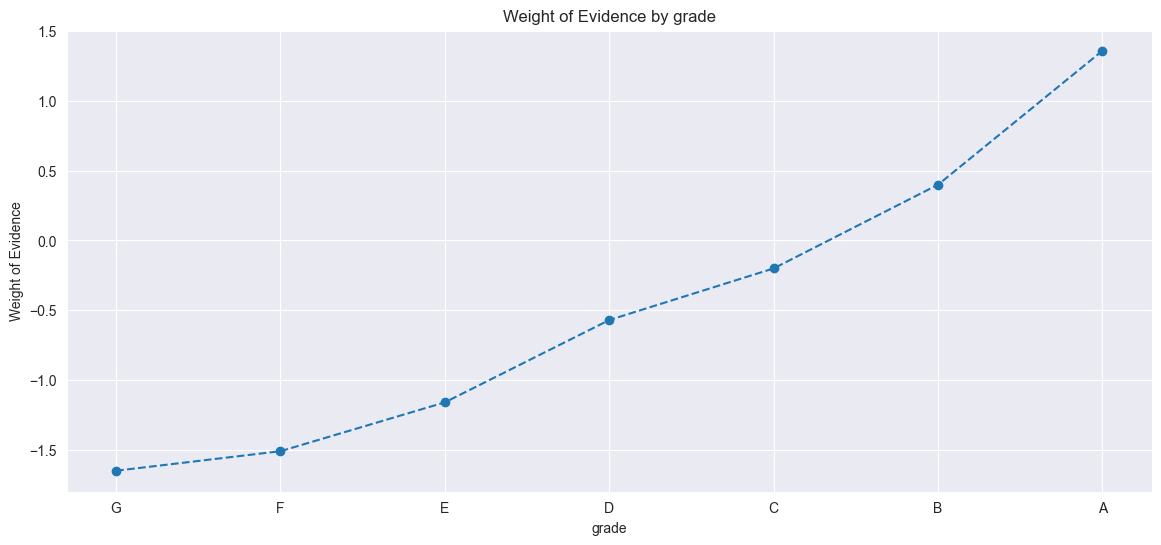

  home_ownership  prop_n_obs   WoE       IV
3          other       0.006 -0.50  0.02567
5           rent      39.405 -0.18  0.02567
2           none       0.002 -0.11  0.02567
4            own      11.326 -0.01  0.02567
1       mortgage      49.139  0.16  0.02567
0            any       0.122  0.46  0.02567


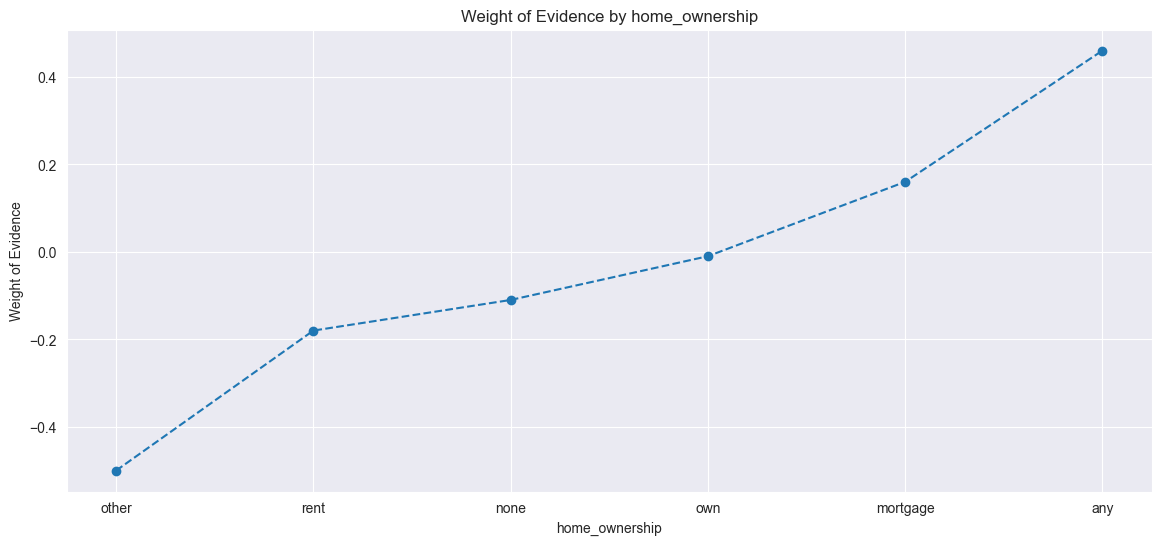

  verification_status  prop_n_obs   WoE        IV
2            verified      24.506 -0.39  0.097798
1     source verified      39.064 -0.05  0.097798
0        not verified      36.429  0.41  0.097798


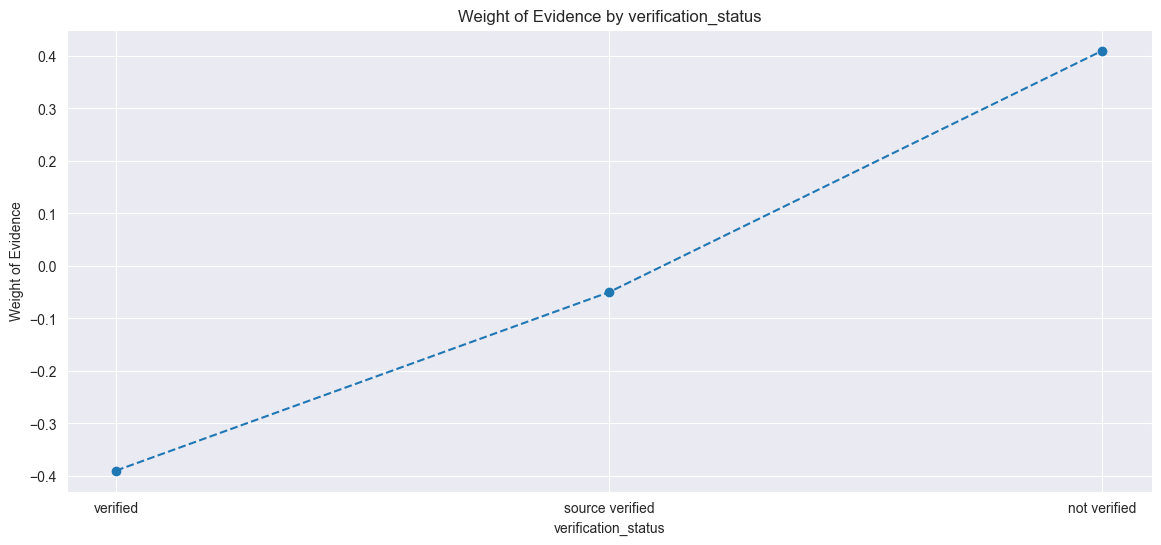

               purpose  prop_n_obs   WoE        IV
3          educational       0.015 -0.55  0.022668
11      small_business       1.030 -0.54  0.022668
10    renewable_energy       0.060 -0.27  0.022668
8               moving       0.659 -0.24  0.022668
2   debt_consolidation      55.991 -0.09  0.022668
7              medical       1.207 -0.06  0.022668
5                house       0.666 -0.05  0.022668
9                other       6.059 -0.04  0.022668
6       major_purchase       2.142  0.01  0.022668
12            vacation       0.689  0.05  0.022668
13             wedding       0.082  0.07  0.022668
4     home_improvement       6.594  0.13  0.022668
1          credit_card      23.788  0.23  0.022668
0                  car       1.019  0.29  0.022668


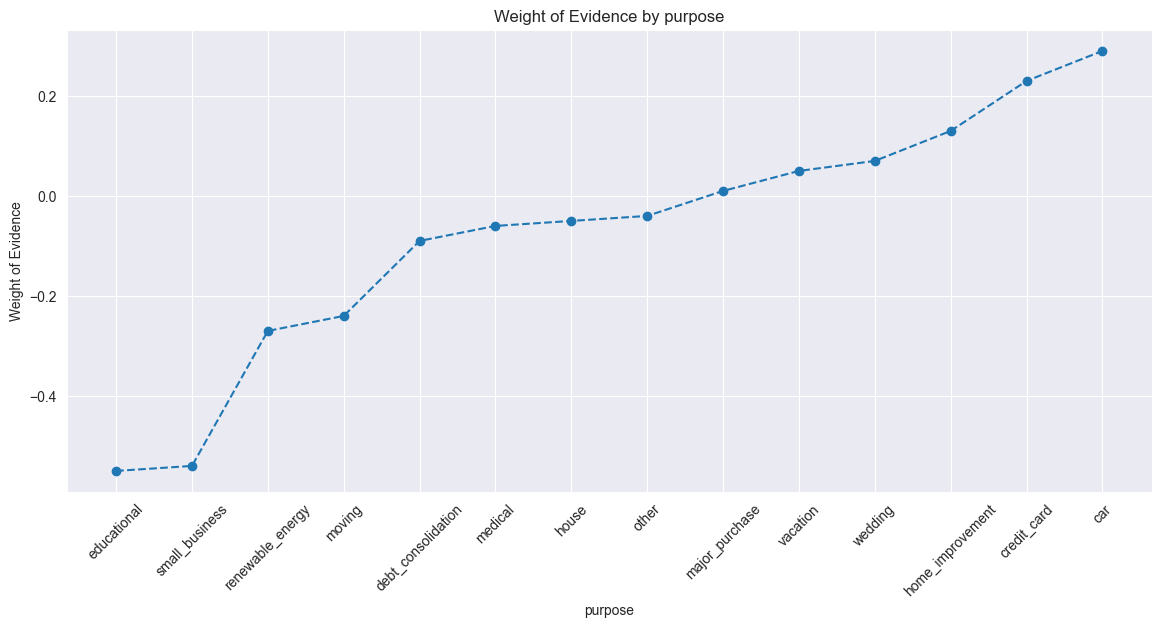

   addr_state  prop_n_obs   WoE        IV
12         ia       0.000 -0.40  0.014369
2          ar       0.759 -0.23  0.014369
25         ms       0.573 -0.22  0.014369
1          al       1.182 -0.20  0.014369
36         ok       0.917 -0.18  0.014369
33         nv       1.450 -0.16  0.014369
18         la       1.116 -0.14  0.014369
34         ny       8.100 -0.12  0.014369
9          fl       7.253 -0.10  0.014369
11         hi       0.461 -0.09  0.014369
32         nm       0.531 -0.06  0.014369
41         sd       0.202 -0.06  0.014369
20         md       2.377 -0.06  0.014369
38         pa       3.350 -0.04  0.014369
15         in       1.664 -0.04  0.014369
24         mo       1.598 -0.04  0.014369
4          ca      13.840 -0.03  0.014369
27         nc       2.781 -0.03  0.014369
31         nj       3.653 -0.03  0.014369
42         tn       1.602 -0.01  0.014369
23         mn       1.732  0.00  0.014369
22         mi       2.575  0.00  0.014369
45         va       2.762  0.01  0

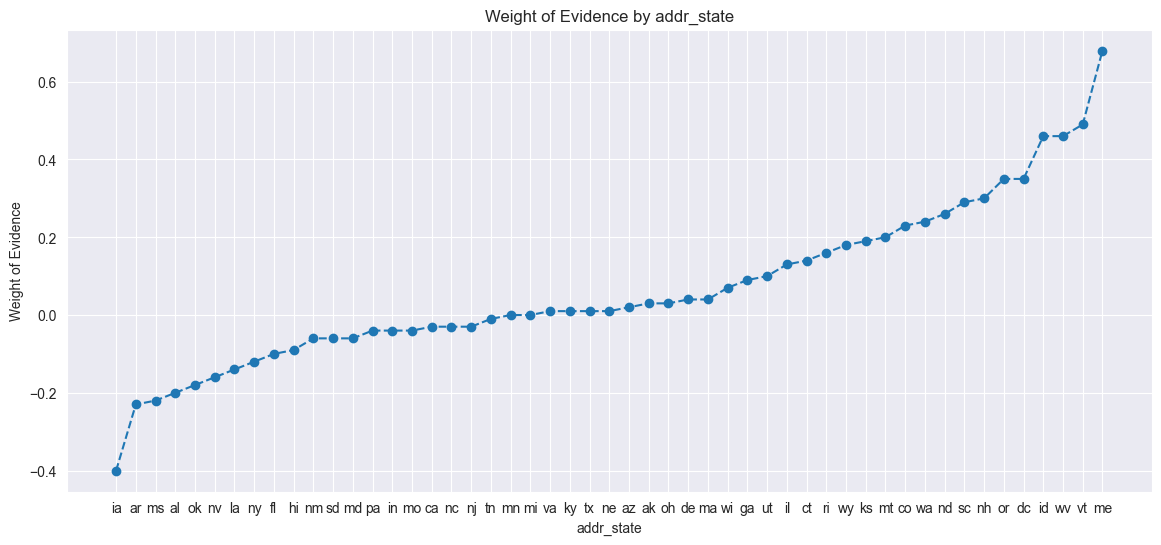

  initial_list_status  prop_n_obs   WoE        IV
0                   f      26.872 -0.28  0.033896
1                   w      73.128  0.12  0.033896


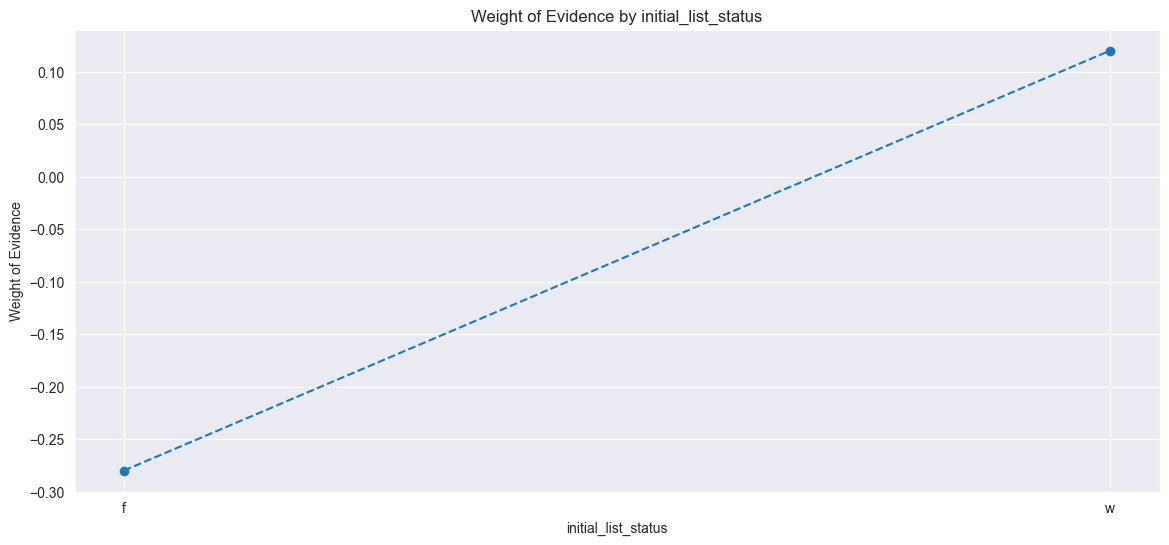

  application_type  prop_n_obs   WoE        IV
0       individual      92.798 -0.03  0.010038
1        joint app       7.202  0.39  0.010038


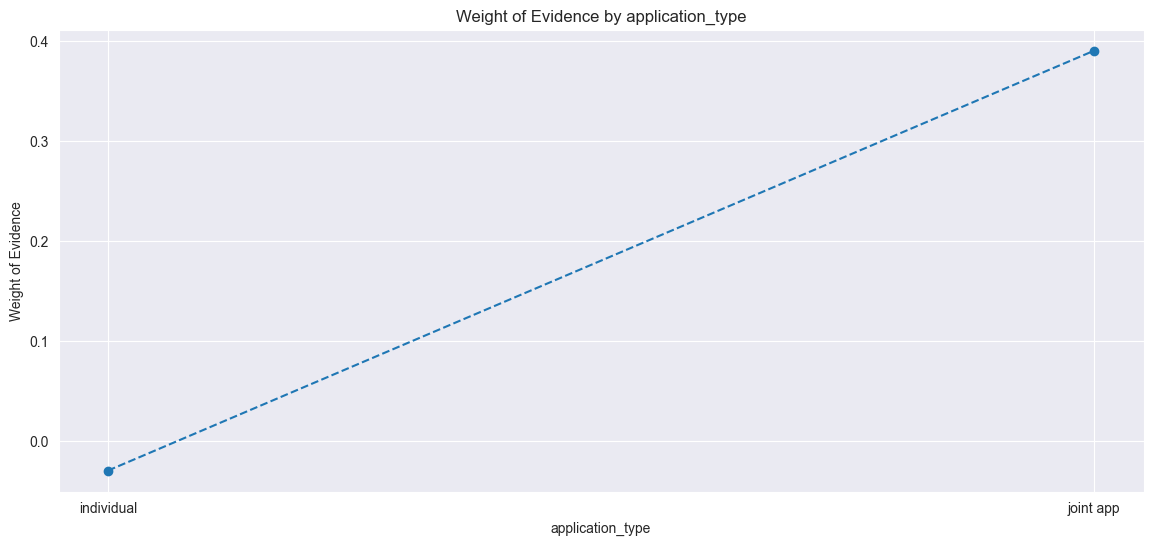

  hardship_flag  prop_n_obs   WoE        IV
0       missing       1.314 -0.46  0.179059
1             n      94.539 -0.04  0.179059
2             y       4.147  3.76  0.179059


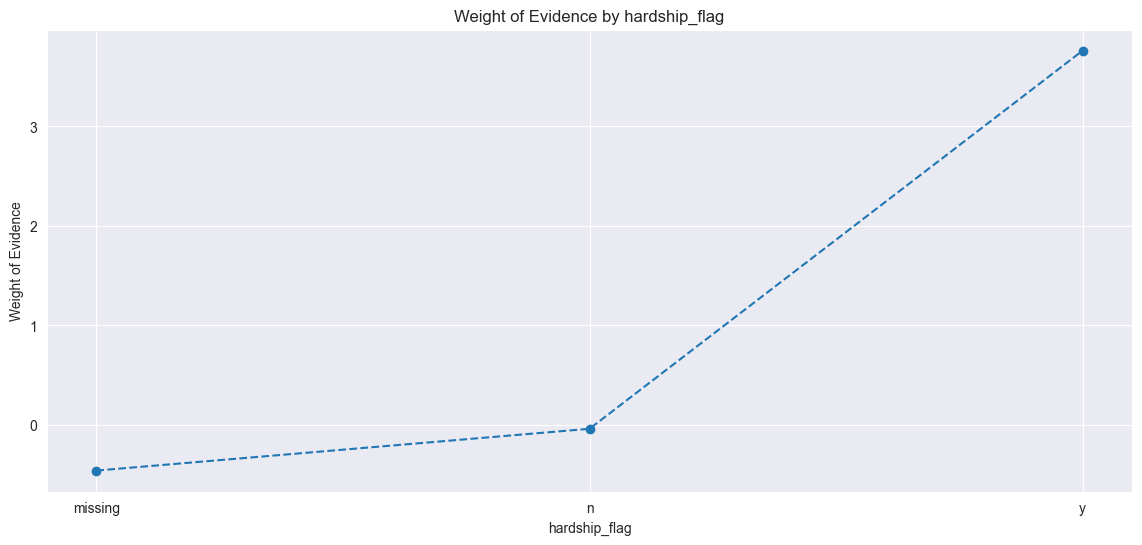

  debt_settlement_flag  prop_n_obs   WoE        IV
1                    y       1.754 -8.26  1.134465
0                    n      98.246  0.14  1.134465


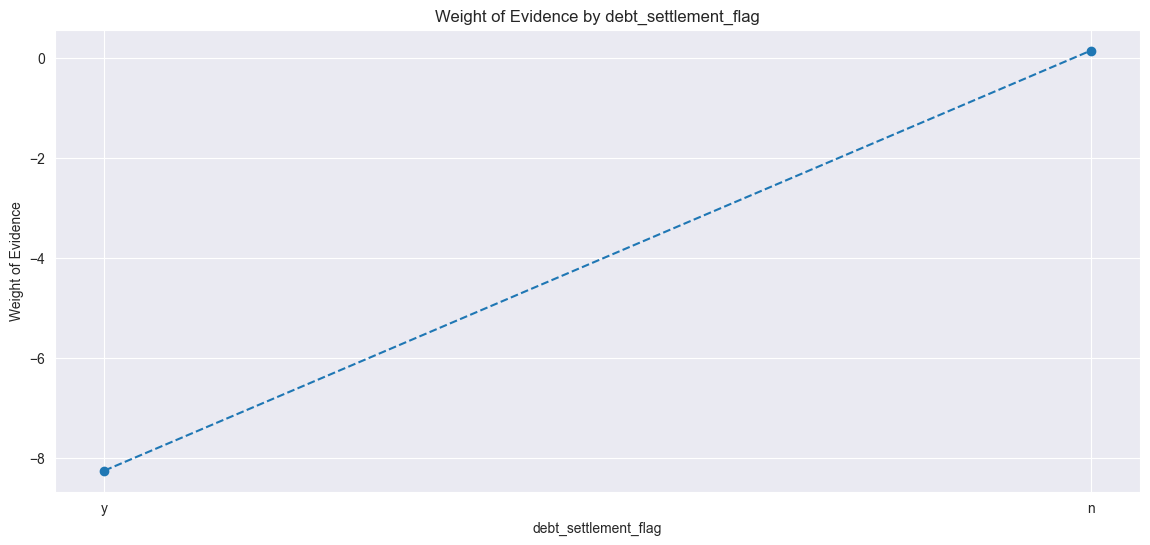

In [103]:
for col in cat_cols:
    df = woe_discrete(inputs_prep, col, "good_bad", targets_prep)
    df["prop_n_obs"] = df["prop_n_obs"].round(5) * 100
    df["WoE"] = df["WoE"].round(2)
    print(df.iloc[:, [0, 3, -2, -1]])
    if col == "purpose":
        plot_by_woe(df, woe_col_name="WoE", x_rot=45)
    else:
        plot_by_woe(df, woe_col_name="WoE")

From above graphs and descriptions the following can be stayed:

* in `home_ownership` column values "other", "none", and "any" are underrepresented, and will be combined with "rent" value
* in `purpose` column values following categories will be combined:
    - "educational" and "small_business"
    - "renewable_energy", "moving", "medical"
    - "other", "house", "major_purchase"
    - "vacation", "wedding", "home_improvement"
* `sub_grade` provides the same information as `grade`, thus will be dropped
* `hardship_flag` and `debt_settlement_flag` contains two values, one from which is being underrepresented, thus those columns will be dropped

In [104]:
def combine_cat(inputs, from_category, cats_to_combine, cat_sep=":"):
    dummies_to_drop = [f"{from_category + cat_sep + dtd}" for l in cats_to_combine for dtd in l]
    for cat_list in cats_to_combine:
        prefix = f"{from_category + cat_sep}"
        suffix = "".join(f"_{dummy}" for dummy in cat_list)
        new_dummy = prefix + suffix
        old_dummies = [from_category + cat_sep + cat for cat in cat_list]
        inputs[new_dummy] = inputs[old_dummies].sum(axis=1)

    print(from_category + " " + "dummy variables: ")

    cat_dummy_variables = [
        re.search(f"(^{from_category}.+)$", column).group(1) for column in inputs.columns.values if (re.search(f"(^{from_category}.+)$", column) and not(re.search(f"(^{from_category}.+)$", column).group(1) in dummies_to_drop))
    ]
    
    print(cat_dummy_variables)

    return inputs, cat_dummy_variables

In [105]:
inputs_prep, home_own_dummies = combine_cat(
    inputs_prep,
    "home_ownership",
    [
        ["other", "rent"],
        ["none", "own"],
        ["mortgage", "any"]
    ]
)

home_ownership dummy variables: 
['home_ownership:_other_rent', 'home_ownership:_none_own', 'home_ownership:_mortgage_any']


In [106]:
dummies_list = dummies_list + home_own_dummies

In [107]:
inputs_prep, purpose_dummies = combine_cat(
    inputs_prep,
    "purpose",
    [
        ["educational", "small_business", "renewable_energy", "moving"],
        ["medical", "house", "other"],
        ["major_purchase", "vacation", "wedding", "home_improvement"],
        ["credit_card", "car"]
    ]
)

purpose dummy variables: 
['purpose:debt_consolidation', 'purpose:_educational_small_business_renewable_energy_moving', 'purpose:_medical_house_other', 'purpose:_major_purchase_vacation_wedding_home_improvement', 'purpose:_credit_card_car']


In [108]:
dummies_list = dummies_list + purpose_dummies

In [109]:
inputs_prep, addr_state_dummies = combine_cat(
    inputs_prep,
    "addr_state",
    [
        ["ia", "ar", "ms", "al", "ok", "nv", "la"],
        ["hi", "nm", "sd", "md", "pa", "in", "mo"],
        ["nc", "nj", "tn", "mn", "mi", "va", "ky"],
        ["ne", "az", "ak", "oh", "de", "ma"],
        ["wi", "ga", "ut"],
        ["il", "ct", "ri", "wy", "ks", "mt"],
        ["co", "wa", "nd", "sc", "nh"],
        ["or", "dc", "id", "wv", "vt", "me"]
    ]
)       

addr_state dummy variables: 
['addr_state:ca', 'addr_state:fl', 'addr_state:ny', 'addr_state:tx', 'addr_state:_ia_ar_ms_al_ok_nv_la', 'addr_state:_hi_nm_sd_md_pa_in_mo', 'addr_state:_nc_nj_tn_mn_mi_va_ky', 'addr_state:_ne_az_ak_oh_de_ma', 'addr_state:_wi_ga_ut', 'addr_state:_il_ct_ri_wy_ks_mt', 'addr_state:_co_wa_nd_sc_nh', 'addr_state:_or_dc_id_wv_vt_me']


In [110]:
dummies_list = dummies_list + addr_state_dummies

In [111]:
def create_cat_from_all_small_cont(inputs, cat_name, cat_sep=":"):
    cat_dummy_variables = []
    for val in inputs[cat_name].unique():
        inputs[f"{cat_name + cat_sep + str(val)}"] = np.where((inputs[cat_name] == val), 1, 0)
        cat_dummy_variables.append(f"{cat_name + cat_sep + str(val)}")

    return inputs, cat_dummy_variables

In [112]:
for cat in ["verification_status", "initial_list_status", "application_type", "hardship_flag", "debt_settlement_flag", "grade"]:
    inputs_prep, _dummies = create_cat_from_all_small_cont(inputs_prep, cat)
    dummies_list = dummies_list + _dummies

In [113]:
def woe_ordered_continuous(inputs, discrete_variable_name, gb_col_name, gb_variable, threshold_less=None, threshold_more=None):
    df = pd.concat([inputs[discrete_variable_name], gb_variable], axis=1)
    if threshold_less:
        df = df[df[discrete_variable_name] < threshold_less]
    elif threshold_more:
        df = df[df[discrete_variable_name] > threshold_more]
    df = (df.groupby(discrete_variable_name)[gb_col_name]
             .agg(["count", "mean"])
             .reset_index()
             .rename(columns={"count": "n_obs", "mean": "prop_good"})
    )
    df["prop_n_obs"] = df["n_obs"] / df["n_obs"].sum()
    df["n_good"] = df["prop_good"] * df["n_obs"]
    df["n_bad"] = (1 - df["prop_good"]) * df["n_obs"]
    df["prop_n_good"] = df["n_good"] / df["n_good"].sum()
    df["prop_n_bad"] = df["n_bad"] / df["n_bad"].sum()
    df["WoE"] = np.log(df["prop_n_good"] / df["prop_n_bad"])
    df["IV"] = (df["prop_n_good"] - df["prop_n_bad"]) * df["WoE"]
    df["IV"] = df["IV"].sum()

    return df

   term  prop_n_obs   WoE        IV
0    36      70.411  0.18  0.063388
1    60      29.589 -0.35  0.063388


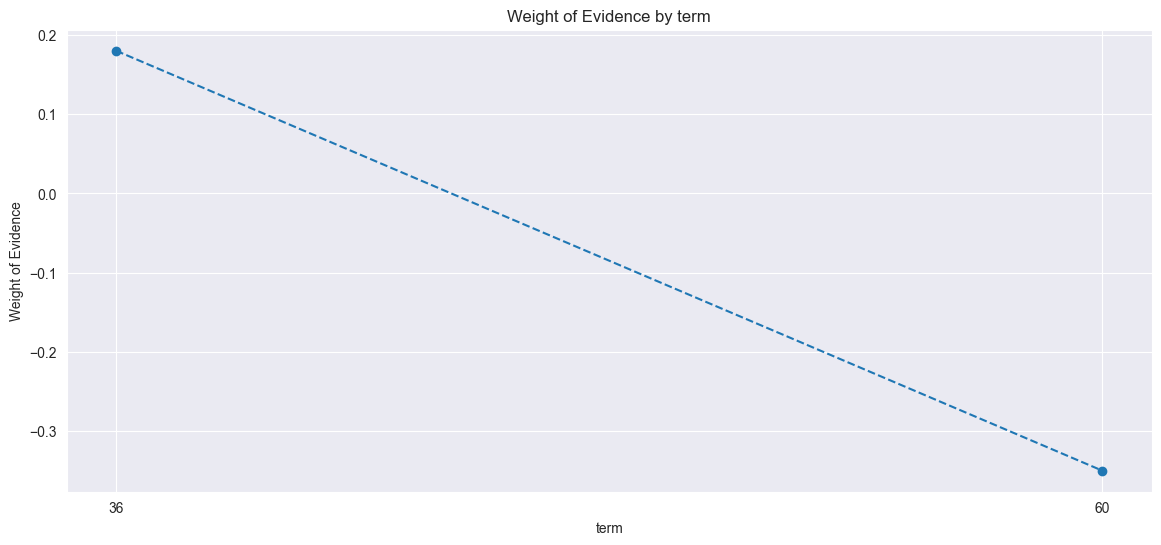

    fico_range  prop_n_obs   WoE   IV
0        610.0       0.000   inf  inf
1        625.0       0.000 -1.90  inf
2        630.0       0.000 -3.29  inf
3        635.0       0.000 -1.50  inf
4        640.0       0.003 -1.01  inf
5        645.0       0.004 -1.12  inf
6        650.0       0.005 -0.99  inf
7        655.0       0.005 -1.10  inf
8        660.0       7.615 -0.46  inf
9        665.0       7.455 -0.40  inf
10       670.0       7.559 -0.34  inf
11       675.0       6.892 -0.28  inf
12       680.0       7.161 -0.22  inf
13       685.0       6.422 -0.13  inf
14       690.0       6.317 -0.08  inf
15       695.0       5.739 -0.03  inf
16       700.0       5.559  0.06  inf
17       705.0       5.088  0.14  inf
18       710.0       4.584  0.22  inf
19       715.0       4.095  0.29  inf
20       720.0       3.687  0.36  inf
21       725.0       3.011  0.43  inf
22       730.0       2.704  0.50  inf
23       735.0       2.171  0.55  inf
24       740.0       2.007  0.62  inf
25       745

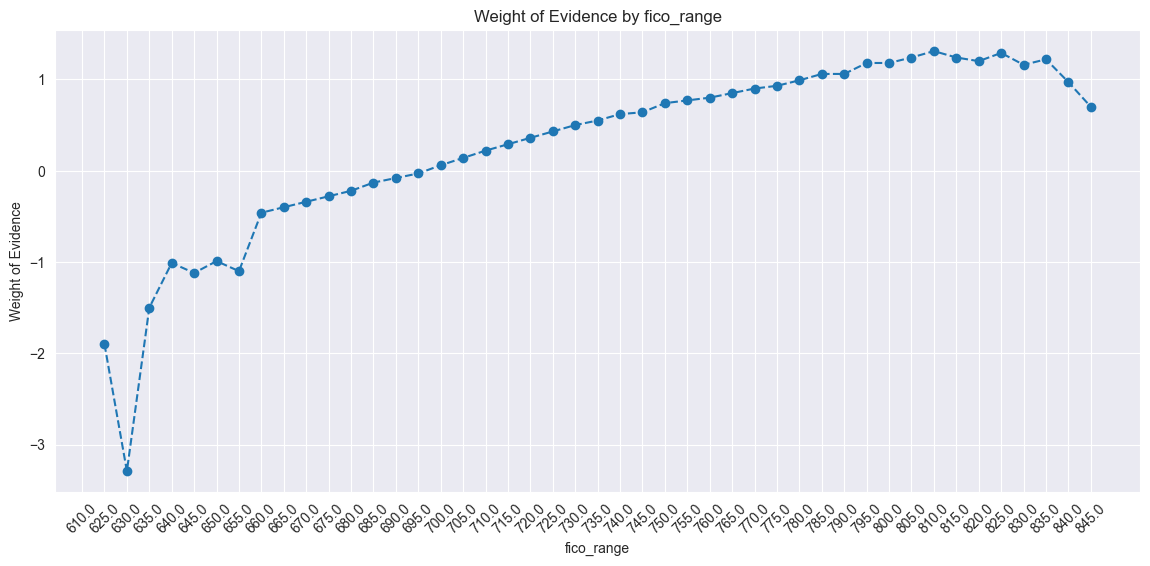

C:\Users\HARDPC\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


    inq_last_6mths  prop_n_obs   WoE   IV
0              0.0      61.981  0.17  inf
1              1.0      25.759 -0.13  inf
2              2.0       8.498 -0.35  inf
3              3.0       2.783 -0.56  inf
4              4.0       0.681 -0.72  inf
5              5.0       0.239 -0.76  inf
6              6.0       0.043 -0.89  inf
7              7.0       0.007 -1.19  inf
8              8.0       0.004 -1.45  inf
9              9.0       0.002 -1.56  inf
10            10.0       0.001 -0.36  inf
11            11.0       0.001  0.49  inf
12            12.0       0.001 -1.21  inf
13            13.0       0.000 -0.52  inf
14            14.0       0.000 -3.51  inf
15            15.0       0.000 -2.13  inf
16            16.0       0.000   inf  inf
17            17.0       0.000 -1.90  inf
18            18.0       0.000 -1.90  inf
19            19.0       0.000   inf  inf
20            24.0       0.000   inf  inf
21            25.0       0.000  -inf  inf
22            27.0       0.000   i

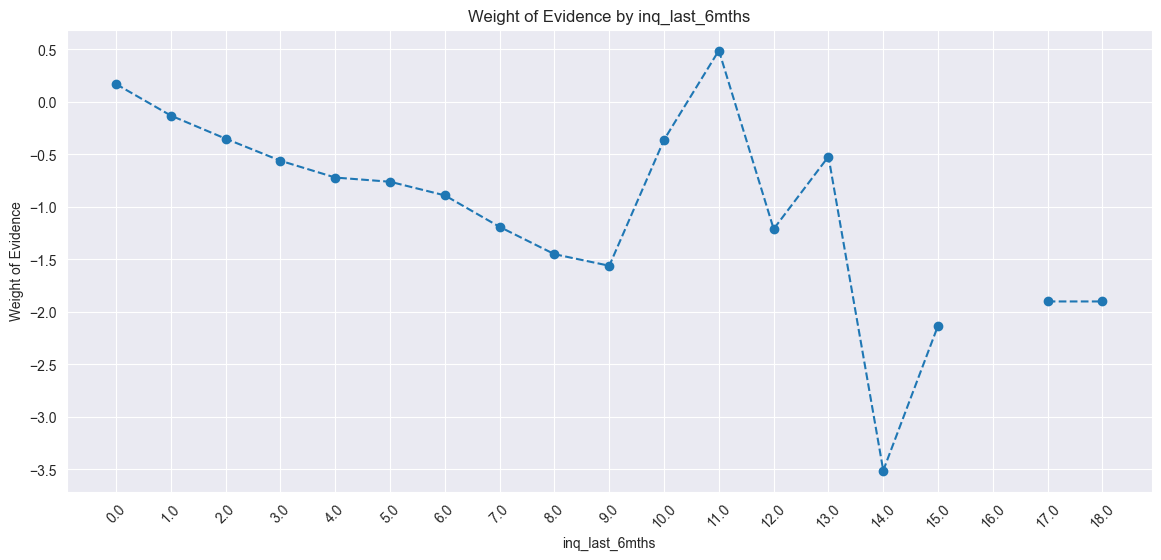

    collections_12_mths_ex_med  prop_n_obs   WoE   IV
0                          0.0      98.382  0.00  inf
1                          1.0       1.503 -0.26  inf
2                          2.0       0.097 -0.37  inf
3                          3.0       0.012 -0.29  inf
4                          4.0       0.003 -0.48  inf
5                          5.0       0.001 -0.25  inf
6                          6.0       0.001 -1.21  inf
7                          7.0       0.000   inf  inf
8                          8.0       0.000   inf  inf
9                          9.0       0.000 -0.81  inf
10                        10.0       0.000   inf  inf
11                        11.0       0.000   inf  inf
12                        12.0       0.000   inf  inf
13                        14.0       0.000   inf  inf
14                        16.0       0.000   inf  inf
15                        20.0       0.000   inf  inf


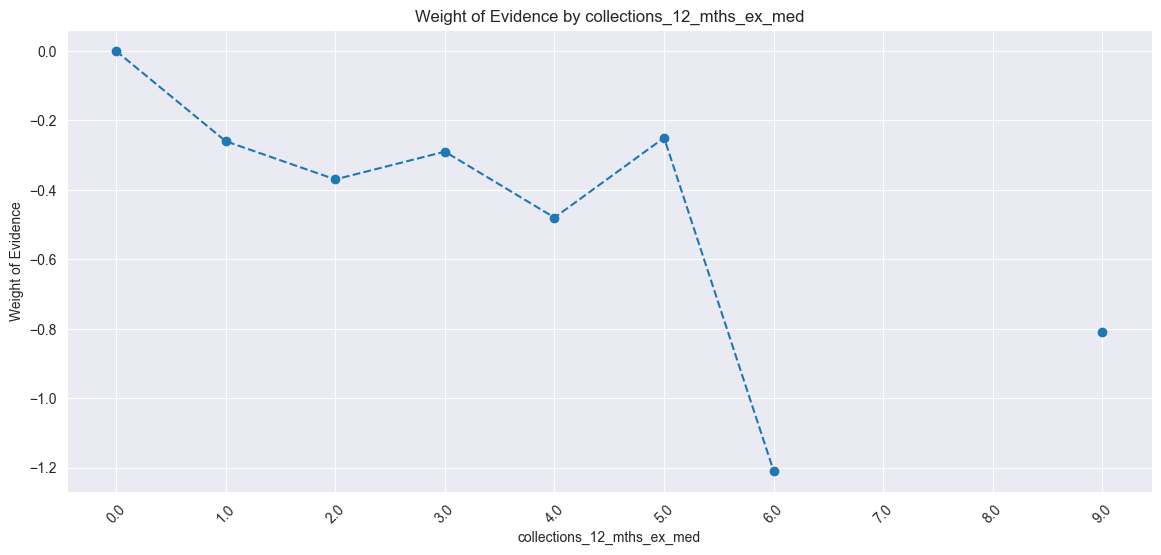

C:\Users\HARDPC\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


   acc_now_delinq  prop_n_obs   WoE   IV
0             0.0      99.698  0.00  inf
1             1.0       0.285 -0.40  inf
2             2.0       0.015 -0.53  inf
3             3.0       0.002 -0.95  inf
4             4.0       0.000  0.29  inf
5             5.0       0.000 -1.21  inf
6             6.0       0.000  -inf  inf
7             7.0       0.000   inf  inf
8            14.0       0.000   inf  inf


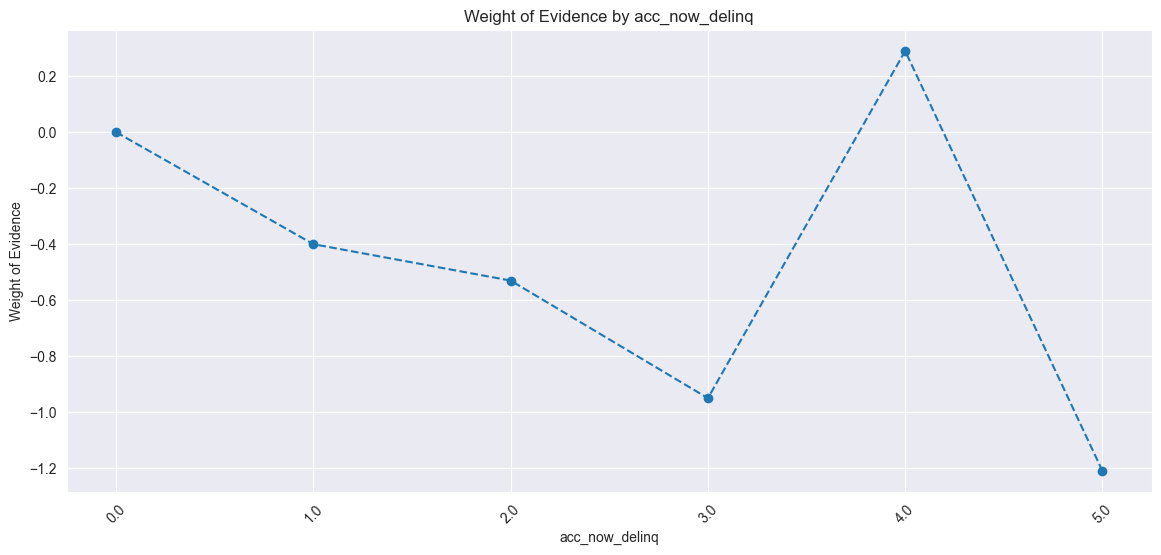

C:\Users\HARDPC\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


    open_acc_6m  prop_n_obs   WoE   IV
0           0.0      31.830  0.37  inf
1           1.0      51.447 -0.16  inf
2           2.0      10.255  0.01  inf
3           3.0       4.081 -0.13  inf
4           4.0       1.521 -0.27  inf
5           5.0       0.539 -0.34  inf
6           6.0       0.200 -0.44  inf
7           7.0       0.075 -0.42  inf
8           8.0       0.030 -0.58  inf
9           9.0       0.013 -0.55  inf
10         10.0       0.005 -0.29  inf
11         11.0       0.002 -1.12  inf
12         12.0       0.001 -1.16  inf
13         13.0       0.000 -0.65  inf
14         14.0       0.000 -0.65  inf
15         15.0       0.000   inf  inf
16         16.0       0.000 -1.90  inf
17         17.0       0.000  -inf  inf
18         18.0       0.000   inf  inf


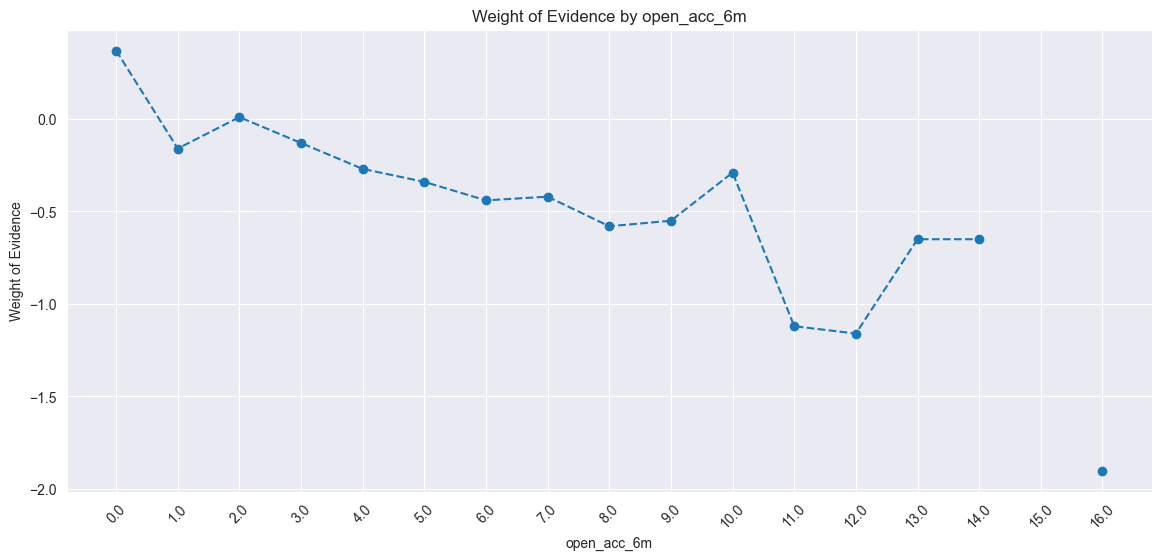

C:\Users\HARDPC\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


    open_il_12m  prop_n_obs   WoE   IV
0           0.0      67.114 -0.04  inf
1           1.0      21.535  0.16  inf
2           2.0       7.903  0.00  inf
3           3.0       2.364 -0.11  inf
4           4.0       0.743 -0.13  inf
5           5.0       0.241 -0.14  inf
6           6.0       0.084 -0.22  inf
7           7.0       0.008 -0.68  inf
8           8.0       0.003 -0.89  inf
9           9.0       0.002 -0.75  inf
10         10.0       0.001 -1.02  inf
11         11.0       0.001 -1.32  inf
12         12.0       0.000 -0.52  inf
13         13.0       0.000 -0.99  inf
14         14.0       0.000   inf  inf
15         15.0       0.000   inf  inf
16         20.0       0.000   inf  inf
17         25.0       0.000  -inf  inf


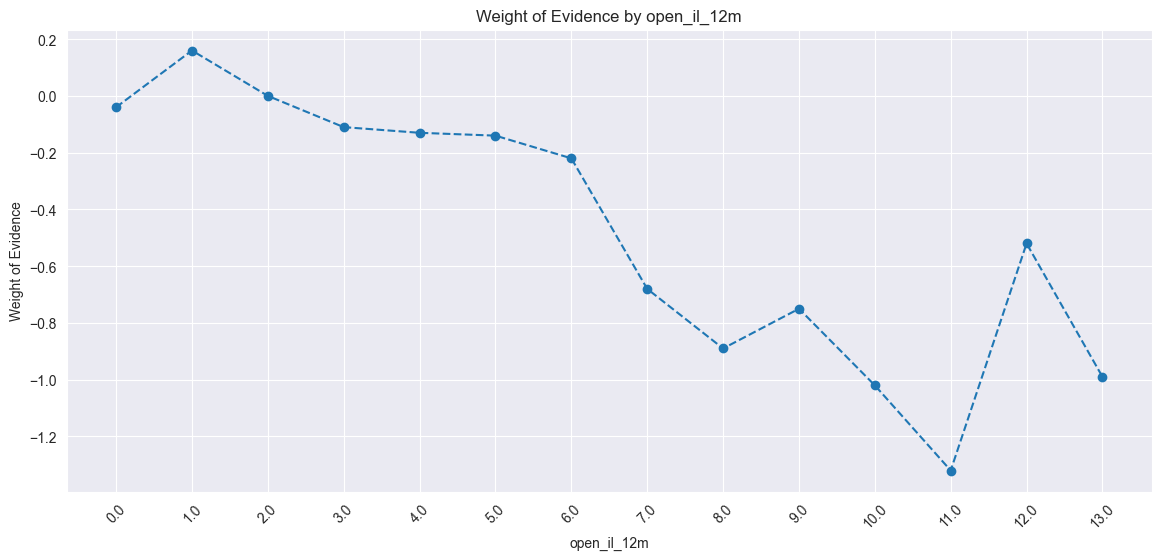

C:\Users\HARDPC\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


    open_il_24m  prop_n_obs   WoE   IV
0           0.0      18.170  0.29  inf
1           1.0      51.774 -0.13  inf
2           2.0      14.674  0.17  inf
3           3.0       7.757  0.09  inf
4           4.0       3.833 -0.01  inf
5           5.0       1.904 -0.08  inf
6           6.0       0.927 -0.12  inf
7           7.0       0.471 -0.21  inf
8           8.0       0.233 -0.19  inf
9           9.0       0.120 -0.21  inf
10         10.0       0.063 -0.51  inf
11         11.0       0.033 -0.25  inf
12         12.0       0.019 -0.39  inf
13         13.0       0.011 -0.57  inf
14         14.0       0.005 -0.54  inf
15         15.0       0.002 -0.49  inf
16         16.0       0.002 -0.73  inf
17         17.0       0.001  0.35  inf
18         18.0       0.001  0.04  inf
19         19.0       0.000 -0.40  inf
20         20.0       0.000 -1.68  inf
21         21.0       0.000   inf  inf
22         22.0       0.000   inf  inf
23         23.0       0.000 -1.90  inf
24         24.0       0.0

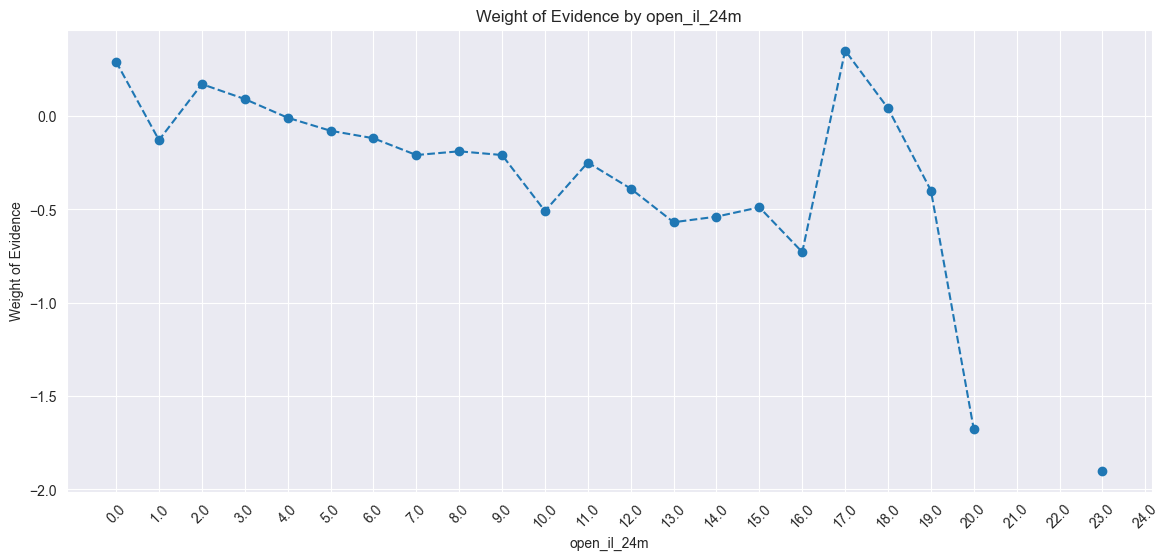

    open_rv_12m  prop_n_obs   WoE   IV
0           0.0      26.792  0.43  inf
1           1.0      50.390 -0.15  inf
2           2.0      11.682  0.04  inf
3           3.0       5.788 -0.09  inf
4           4.0       2.748 -0.19  inf
5           5.0       1.300 -0.27  inf
6           6.0       0.635 -0.36  inf
7           7.0       0.313 -0.37  inf
8           8.0       0.154 -0.32  inf
9           9.0       0.084 -0.38  inf
10         10.0       0.046 -0.40  inf
11         11.0       0.027 -0.46  inf
12         12.0       0.015 -0.60  inf
13         13.0       0.008 -0.71  inf
14         14.0       0.005 -0.61  inf
15         15.0       0.004 -0.28  inf
16         16.0       0.002 -0.75  inf
17         17.0       0.002 -0.73  inf
18         18.0       0.001 -1.34  inf
19         19.0       0.001  0.74  inf
20         20.0       0.000 -0.92  inf
21         21.0       0.000 -0.52  inf
22         22.0       0.000 -0.52  inf
23         23.0       0.000   inf  inf
24         24.0       0.0

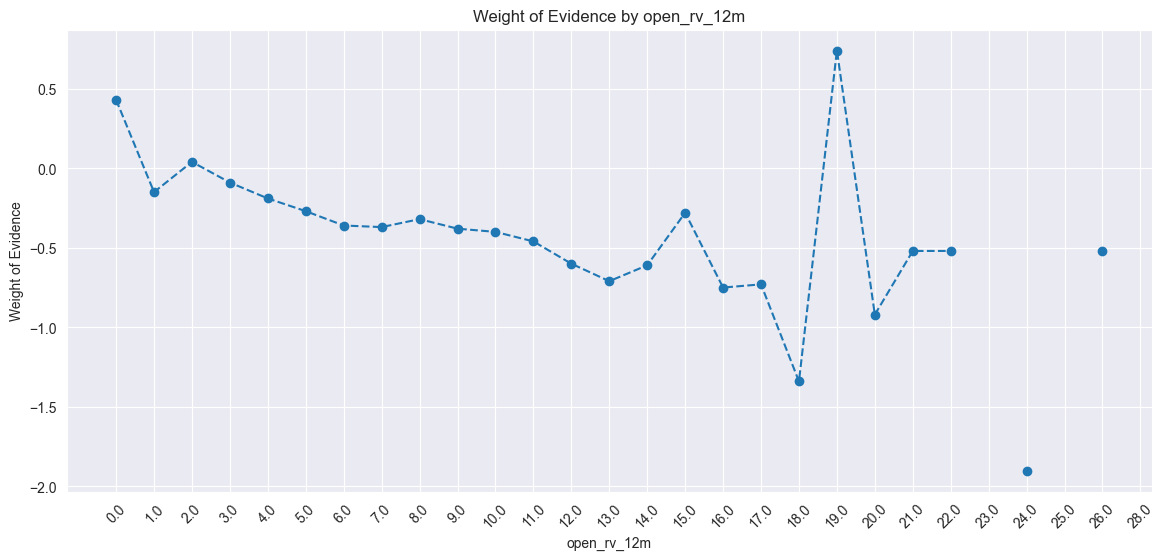

    inq_fi  prop_n_obs   WoE   IV
0      0.0      32.879  0.23  inf
1      1.0      48.630 -0.15  inf
2      2.0       9.333  0.16  inf
3      3.0       4.516  0.06  inf
4      4.0       2.214 -0.03  inf
5      5.0       1.118 -0.14  inf
6      6.0       0.576 -0.25  inf
7      7.0       0.308 -0.30  inf
8      8.0       0.173 -0.38  inf
9      9.0       0.098 -0.51  inf
10    10.0       0.058 -0.51  inf
11    11.0       0.035 -0.57  inf
12    12.0       0.021 -0.67  inf
13    13.0       0.013 -0.50  inf
14    14.0       0.009 -0.35  inf
15    15.0       0.006 -0.54  inf
16    16.0       0.004 -0.76  inf
17    17.0       0.003 -0.15  inf
18    18.0       0.002  0.18  inf
19    19.0       0.002 -0.62  inf
20    20.0       0.001 -0.52  inf
21    21.0       0.001 -0.52  inf
22    22.0       0.001 -1.09  inf
23    23.0       0.000   inf  inf
24    24.0       0.000  0.29  inf
25    25.0       0.000 -0.52  inf
26    26.0       0.000   inf  inf
27    27.0       0.000   inf  inf
28    28.0    

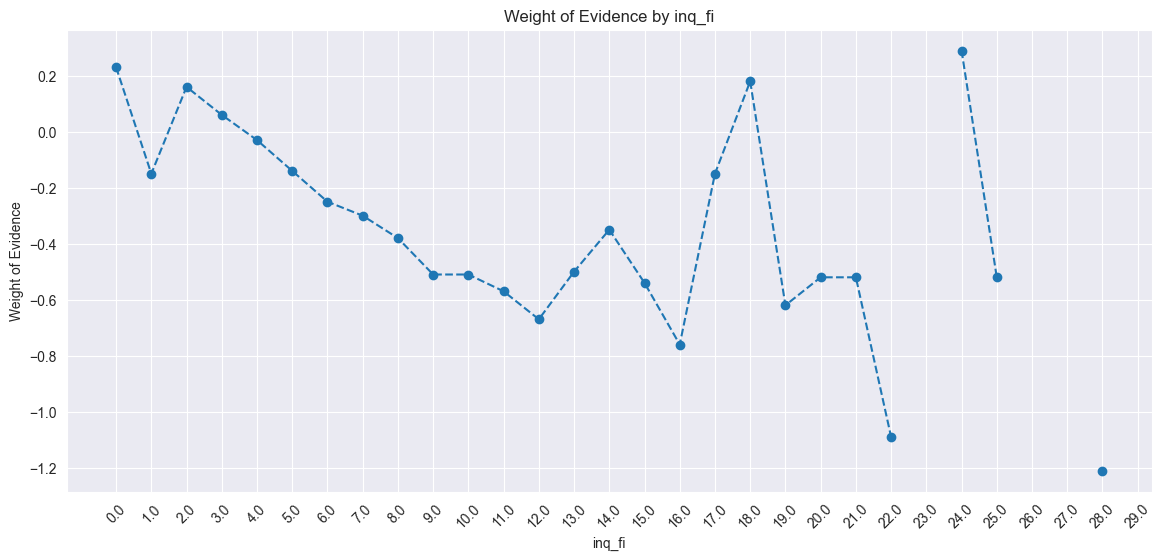

    inq_last_12m  prop_n_obs   WoE   IV
0            0.0      20.422  0.48  inf
1            1.0      47.004 -0.16  inf
2            2.0      11.909  0.14  inf
3            3.0       7.614  0.01  inf
4            4.0       4.760 -0.06  inf
5            5.0       2.942 -0.12  inf
6            6.0       1.857 -0.14  inf
7            7.0       1.185 -0.19  inf
8            8.0       0.760 -0.23  inf
9            9.0       0.498 -0.25  inf
10          10.0       0.326 -0.31  inf
11          11.0       0.217 -0.38  inf
12          12.0       0.149 -0.32  inf
13          13.0       0.099 -0.39  inf
14          14.0       0.072 -0.44  inf
15          15.0       0.049 -0.59  inf
16          16.0       0.038 -0.50  inf
17          17.0       0.024 -0.67  inf
18          18.0       0.018 -0.66  inf
19          19.0       0.014 -0.69  inf
20          20.0       0.010 -0.52  inf
21          21.0       0.008 -0.67  inf
22          22.0       0.006 -0.78  inf
23          23.0       0.005 -0.53  inf


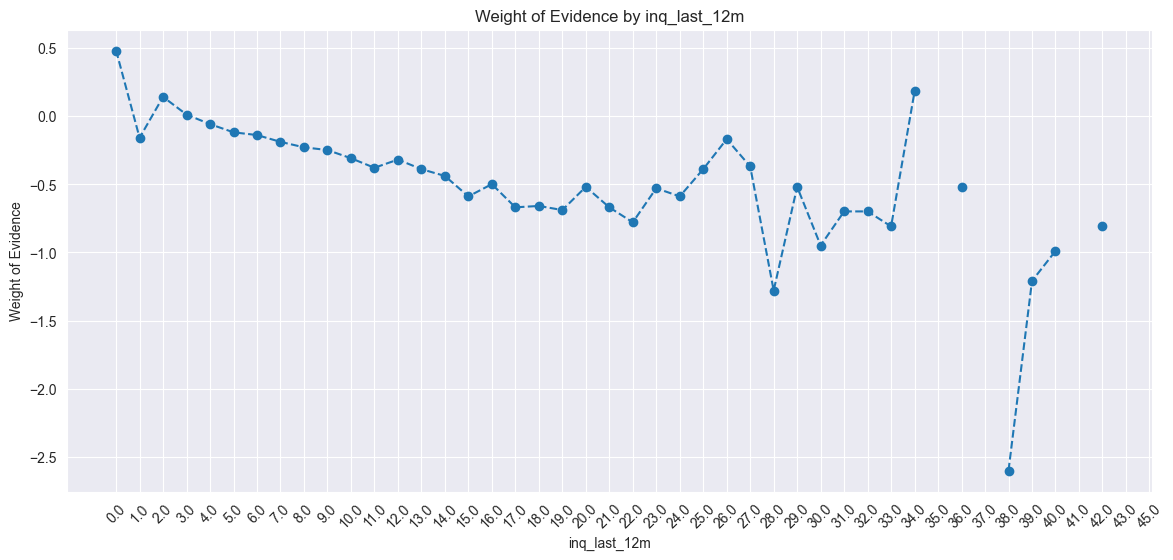

    chargeoff_within_12_mths  prop_n_obs   WoE   IV
0                        0.0      99.280  0.00  inf
1                        1.0       0.663 -0.22  inf
2                        2.0       0.045 -0.23  inf
3                        3.0       0.008 -0.43  inf
4                        4.0       0.003 -0.68  inf
5                        5.0       0.001 -0.29  inf
6                        6.0       0.001 -0.20  inf
7                        7.0       0.000  0.18  inf
8                        8.0       0.000   inf  inf
9                        9.0       0.000 -0.29  inf
10                      10.0       0.000   inf  inf


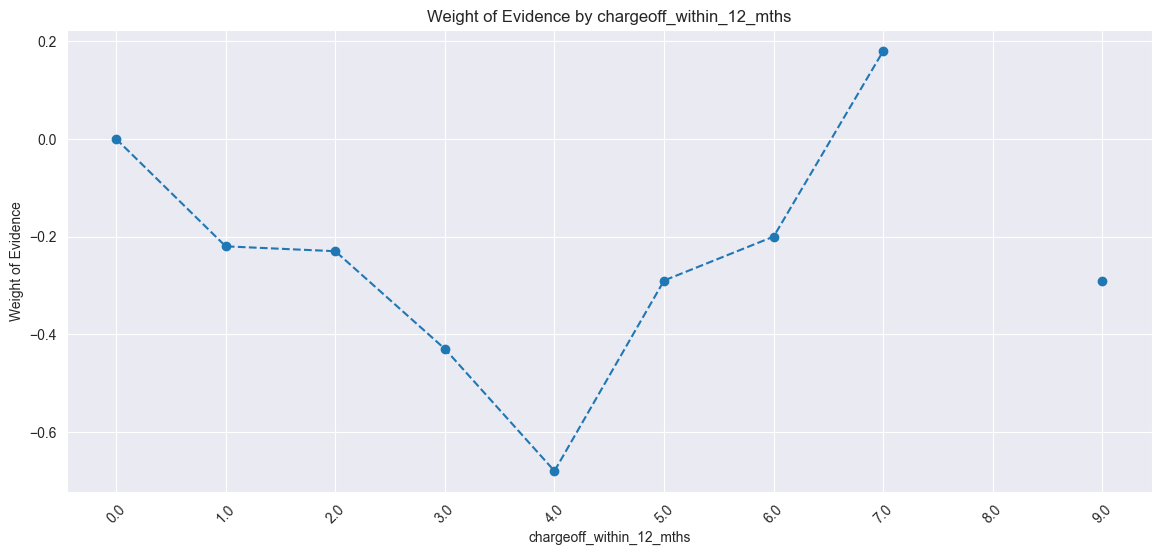

    num_tl_op_past_12m  prop_n_obs   WoE   IV
0                  0.0      18.910  0.35  inf
1                  1.0      24.929  0.18  inf
2                  2.0      23.758 -0.02  inf
3                  3.0      14.642 -0.17  inf
4                  4.0       8.583 -0.28  inf
5                  5.0       4.395 -0.32  inf
6                  6.0       2.237 -0.38  inf
7                  7.0       1.197 -0.43  inf
8                  8.0       0.608 -0.53  inf
9                  9.0       0.325 -0.58  inf
10                10.0       0.176 -0.51  inf
11                11.0       0.097 -0.50  inf
12                12.0       0.057 -0.57  inf
13                13.0       0.032 -0.82  inf
14                14.0       0.020 -0.75  inf
15                15.0       0.011 -0.76  inf
16                16.0       0.008 -0.85  inf
17                17.0       0.005 -1.00  inf
18                18.0       0.003 -0.55  inf
19                19.0       0.002  0.15  inf
20                20.0       0.001

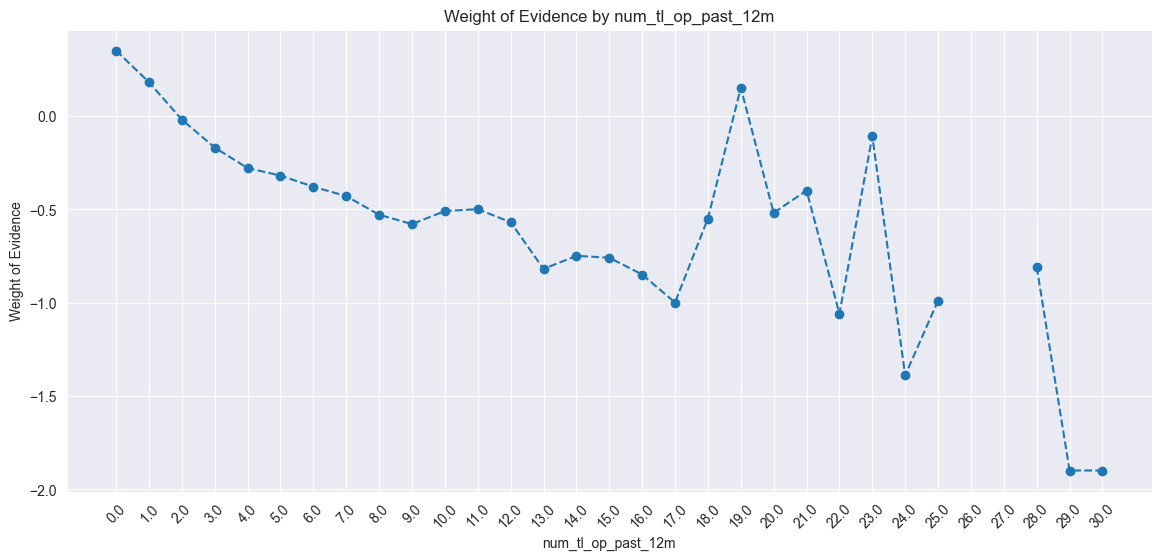

C:\Users\HARDPC\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


    pub_rec_bankruptcies  prop_n_obs   WoE   IV
0                    0.0      88.380  0.03  inf
1                    1.0      11.134 -0.22  inf
2                    2.0       0.382 -0.60  inf
3                    3.0       0.075 -0.48  inf
4                    4.0       0.019 -0.83  inf
5                    5.0       0.007 -0.64  inf
6                    6.0       0.002 -1.05  inf
7                    7.0       0.001 -1.21  inf
8                    8.0       0.000 -1.90  inf
9                    9.0       0.000 -1.21  inf
10                  11.0       0.000  -inf  inf
11                  12.0       0.000   inf  inf


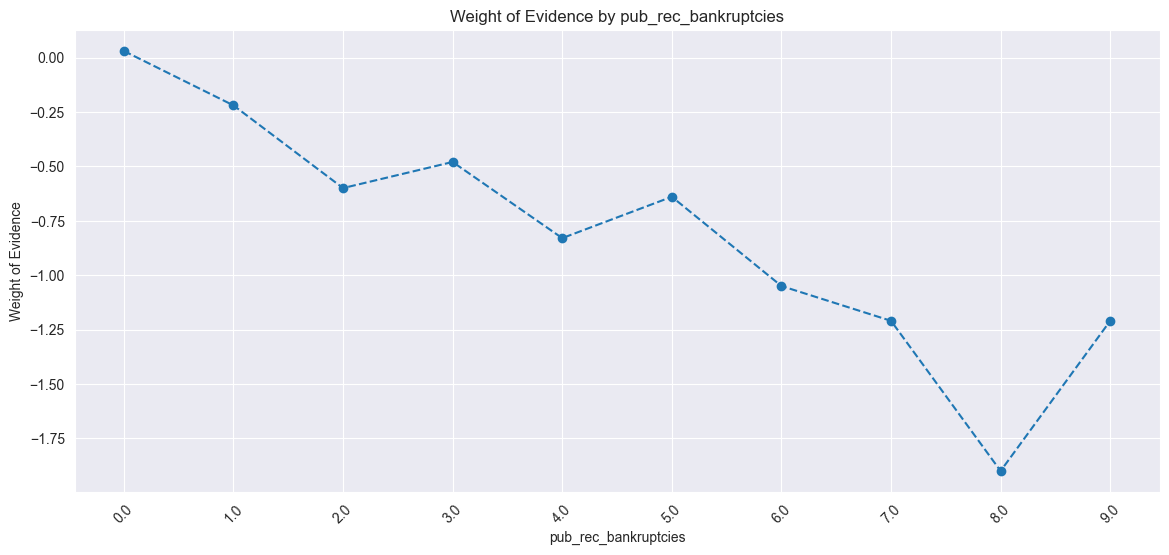

In [114]:
for col in cont_small_cols:
    df = woe_ordered_continuous(inputs_prep, col, "good_bad", targets_prep)
    df["prop_n_obs"] = df["prop_n_obs"].round(5) * 100
    df["WoE"] = df["WoE"].round(2)
    print(df.iloc[:, [0, 3, -2, -1]])
    if df.size > 20:
        plot_by_woe(df, woe_col_name="WoE", x_rot=45)
    else:
        plot_by_woe(df, woe_col_name="WoE")

In [115]:
for cat in ["term"]:
    inputs_prep, _dummies = create_cat_from_all_small_cont(inputs_prep, cat)
    dummies_list = dummies_list + _dummies

In [116]:
def comb_cat_small_cont(inputs, from_category, val_ranges, last_moe=None, cat_sep=":"):
    cat_dummy_variables = []
    for val_range in val_ranges:
        try:
            len(val_range)
            inputs[f"{from_category + cat_sep + str(val_range[0])}-{val_range[-1]}"] = np.where((inputs[from_category].isin(val_range)), 1, 0)
            cat_dummy_variables.append(f"{from_category + cat_sep + str(val_range[0])}-{str(val_range[-1])}")
        except TypeError:
            if val_range == val_ranges[-1] and last_moe:
                inputs[f"{from_category + cat_sep + ">=" + str(val_range)}"] = np.where((inputs[from_category] >= val_range), 1, 0)
                cat_dummy_variables.append(f"{from_category + cat_sep + ">=" + str(val_range)}")
            else:
                inputs[f"{from_category + cat_sep + str(val_range)}"] = np.where((inputs[from_category] == val_range), 1, 0)
                cat_dummy_variables.append(f"{from_category + cat_sep + str(val_range)}")

    return inputs, cat_dummy_variables

In [117]:
inputs_prep, fico_range_dummies = comb_cat_small_cont(
    inputs_prep,
    "fico_range",
    [
        (range(610, 665, 5)),
        670,
        675,
        680,
        685,
        690,
        695,
        700,
        705,
        710,
        715,
        720,
        725,
        730,
        735,
        740,
        745,
        750,
        755,
        760,
        765,
        770,
        775,
        780,
        (range(785, 850, 5)),
    ]
)

In [118]:
fico_range_dummies

['fico_range:610-660',
 'fico_range:670',
 'fico_range:675',
 'fico_range:680',
 'fico_range:685',
 'fico_range:690',
 'fico_range:695',
 'fico_range:700',
 'fico_range:705',
 'fico_range:710',
 'fico_range:715',
 'fico_range:720',
 'fico_range:725',
 'fico_range:730',
 'fico_range:735',
 'fico_range:740',
 'fico_range:745',
 'fico_range:750',
 'fico_range:755',
 'fico_range:760',
 'fico_range:765',
 'fico_range:770',
 'fico_range:775',
 'fico_range:780',
 'fico_range:785-845']

In [119]:
dummies_list = dummies_list + fico_range_dummies

In [120]:
inputs_prep, inq_last_6mths_dummies = comb_cat_small_cont(
    inputs_prep,
    "inq_last_6mths",
    [
        0,
        1,
        2,
        3,
        4
    ],
    last_moe=True
)

In [121]:
inq_last_6mths_dummies

['inq_last_6mths:0',
 'inq_last_6mths:1',
 'inq_last_6mths:2',
 'inq_last_6mths:3',
 'inq_last_6mths:>=4']

In [122]:
dummies_list = dummies_list + inq_last_6mths_dummies

In [123]:
inputs_prep, open_acc_6m_dummies = comb_cat_small_cont(
    inputs_prep,
    "open_acc_6m",
    [
        0,
        1,
        2,
        3,
        4,
        5
    ],
    last_moe=True
)

In [124]:
open_acc_6m_dummies

['open_acc_6m:0',
 'open_acc_6m:1',
 'open_acc_6m:2',
 'open_acc_6m:3',
 'open_acc_6m:4',
 'open_acc_6m:>=5']

In [125]:
dummies_list = dummies_list + open_acc_6m_dummies

In [126]:
inputs_prep, open_il_12m_dummies = comb_cat_small_cont(
    inputs_prep,
    "open_il_12m",
    [
        0,
        1,
        2,
        3,
        4,
        5
    ],
    last_moe=True
)

In [127]:
open_il_12m_dummies

['open_il_12m:0',
 'open_il_12m:1',
 'open_il_12m:2',
 'open_il_12m:3',
 'open_il_12m:4',
 'open_il_12m:>=5']

In [128]:
dummies_list = dummies_list + open_il_12m_dummies

In [129]:
inputs_prep, open_il_24m_dummies = comb_cat_small_cont(
    inputs_prep,
    "open_il_24m",
    [
        0,
        1,
        2,
        3,
        range(4, 7),
        range(7, 12),
        range(12, 17),
        17
    ],
    last_moe=True
)

In [130]:
open_il_24m_dummies

['open_il_24m:0',
 'open_il_24m:1',
 'open_il_24m:2',
 'open_il_24m:3',
 'open_il_24m:4-6',
 'open_il_24m:7-11',
 'open_il_24m:12-16',
 'open_il_24m:>=17']

In [131]:
dummies_list = dummies_list + open_il_24m_dummies

In [132]:
inputs_prep, open_rv_12m_dummies = comb_cat_small_cont(
    inputs_prep,
    "open_rv_12m",
    [
        0,
        1,
        2,
        3,
        4,
        5,
        range(6, 12),
        12
    ],
    last_moe=True
)

In [133]:
open_rv_12m_dummies

['open_rv_12m:0',
 'open_rv_12m:1',
 'open_rv_12m:2',
 'open_rv_12m:3',
 'open_rv_12m:4',
 'open_rv_12m:5',
 'open_rv_12m:6-11',
 'open_rv_12m:>=12']

In [134]:
dummies_list = dummies_list + open_rv_12m_dummies

In [135]:
inputs_prep, inq_fi_dummies = comb_cat_small_cont(
    inputs_prep,
    "inq_fi",
    [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8
    ],
    last_moe=True
)

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3476573186.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + str(val_range)}"] = np.where((inputs[from_category] == val_range), 1, 0)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3476573186.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + str(val_range)}"] = np.where((inputs[from_category] == val_range), 1, 0)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3476573186.py:13: PerformanceWarnin

In [136]:
inq_fi_dummies

['inq_fi:0',
 'inq_fi:1',
 'inq_fi:2',
 'inq_fi:3',
 'inq_fi:4',
 'inq_fi:5',
 'inq_fi:6',
 'inq_fi:7',
 'inq_fi:>=8']

In [137]:
dummies_list = dummies_list + inq_fi_dummies

In [138]:
inputs_prep, inq_last_12m_dummies = comb_cat_small_cont(
    inputs_prep,
    "inq_last_12m",
    [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        range(10, 15),
        15
    ],
    last_moe=True
)

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3476573186.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + str(val_range)}"] = np.where((inputs[from_category] == val_range), 1, 0)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3476573186.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + str(val_range)}"] = np.where((inputs[from_category] == val_range), 1, 0)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3476573186.py:13: PerformanceWarnin

In [139]:
inq_last_12m_dummies

['inq_last_12m:0',
 'inq_last_12m:1',
 'inq_last_12m:2',
 'inq_last_12m:3',
 'inq_last_12m:4',
 'inq_last_12m:5',
 'inq_last_12m:6',
 'inq_last_12m:7',
 'inq_last_12m:8',
 'inq_last_12m:9',
 'inq_last_12m:10-14',
 'inq_last_12m:>=15']

In [140]:
dummies_list = dummies_list + inq_last_12m_dummies

In [141]:
inputs_prep, chargeoff_within_12_mths_dummies = comb_cat_small_cont(
    inputs_prep,
    "chargeoff_within_12_mths",
    [
        0,
        1,
        2
    ],
    last_moe=True
)

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3476573186.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + str(val_range)}"] = np.where((inputs[from_category] == val_range), 1, 0)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3476573186.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + str(val_range)}"] = np.where((inputs[from_category] == val_range), 1, 0)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3476573186.py:10: PerformanceWarnin

In [142]:
chargeoff_within_12_mths_dummies

['chargeoff_within_12_mths:0',
 'chargeoff_within_12_mths:1',
 'chargeoff_within_12_mths:>=2']

In [143]:
dummies_list = dummies_list + chargeoff_within_12_mths_dummies

In [144]:
inputs_prep, num_tl_op_past_12m_dummies = comb_cat_small_cont(
    inputs_prep,
    "num_tl_op_past_12m",
    [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        range(9, 13),
        range(13, 17),
        17
    ],
    last_moe=True
)

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3476573186.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + str(val_range)}"] = np.where((inputs[from_category] == val_range), 1, 0)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3476573186.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + str(val_range)}"] = np.where((inputs[from_category] == val_range), 1, 0)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3476573186.py:13: PerformanceWarnin

In [145]:
num_tl_op_past_12m_dummies

['num_tl_op_past_12m:0',
 'num_tl_op_past_12m:1',
 'num_tl_op_past_12m:2',
 'num_tl_op_past_12m:3',
 'num_tl_op_past_12m:4',
 'num_tl_op_past_12m:5',
 'num_tl_op_past_12m:6',
 'num_tl_op_past_12m:7',
 'num_tl_op_past_12m:8',
 'num_tl_op_past_12m:9-12',
 'num_tl_op_past_12m:13-16',
 'num_tl_op_past_12m:>=17']

In [146]:
dummies_list = dummies_list + num_tl_op_past_12m_dummies

In [147]:
inputs_prep, pub_rec_bankruptcies_dummies = comb_cat_small_cont(
    inputs_prep,
    "pub_rec_bankruptcies",
    [
        0,
        1,
        2,
        range(3, 6),
        6
    ],
    last_moe=True
)

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3476573186.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + str(val_range)}"] = np.where((inputs[from_category] == val_range), 1, 0)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3476573186.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + str(val_range)}"] = np.where((inputs[from_category] == val_range), 1, 0)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3476573186.py:13: PerformanceWarnin

In [148]:
pub_rec_bankruptcies_dummies

['pub_rec_bankruptcies:0',
 'pub_rec_bankruptcies:1',
 'pub_rec_bankruptcies:2',
 'pub_rec_bankruptcies:3-5',
 'pub_rec_bankruptcies:>=6']

In [149]:
dummies_list = dummies_list + pub_rec_bankruptcies_dummies

In [150]:
inputs_prep, acc_now_delinq_dummies = comb_cat_small_cont(
    inputs_prep,
    "acc_now_delinq",
    [
        0,
        1,
        2,
        3
    ],
    last_moe=True
)

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3476573186.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + str(val_range)}"] = np.where((inputs[from_category] == val_range), 1, 0)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3476573186.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + str(val_range)}"] = np.where((inputs[from_category] == val_range), 1, 0)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3476573186.py:13: PerformanceWarnin

In [151]:
acc_now_delinq_dummies

['acc_now_delinq:0',
 'acc_now_delinq:1',
 'acc_now_delinq:2',
 'acc_now_delinq:>=3']

In [152]:
dummies_list = dummies_list + acc_now_delinq_dummies

In [153]:
inputs_prep.head(10)

term  int_rate grade home_ownership  annual_inc  \
id                                                           
92797506     36     19.99     D       mortgage     26400.0   
139587342    60     15.02     C           rent    106000.0   
27119844     60     14.99     C           rent     46500.0   
116257126    36      7.21     A       mortgage     50000.0   
145057706    60     16.91     C            own     60000.0   
88936547     36     10.49     B           rent     90000.0   
137284139    36     17.97     D           rent     45000.0   
52038471     36     17.86     D           rent     50000.0   
55997441     36     14.65     C       mortgage     82000.0   
151013555    60     17.19     C            own    280000.0   

          verification_status             purpose addr_state    dti  \
id                                                                    
92797506             verified               other         tx   6.55   
139587342        not verified         credit_card         ny  21.99   
27119844             verified  debt_consolidation         ca  12.05   
116257126     source verified  debt_consolidation         ca  12.87   
145057706            verified      major_purchase         ny  17.04   
88936547      source verified         credit_card         ma  32.35   
137284139            verified      major_purchase         tx  26.85   
52038471         not verified               other         wv  39.33   
55997441             verified         credit_card         ny  18.21   
151013555        not verified  debt_consolidation         tx  10.23   

           fico_range  inq_last_6mths  revol_bal  revol_util  \
id                                                             
92797506        695.0             0.0      151.0         4.9   
139587342       675.0             0.0    61294.0        81.0   
27119844        690.0             1.0     8819.0        61.2   
116257126       730.0             0.0     1286.0         2.3   
145057706       680.0             0.0     4029.0        25.3   
88936547        680.0             1.0    45677.0        37.3   
137284139       690.0             0.0    19868.0        36.3   
52038471        680.0             0.0      644.0        10.7   
55997441        680.0             1.0    18701.0        46.5   
151013555       705.0             2.0    31724.0        31.7   

          initial_list_status  out_prncp   total_pymnt  total_rec_prncp  \
id                                                                        
92797506                    f       0.00   6682.881293          5000.00   
139587342                   w       0.00   8240.050000          2775.97   
27119844                    f       0.00  19531.100923         14400.00   
116257126                   w       0.00  10160.316070         10000.00   
145057706                   w   19099.89  10075.180000          4900.11   
88936547                    w       0.00  21058.904585         18000.00   
137284139                   w    7233.97  11368.490000          7766.03   
52038471                    f       0.00   3133.930102          2500.00   
55997441                    f       0.00  10451.560000          7100.20   
151013555                   w   22748.96   8559.700000          4251.04   

           total_rec_int  total_rec_late_fee  recoveries  last_pymnt_amnt  \
id                                                                          
92797506         1682.88                 0.0        0.00           185.43   
139587342        2792.04                 0.0     2672.04           499.81   
27119844         5131.10                 0.0        0.00            54.61   
116257126         160.32                 0.0        0.00          9854.59   
145057706        5175.07                 0.0        0.00           595.31   
88936547         3058.90                 0.0        0.00           584.91   
137284139        3602.46                 0.0        0.00             0.00   
52038471          633.93                 0.0      

In [154]:
len(cont_small_cols)

14

In [155]:
for col in cont_big_cols:
    inputs_prep[col + "_factor"] = pd.cut(inputs_prep[col], 50)

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\1078456651.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs_prep[col + "_factor"] = pd.cut(inputs_prep[col], 50)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\1078456651.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs_prep[col + "_factor"] = pd.cut(inputs_prep[col], 50)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\1078456651.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3554771784.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = (df.groupby(discrete_variable_name)[gb_col_name]


     int_rate_factor  prop_n_obs   WoE        IV
0     (5.284, 5.824]       1.935  1.66  0.462353
1     (5.824, 6.337]       1.694  1.54  0.462353
2     (6.337, 6.851]       3.214  1.70  0.462353
3     (6.851, 7.364]       4.247  1.25  0.462353
4     (7.364, 7.878]       2.870  1.26  0.462353
5     (7.878, 8.392]       6.710  0.86  0.462353
6     (8.392, 8.905]       2.894  1.31  0.462353
7     (8.905, 9.419]       1.674  0.32  0.462353
8     (9.419, 9.932]       3.534  0.40  0.462353
9    (9.932, 10.446]       4.059  0.66  0.462353
10   (10.446, 10.96]       3.340  0.28  0.462353
11   (10.96, 11.473]       4.991  0.32  0.462353
12  (11.473, 11.987]       4.035  0.28  0.462353
13    (11.987, 12.5]       4.954  0.14  0.462353
14    (12.5, 13.014]       4.648 -0.20  0.462353
15  (13.014, 13.528]       3.709  0.03  0.462353
16  (13.528, 14.041]       4.842 -0.27  0.462353
17  (14.041, 14.555]       4.111 -0.14  0.462353
18  (14.555, 15.068]       3.481 -0.35  0.462353
19  (15.068, 15.582]

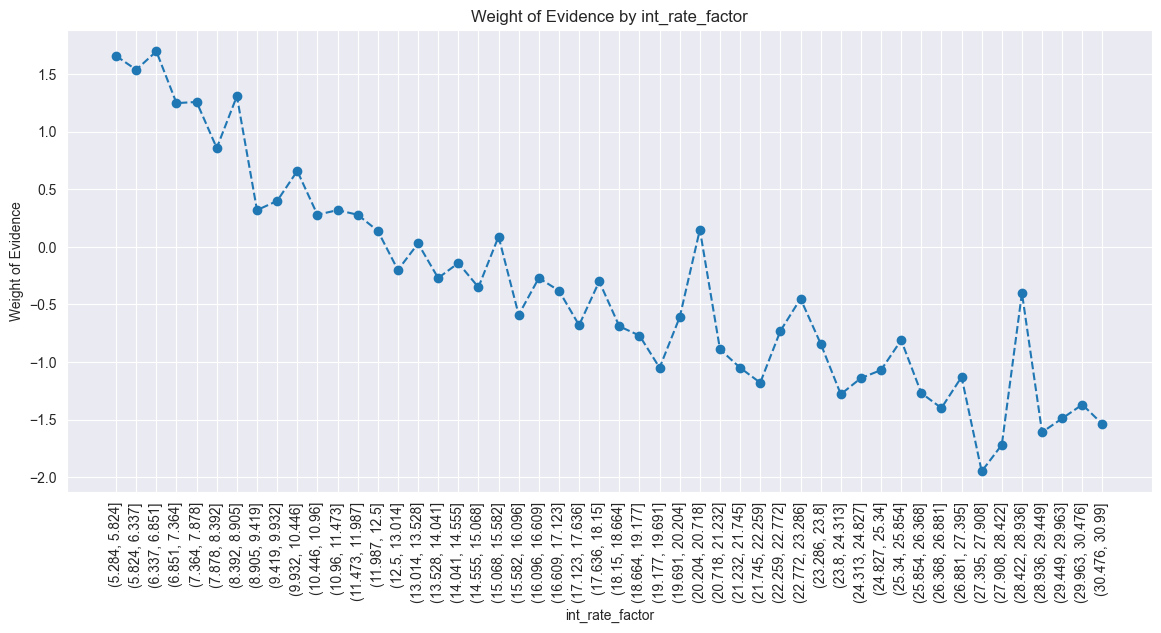

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3554771784.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = (df.groupby(discrete_variable_name)[gb_col_name]
C:\Users\HARDPC\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


     revol_util_factor  prop_n_obs   WoE   IV
0     (-0.892, 17.846]      12.148  0.37  inf
1     (17.846, 35.692]      20.372  0.18  inf
2     (35.692, 53.538]      24.253 -0.01  inf
3     (53.538, 71.384]      21.859 -0.13  inf
4      (71.384, 89.23]      15.568 -0.16  inf
5     (89.23, 107.076]       5.773 -0.21  inf
6   (107.076, 124.922]       0.024 -0.38  inf
7   (124.922, 142.768]       0.003 -1.05  inf
8   (142.768, 160.614]       0.001 -0.29  inf
9    (160.614, 178.46]       0.000  0.18  inf
10   (178.46, 196.306]       0.000 -0.81  inf
11  (196.306, 214.152]       0.000   NaN  inf
12  (214.152, 231.998]       0.000   NaN  inf
13  (231.998, 249.844]       0.000   NaN  inf
14   (249.844, 267.69]       0.000   NaN  inf
15   (267.69, 285.536]       0.000   NaN  inf
16  (285.536, 303.382]       0.000   NaN  inf
17  (303.382, 321.228]       0.000   NaN  inf
18  (321.228, 339.074]       0.000   NaN  inf
19   (339.074, 356.92]       0.000   NaN  inf
20   (356.92, 374.766]       0.000

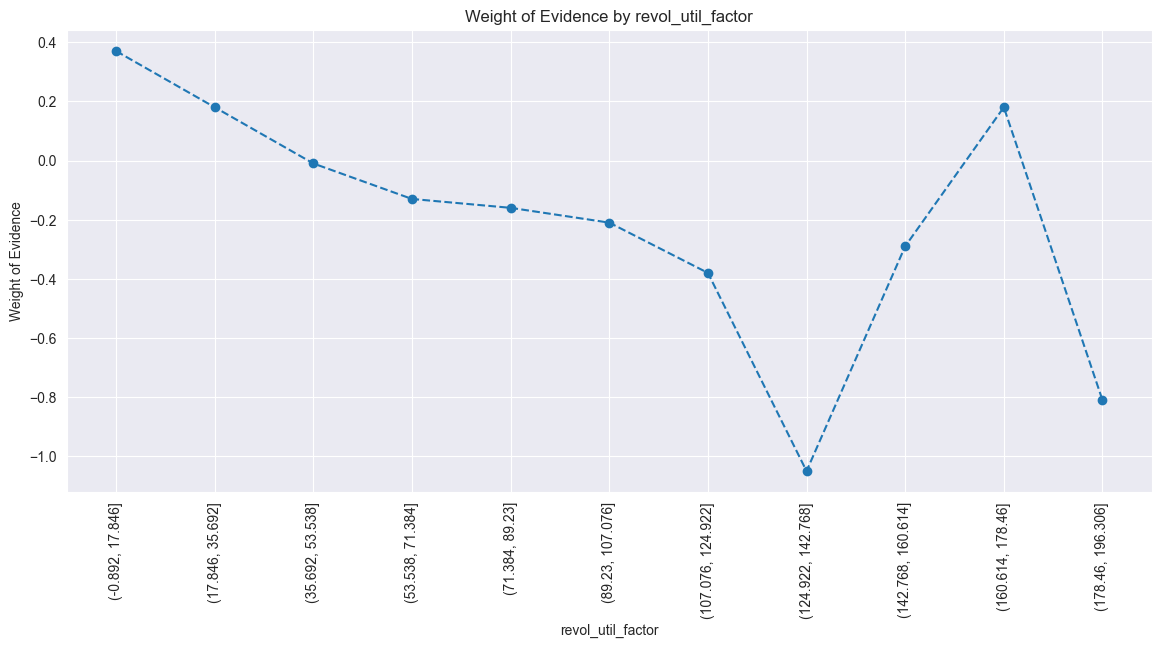

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3554771784.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = (df.groupby(discrete_variable_name)[gb_col_name]


        total_pymnt_factor  prop_n_obs   WoE   IV
0      (-67.174, 1343.488]       5.702 -0.13  inf
1     (1343.488, 2686.975]       7.653 -0.37  inf
2     (2686.975, 4030.463]       7.673 -0.47  inf
3     (4030.463, 5373.951]       7.316 -0.50  inf
4     (5373.951, 6717.438]       7.829 -0.26  inf
5     (6717.438, 8060.926]       6.451 -0.32  inf
6     (8060.926, 9404.413]       5.851 -0.24  inf
7    (9404.413, 10747.901]       5.403 -0.12  inf
8   (10747.901, 12091.389]       5.832  0.17  inf
9   (12091.389, 13434.876]       4.433  0.08  inf
10  (13434.876, 14778.364]       3.733  0.09  inf
11  (14778.364, 16121.852]       3.212  0.16  inf
12  (16121.852, 17465.339]       3.584  0.45  inf
13  (17465.339, 18808.827]       2.846  0.40  inf
14  (18808.827, 20152.315]       2.265  0.36  inf
15  (20152.315, 21495.802]       2.242  0.53  inf
16   (21495.802, 22839.29]       2.334  0.78  inf
17   (22839.29, 24182.777]       1.905  0.76  inf
18  (24182.777, 25526.265]       1.520  0.76  inf


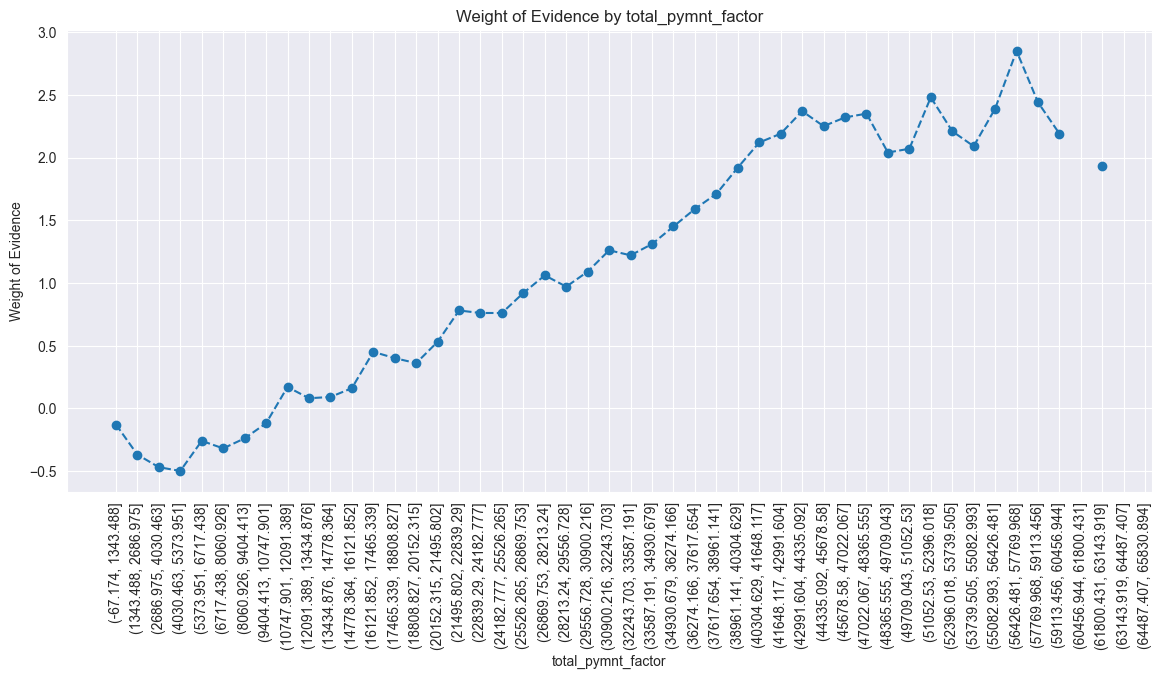

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3554771784.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = (df.groupby(discrete_variable_name)[gb_col_name]


   total_rec_prncp_factor  prop_n_obs   WoE   IV
0          (-40.0, 800.0]       5.679 -0.86  inf
1         (800.0, 1600.0]       7.108 -0.81  inf
2        (1600.0, 2400.0]       6.424 -0.83  inf
3        (2400.0, 3200.0]       6.163 -0.68  inf
4        (3200.0, 4000.0]       5.471 -0.59  inf
5        (4000.0, 4800.0]       4.248 -0.66  inf
6        (4800.0, 5600.0]       5.604 -0.08  inf
7        (5600.0, 6400.0]       4.817 -0.04  inf
8        (6400.0, 7200.0]       3.909 -0.05  inf
9        (7200.0, 8000.0]       4.284  0.28  inf
10       (8000.0, 8800.0]       2.272 -0.24  inf
11       (8800.0, 9600.0]       2.771  0.24  inf
12      (9600.0, 10400.0]       5.529  1.17  inf
13     (10400.0, 11200.0]       2.119  0.34  inf
14     (11200.0, 12000.0]       3.946  1.18  inf
15     (12000.0, 12800.0]       1.234  0.13  inf
16     (12800.0, 13600.0]       1.454  0.48  inf
17     (13600.0, 14400.0]       1.802  0.92  inf
18     (14400.0, 15200.0]       3.461  1.74  inf
19     (15200.0, 160

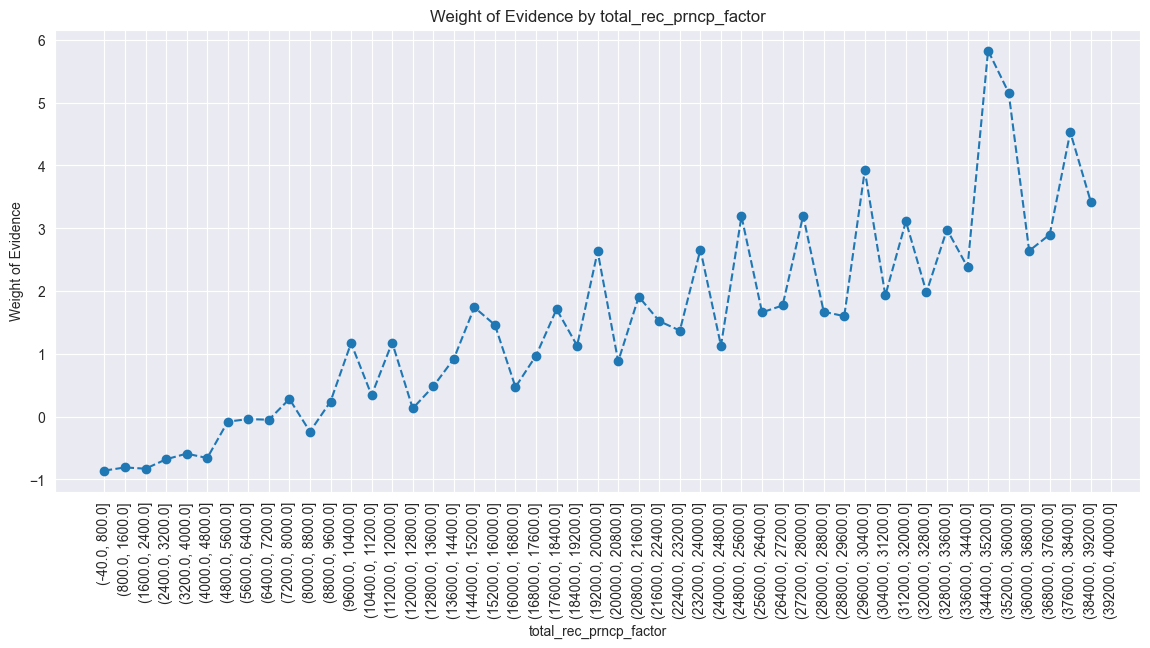

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3554771784.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = (df.groupby(discrete_variable_name)[gb_col_name]


   mnths_since_last_pymnt_d_factor  prop_n_obs   WoE        IV
0                  (-0.125, 3.199]       1.350  5.62  1.350685
1                   (3.199, 6.365]       1.509  4.24  1.350685
2                   (6.365, 9.531]      36.074  2.51  1.350685
3                  (9.531, 12.697]       3.418 -0.27  1.350685
4                 (12.697, 15.863]       3.602 -0.42  1.350685
5                 (15.863, 19.029]       3.809 -0.44  1.350685
6                 (19.029, 22.195]       4.033 -0.34  1.350685
7                 (22.195, 25.361]       3.785 -0.37  1.350685
8                 (25.361, 28.527]       5.068 -0.57  1.350685
9                 (28.527, 31.693]       3.588 -0.45  1.350685
10                (31.693, 34.859]       3.454 -0.36  1.350685
11                (34.859, 38.025]       3.112 -0.57  1.350685
12                (38.025, 41.191]       3.113 -0.66  1.350685
13                (41.191, 44.357]       3.024 -0.64  1.350685
14                (44.357, 47.523]       2.838 -0.59  1

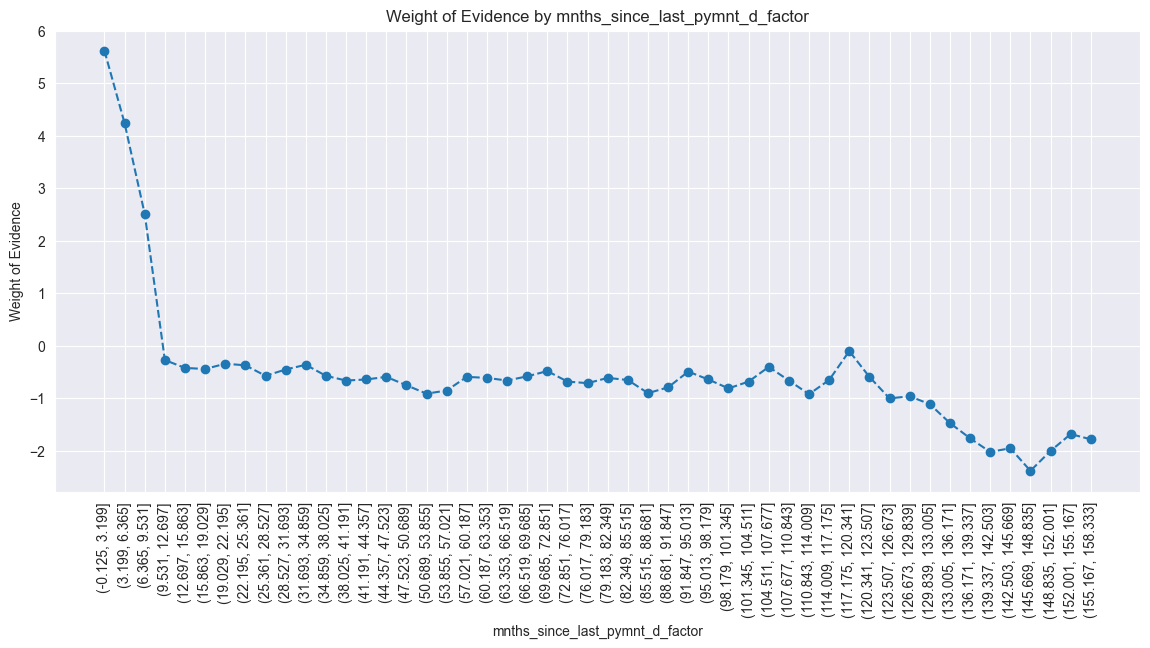

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3554771784.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = (df.groupby(discrete_variable_name)[gb_col_name]
C:\Users\HARDPC\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


             annual_inc_factor  prop_n_obs   WoE   IV
0       (-110000.0, 2200000.0]      99.988 -0.00  inf
1       (2200000.0, 4400000.0]       0.004 -0.33  inf
2       (4400000.0, 6600000.0]       0.004  0.40  inf
3       (6600000.0, 8800000.0]       0.002  2.14  inf
4      (8800000.0, 11000000.0]       0.001 -0.29  inf
5     (11000000.0, 13200000.0]       0.000   NaN  inf
6     (13200000.0, 15400000.0]       0.000   NaN  inf
7     (15400000.0, 17600000.0]       0.000   NaN  inf
8     (17600000.0, 19800000.0]       0.000   NaN  inf
9     (19800000.0, 22000000.0]       0.000   NaN  inf
10    (22000000.0, 24200000.0]       0.000   NaN  inf
11    (24200000.0, 26400000.0]       0.000   NaN  inf
12    (26400000.0, 28600000.0]       0.000   NaN  inf
13    (28600000.0, 30800000.0]       0.000   NaN  inf
14    (30800000.0, 33000000.0]       0.000   NaN  inf
15    (33000000.0, 35200000.0]       0.000   NaN  inf
16    (35200000.0, 37400000.0]       0.000   NaN  inf
17    (37400000.0, 39600000.

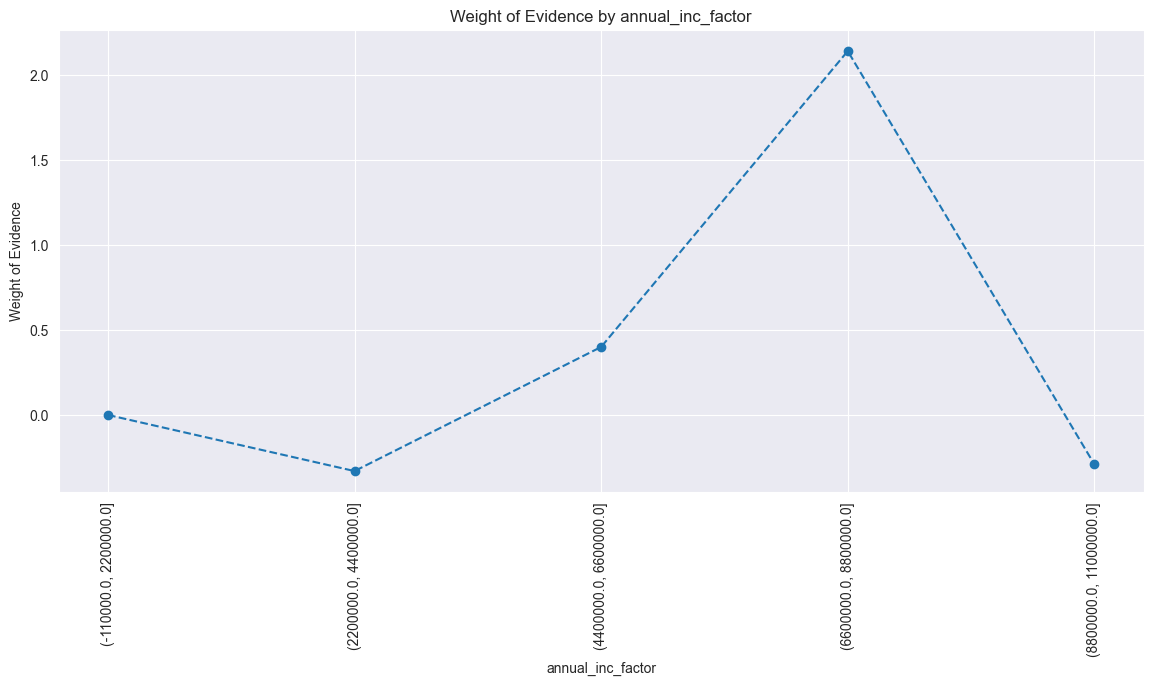

In [156]:
for col in cont_big_cols:
    df = woe_ordered_continuous(inputs_prep, col + "_factor", "good_bad", targets_prep)
    df["prop_n_obs"] = df["prop_n_obs"].round(5) * 100
    df["WoE"] = df["WoE"].round(2)
    print(df.iloc[:, [0, 3, -2, -1]])
    plot_by_woe(df, woe_col_name="WoE", x_rot=90)

In [157]:
def comb_cat_big_cont(inputs, from_category, val_ranges, cat_sep=":"):
    cat_dummy_variables = []
    for val_range in val_ranges:
        try:
            len(val_range)
            inputs[f"{from_category + cat_sep + str(val_range[0])}-{str(val_range[1])}"] = np.where(((val_range[0] <= inputs[from_category]) & (inputs[from_category] < val_range[1])), 1, 0)
            cat_dummy_variables.append(f"{from_category + cat_sep + str(val_range[0])}-{str(val_range[1])}")
        except TypeError:
            if val_range != val_ranges[-1]:
                inputs[f"{from_category + cat_sep + "<" + str(val_range)}"] = np.where((inputs[from_category] < val_range), 1, 0)
                cat_dummy_variables.append(f"{from_category + cat_sep + "<" + str(val_range)}")
            else:
                inputs[f"{from_category + cat_sep + ">=" + str(val_range)}"] = np.where((inputs[from_category] >= val_range), 1, 0)
                cat_dummy_variables.append(f"{from_category + cat_sep + ">=" + str(val_range)}")

    return inputs, cat_dummy_variables

In [158]:
inputs_prep, int_rate_dummies = comb_cat_big_cont(
    inputs_prep,
    "int_rate",
    [
        6.9,
        (6.9, 7.3),
        (8.5, 9),
        (9, 12),
        (12, 15.6),
        (15.6, 19.2),
        (19.2, 24.0),
        24.0
    ]
)

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3132875006.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + "<" + str(val_range)}"] = np.where((inputs[from_category] < val_range), 1, 0)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3132875006.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + str(val_range[0])}-{str(val_range[1])}"] = np.where(((val_range[0] <= inputs[from_category]) & (inputs[from_category] < val_range[1])), 1, 0)
C:\Users\HARD

In [159]:
int_rate_dummies

['int_rate:<6.9',
 'int_rate:6.9-7.3',
 'int_rate:8.5-9',
 'int_rate:9-12',
 'int_rate:12-15.6',
 'int_rate:15.6-19.2',
 'int_rate:19.2-24.0',
 'int_rate:>=24.0']

In [160]:
dummies_list = dummies_list + int_rate_dummies

In [161]:
inputs_prep, revol_util_dummies = comb_cat_big_cont(
    inputs_prep,
    "revol_util",
    [
        18,
        (18, 35),
        (35, 54),
        (54, 71),
        (71, 90),
        (90, 107),
        107
    ]
)

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3132875006.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + "<" + str(val_range)}"] = np.where((inputs[from_category] < val_range), 1, 0)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3132875006.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + str(val_range[0])}-{str(val_range[1])}"] = np.where(((val_range[0] <= inputs[from_category]) & (inputs[from_category] < val_range[1])), 1, 0)
C:\Users\HARD

In [162]:
revol_util_dummies

['revol_util:<18',
 'revol_util:18-35',
 'revol_util:35-54',
 'revol_util:54-71',
 'revol_util:71-90',
 'revol_util:90-107',
 'revol_util:>=107']

In [163]:
dummies_list = dummies_list + revol_util_dummies

In [164]:
inputs_prep, total_pymnt_dummies = comb_cat_big_cont(
    inputs_prep,
    "total_pymnt",
    [
        1300.0,
        (1300.0, 5400.0),
        (5400.0, 10800.0),
        (10800, 16200),
        (16200, 20150),
        (20150, 21500),
        (21500, 22850),
        (22850, 25500),
        (25500, 28200),
        (28200, 32250),
        (32250, 35000),
        (35000, 36500),
        (36500, 38000),
        (39500, 41000),
        (42500, 44000),
        44000
    ]
)

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3132875006.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + "<" + str(val_range)}"] = np.where((inputs[from_category] < val_range), 1, 0)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3132875006.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + str(val_range[0])}-{str(val_range[1])}"] = np.where(((val_range[0] <= inputs[from_category]) & (inputs[from_category] < val_range[1])), 1, 0)
C:\Users\HARD

In [165]:
total_pymnt_dummies

['total_pymnt:<1300.0',
 'total_pymnt:1300.0-5400.0',
 'total_pymnt:5400.0-10800.0',
 'total_pymnt:10800-16200',
 'total_pymnt:16200-20150',
 'total_pymnt:20150-21500',
 'total_pymnt:21500-22850',
 'total_pymnt:22850-25500',
 'total_pymnt:25500-28200',
 'total_pymnt:28200-32250',
 'total_pymnt:32250-35000',
 'total_pymnt:35000-36500',
 'total_pymnt:36500-38000',
 'total_pymnt:39500-41000',
 'total_pymnt:42500-44000',
 'total_pymnt:>=44000']

In [166]:
dummies_list = dummies_list + total_pymnt_dummies

In [167]:
inputs_prep, total_rec_prncp_dummies = comb_cat_big_cont(
    inputs_prep,
    "total_rec_prncp",
    [
        800,
        (800, 1600),
        (1600, 2400),
        (2400, 3200),
        (3200, 4000),
        (4000, 4800),
        (4800, 8000),
        (8000, 9600),
        (9600, 10400),
        (10400, 11200),
        11200
    ]
)

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3132875006.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + "<" + str(val_range)}"] = np.where((inputs[from_category] < val_range), 1, 0)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3132875006.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + str(val_range[0])}-{str(val_range[1])}"] = np.where(((val_range[0] <= inputs[from_category]) & (inputs[from_category] < val_range[1])), 1, 0)
C:\Users\HARD

In [168]:
total_rec_prncp_dummies

['total_rec_prncp:<800',
 'total_rec_prncp:800-1600',
 'total_rec_prncp:1600-2400',
 'total_rec_prncp:2400-3200',
 'total_rec_prncp:3200-4000',
 'total_rec_prncp:4000-4800',
 'total_rec_prncp:4800-8000',
 'total_rec_prncp:8000-9600',
 'total_rec_prncp:9600-10400',
 'total_rec_prncp:10400-11200',
 'total_rec_prncp:>=11200']

In [169]:
dummies_list = dummies_list + total_rec_prncp_dummies

In [170]:
inputs_prep, mnths_since_last_pymnt_d_dummies = comb_cat_big_cont(
    inputs_prep,
    "mnths_since_last_pymnt_d",
    [
        6,
        (6, 8),
        (8, 10),
        (10, 35),
        (35, 100),
        100
    ]
)

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3132875006.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + "<" + str(val_range)}"] = np.where((inputs[from_category] < val_range), 1, 0)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3132875006.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + str(val_range[0])}-{str(val_range[1])}"] = np.where(((val_range[0] <= inputs[from_category]) & (inputs[from_category] < val_range[1])), 1, 0)
C:\Users\HARD

In [171]:
mnths_since_last_pymnt_d_dummies

['mnths_since_last_pymnt_d:<6',
 'mnths_since_last_pymnt_d:6-8',
 'mnths_since_last_pymnt_d:8-10',
 'mnths_since_last_pymnt_d:10-35',
 'mnths_since_last_pymnt_d:35-100',
 'mnths_since_last_pymnt_d:>=100']

In [172]:
dummies_list = dummies_list + mnths_since_last_pymnt_d_dummies

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\469405689.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs_prep["annual_inc" + "_factor_thl"] = pd.cut(inputs_prep[inputs_prep["annual_inc"] < 500000]["annual_inc"], 50)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3554771784.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = (df.groupby(discrete_variable_name)[gb_col_name]


     annual_inc_factor_thl  prop_n_obs   WoE
0      (-499.992, 9999.84]       0.264  0.25
1      (9999.84, 19999.68]       1.330 -0.26
2     (19999.68, 29999.52]       4.309 -0.26
3     (29999.52, 39999.36]       9.228 -0.22
4      (39999.36, 49999.2]      12.279 -0.16
5      (49999.2, 59999.04]      12.592 -0.09
6     (59999.04, 69998.88]      12.258 -0.05
7     (69998.88, 79998.72]      10.193  0.02
8     (79998.72, 89998.56]       8.292  0.06
9      (89998.56, 99998.4]       6.302  0.14
10    (99998.4, 109998.24]       5.073  0.21
11  (109998.24, 119998.08]       3.266  0.27
12  (119998.08, 129997.92]       3.544  0.21
13  (129997.92, 139997.76]       2.008  0.35
14   (139997.76, 149997.6]       1.546  0.33
15   (149997.6, 159997.44]       1.727  0.33
16  (159997.44, 169997.28]       1.010  0.40
17  (169997.28, 179997.12]       0.764  0.40
18  (179997.12, 189996.96]       0.722  0.39
19   (189996.96, 199996.8]       0.356  0.52
20   (199996.8, 209996.64]       0.648  0.47
21  (20999

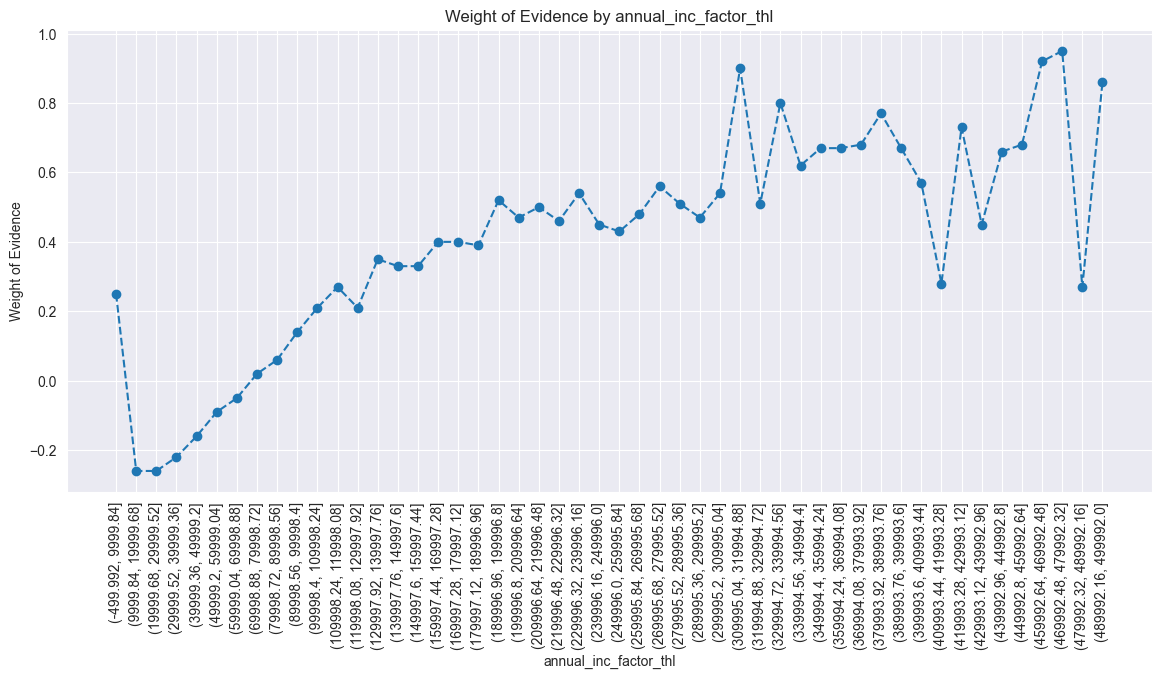

In [173]:
inputs_prep["annual_inc" + "_factor_thl"] = pd.cut(inputs_prep[inputs_prep["annual_inc"] < 500000]["annual_inc"], 50)
df = woe_ordered_continuous(inputs_prep, "annual_inc_factor_thl", "good_bad", targets_prep)
df["prop_n_obs"] = df["prop_n_obs"].round(5) * 100
df["WoE"] = df["WoE"].round(2)
print(df.iloc[:, [0, 3, -2]])
plot_by_woe(df, woe_col_name="WoE", x_rot=90)

In [174]:
inputs_prep, annual_inc_dummies = comb_cat_big_cont(
    inputs_prep,
    "annual_inc",
    [
        7000,
        (7000, 12000),
        (12000, 17000),
        (17000, 22000),
        (22000, 27000),
        (27000, 32000),
        (32000, 37000),
        (37000, 42000),
        (42000, 47000),
        (47000, 52000),
        (52000, 57000),
        (57000, 62000),
        (62000, 67000),
        (67000, 72000),
        (72000, 77000),
        (77000, 82000),
        (82000, 87000),
        (87000, 92000),
        (92000, 97000),
        (97000, 102000),
        (102000, 107000),
        (107000, 112000),
        (112000, 186000),
        (186000, 297500),
        (297500, 346000),
        (346000, 450000),
        450000  
    ]
)

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3132875006.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + "<" + str(val_range)}"] = np.where((inputs[from_category] < val_range), 1, 0)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_17268\3132875006.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + str(val_range[0])}-{str(val_range[1])}"] = np.where(((val_range[0] <= inputs[from_category]) & (inputs[from_category] < val_range[1])), 1, 0)
C:\Users\HARD

In [175]:
annual_inc_dummies

['annual_inc:<7000',
 'annual_inc:7000-12000',
 'annual_inc:12000-17000',
 'annual_inc:17000-22000',
 'annual_inc:22000-27000',
 'annual_inc:27000-32000',
 'annual_inc:32000-37000',
 'annual_inc:37000-42000',
 'annual_inc:42000-47000',
 'annual_inc:47000-52000',
 'annual_inc:52000-57000',
 'annual_inc:57000-62000',
 'annual_inc:62000-67000',
 'annual_inc:67000-72000',
 'annual_inc:72000-77000',
 'annual_inc:77000-82000',
 'annual_inc:82000-87000',
 'annual_inc:87000-92000',
 'annual_inc:92000-97000',
 'annual_inc:97000-102000',
 'annual_inc:102000-107000',
 'annual_inc:107000-112000',
 'annual_inc:112000-186000',
 'annual_inc:186000-297500',
 'annual_inc:297500-346000',
 'annual_inc:346000-450000',
 'annual_inc:>=450000']

In [176]:
dummies_list = dummies_list + annual_inc_dummies

In [177]:
dummies_list

['home_ownership:_other_rent',
 'home_ownership:_none_own',
 'home_ownership:_mortgage_any',
 'purpose:debt_consolidation',
 'purpose:_educational_small_business_renewable_energy_moving',
 'purpose:_medical_house_other',
 'purpose:_major_purchase_vacation_wedding_home_improvement',
 'purpose:_credit_card_car',
 'addr_state:ca',
 'addr_state:fl',
 'addr_state:ny',
 'addr_state:tx',
 'addr_state:_ia_ar_ms_al_ok_nv_la',
 'addr_state:_hi_nm_sd_md_pa_in_mo',
 'addr_state:_nc_nj_tn_mn_mi_va_ky',
 'addr_state:_ne_az_ak_oh_de_ma',
 'addr_state:_wi_ga_ut',
 'addr_state:_il_ct_ri_wy_ks_mt',
 'addr_state:_co_wa_nd_sc_nh',
 'addr_state:_or_dc_id_wv_vt_me',
 'verification_status:verified',
 'verification_status:not verified',
 'verification_status:source verified',
 'initial_list_status:f',
 'initial_list_status:w',
 'application_type:individual',
 'application_type:joint app',
 'hardship_flag:n',
 'hardship_flag:missing',
 'hardship_flag:y',
 'debt_settlement_flag:n',
 'debt_settlement_flag:y',
 '

In [ ]:
loans_inputs_train = inputs_prep

In [ ]:
loans_targets_train = targets_prep

In [ ]:
loans_inputs_train.to_csv("loans_inputs_train.csv")

In [ ]:
loans_targets_train.to_csv("loans_targets_train.csv")

In [ ]:
#loans_inputs_test = inputs_prep

In [ ]:
#loans_targets_test = targets_prep

In [ ]:
#loans_inputs_test.to_csv("loans_inputs_test.csv")

In [ ]:
#loans_targets_test.to_csv("loans_targets_test.csv")